In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split,KFold
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import qqplot
import scipy.stats as stats

In [3]:
df = pd.read_csv(r"C:\Users\srini\Downloads\train.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
null_percentages = df.isnull().sum().sort_values(ascending=False) / df.shape[0]

In [6]:
null_percentages[null_percentages > 0]

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageCond      0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

In [7]:
null_valued_cols = null_percentages[null_percentages > 0].index

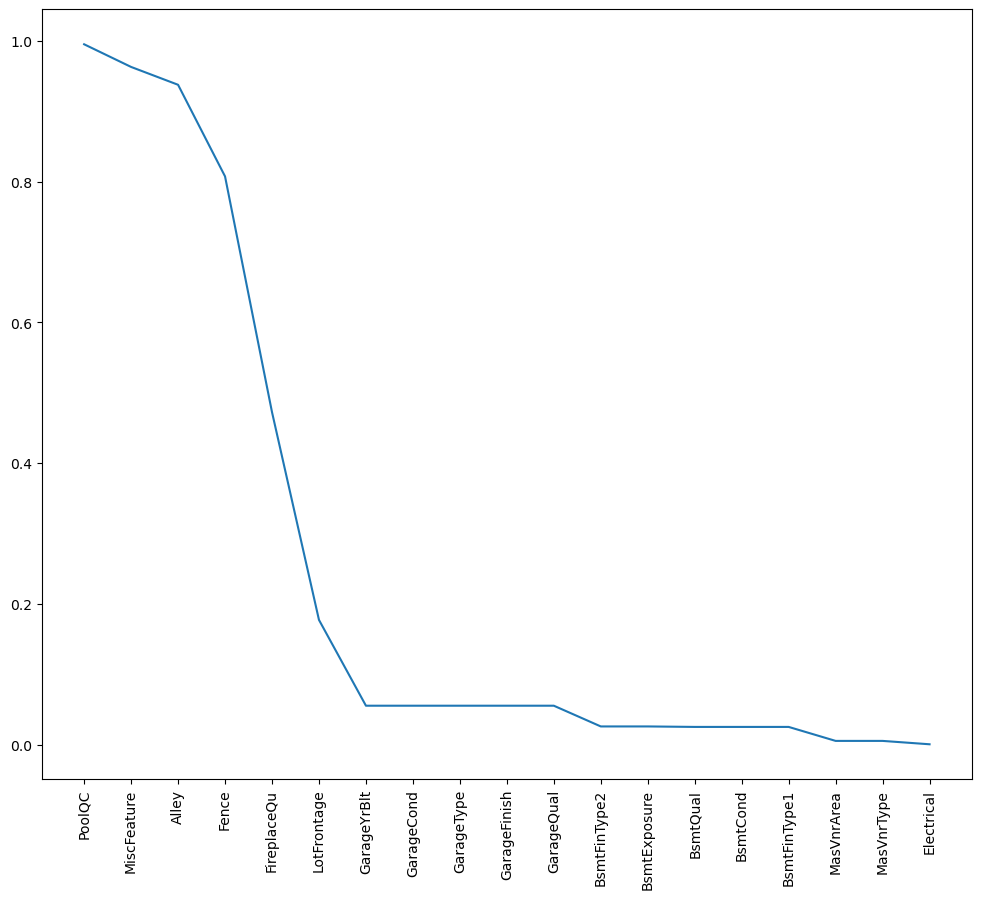

In [8]:
plt.figure(figsize=(12,10))
sns.lineplot(null_percentages[null_percentages > 0])
plt.xticks(rotation=90)
plt.show()


In [9]:
cat_cols = df[null_valued_cols].select_dtypes(['string','object']).columns

In [10]:
cat_cols

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageCond',
       'GarageType', 'GarageFinish', 'GarageQual', 'BsmtFinType2',
       'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'MasVnrType',
       'Electrical'],
      dtype='object')

In [11]:
for i in cat_cols : 
    display(df[i].value_counts(dropna=False))

NaN    1453
Gd        3
Ex        2
Fa        2
Name: PoolQC, dtype: int64

NaN     1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64

NaN     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

NaN      1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64

NaN    690
Gd     380
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64

TA     1326
NaN      81
Fa       35
Gd        9
Po        7
Ex        2
Name: GarageCond, dtype: int64

Attchd     870
Detchd     387
BuiltIn     88
NaN         81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

Unf    605
RFn    422
Fin    352
NaN     81
Name: GarageFinish, dtype: int64

TA     1311
NaN      81
Fa       48
Gd       14
Ex        3
Po        3
Name: GarageQual, dtype: int64

Unf    1256
Rec      54
LwQ      46
NaN      38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

No     953
Av     221
Gd     134
Mn     114
NaN     38
Name: BsmtExposure, dtype: int64

TA     649
Gd     618
Ex     121
NaN     37
Fa      35
Name: BsmtQual, dtype: int64

TA     1311
Gd       65
Fa       45
NaN      37
Po        2
Name: BsmtCond, dtype: int64

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
NaN     37
Name: BsmtFinType1, dtype: int64

None       864
BrkFace    445
Stone      128
BrkCmn      15
NaN          8
Name: MasVnrType, dtype: int64

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
NaN         1
Name: Electrical, dtype: int64

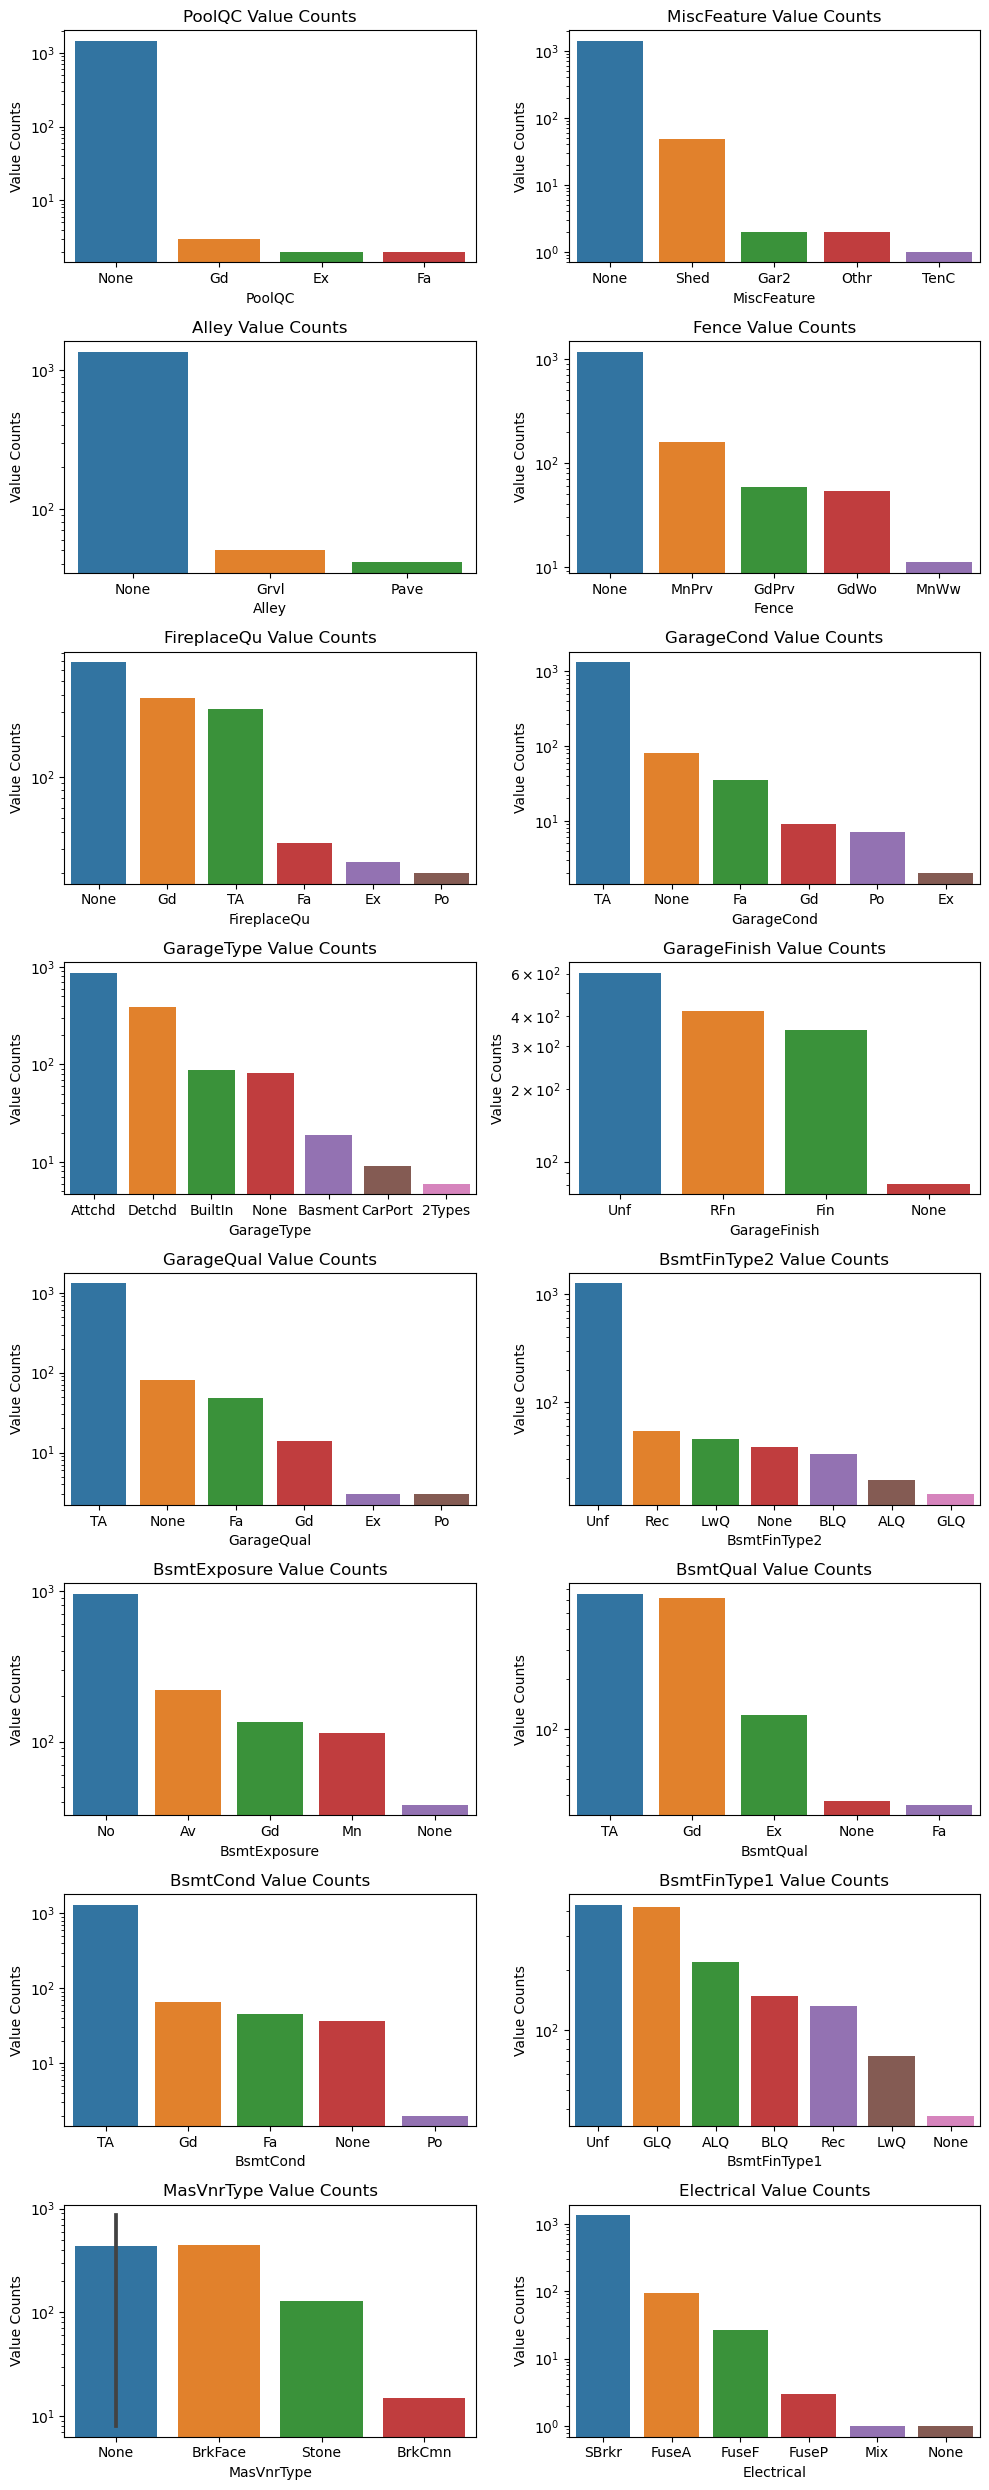

In [12]:
cols = 2
    
rows = np.ceil(len(cat_cols)/cols).astype('int')
fig,ax=plt.subplots(rows,cols,figsize=(10,25))
for idx,i in enumerate(cat_cols) : 
    idx1 = idx // cols
    idx2 = idx % cols
    hdf = df[i].value_counts(dropna=False).reset_index().fillna('None')
    sns.barplot(data=hdf,x='index',y=i,ax=ax[idx1,idx2])
    ax[idx1,idx2].set_title(f'{i} Value Counts')
    ax[idx1,idx2].set_xlabel(i)
    ax[idx1,idx2].set_ylabel('Value Counts')
    ax[idx1,idx2].set_yscale('log')
    
[fig.delaxes(i) for i in ax.flat if not i.has_data()]
plt.tight_layout()
plt.show()


In [13]:
for i in  cat_cols: 
    display(df.groupby([i],dropna=False)['SalePrice'].median())

PoolQC
Ex     490000.0
Fa     215500.0
Gd     171000.0
NaN    162900.0
Name: SalePrice, dtype: float64

MiscFeature
Gar2    170750.0
Othr     94000.0
Shed    144000.0
TenC    250000.0
NaN     164250.0
Name: SalePrice, dtype: float64

Alley
Grvl    119500.0
Pave    172500.0
NaN     165000.0
Name: SalePrice, dtype: float64

Fence
GdPrv    167500.0
GdWo     138750.0
MnPrv    137450.0
MnWw     130000.0
NaN      173000.0
Name: SalePrice, dtype: float64

FireplaceQu
Ex     314250.0
Fa     158000.0
Gd     206950.0
Po     131500.0
TA     187500.0
NaN    135000.0
Name: SalePrice, dtype: float64

GarageCond
Ex     124000.0
Fa     114504.0
Gd     148000.0
Po     108000.0
TA     170000.0
NaN    100000.0
Name: SalePrice, dtype: float64

GarageType
2Types     159000.0
Attchd     185000.0
Basment    148000.0
BuiltIn    227500.0
CarPort    108000.0
Detchd     129500.0
NaN        100000.0
Name: SalePrice, dtype: float64

GarageFinish
Fin    215000.0
RFn    190000.0
Unf    135000.0
NaN    100000.0
Name: SalePrice, dtype: float64

GarageQual
Ex     127500.0
Fa     115000.0
Gd     209115.0
Po      96500.0
TA     170000.0
NaN    100000.0
Name: SalePrice, dtype: float64

BsmtFinType2
ALQ    174900.0
BLQ    143000.0
GLQ    203125.0
LwQ    154000.0
Rec    148750.0
Unf    167000.0
NaN    104025.0
Name: SalePrice, dtype: float64

BsmtExposure
Av     185850.0
Gd     226975.0
Mn     182450.0
No     154000.0
NaN    104025.0
Name: SalePrice, dtype: float64

BsmtQual
Ex     318000.0
Fa     112000.0
Gd     192070.0
TA     135500.0
NaN    101800.0
Name: SalePrice, dtype: float64

BsmtCond
Fa     118500.0
Gd     193879.0
Po      64000.0
TA     165000.0
NaN    101800.0
Name: SalePrice, dtype: float64

BsmtFinType1
ALQ    149250.0
BLQ    139100.0
GLQ    213750.0
LwQ    139000.0
Rec    142000.0
Unf    161750.0
NaN    101800.0
Name: SalePrice, dtype: float64

MasVnrType
BrkCmn     139000.0
BrkFace    181000.0
None       143000.0
Stone      246839.0
NaN        203287.0
Name: SalePrice, dtype: float64

Electrical
FuseA    121250.0
FuseF    115000.0
FuseP     82000.0
Mix       67000.0
SBrkr    170000.0
NaN      167500.0
Name: SalePrice, dtype: float64

- The null values here are not missing at random 
- The null values in PoolQC feature are Missing At Random , i.e they are missing when there is no pull 
- MiscFeature , Alley , Fence, FireplaceQu , Garage (All features with Garage prefix) are MAR 

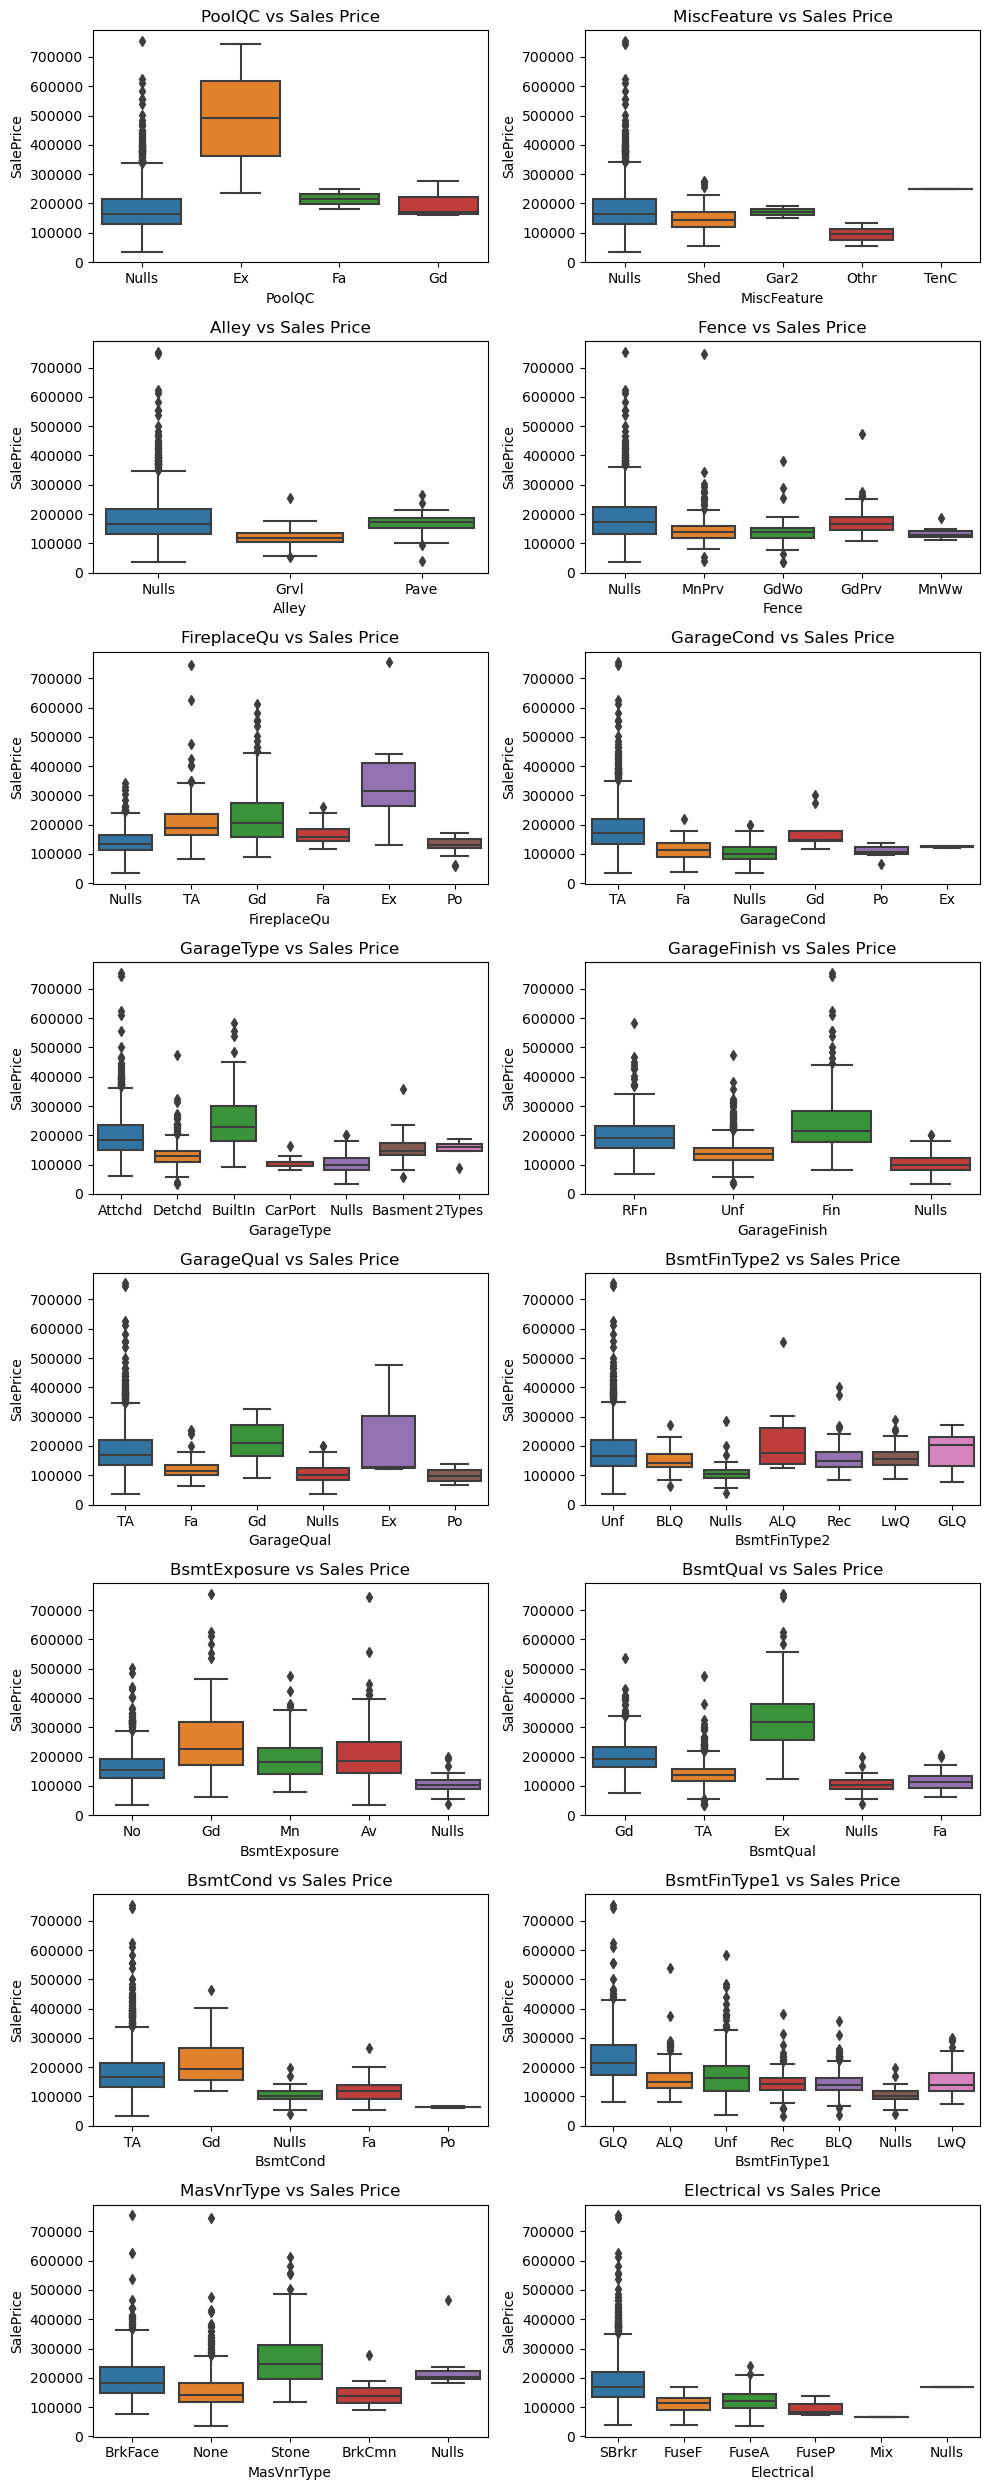

In [14]:
cols = 2
rows = np.ceil(len(cat_cols)/cols).astype('int')
fig,ax=plt.subplots(rows,cols,figsize=(10,25))
for idx,i in enumerate(cat_cols) : 
    idx1 = idx // cols
    idx2 = idx % cols
    sns.boxplot(data=df.fillna('Nulls'),x=i,y='SalePrice',ax=ax[idx1,idx2])
    ax[idx1,idx2].set_title(f'{i} vs Sales Price')
#     ax[idx1,idx2].set_yscale('log')
[fig.delaxes(i) for i in ax.flat if not i.has_data()]
plt.tight_layout()
plt.show()

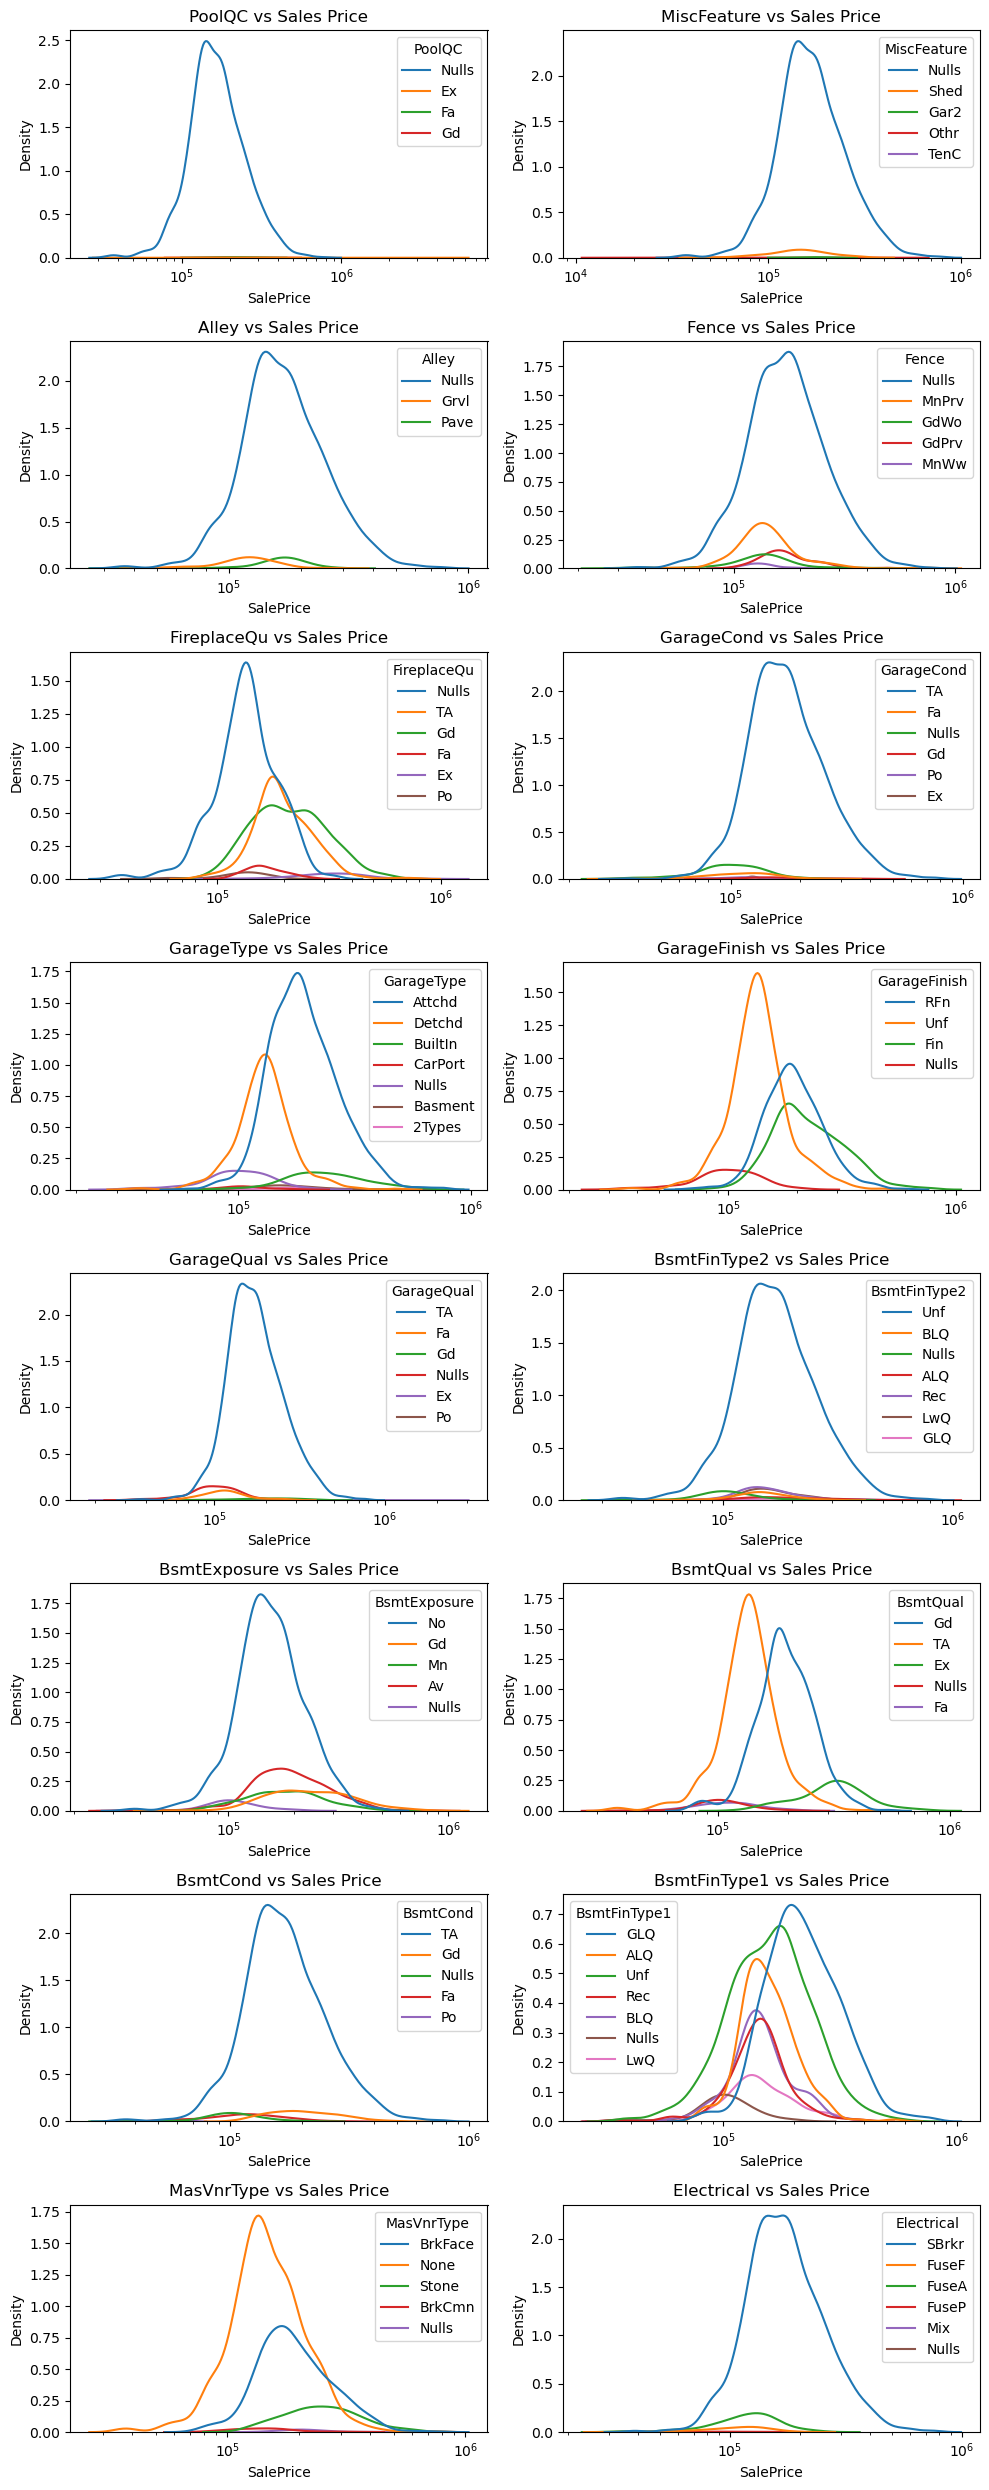

In [15]:
cols = 2
cat_cols = df[null_valued_cols].select_dtypes(['string','object']).columns
rows = np.ceil(len(cat_cols)/cols).astype('int')
fig,ax=plt.subplots(rows,cols,figsize=(10,25))
for idx,i in enumerate(cat_cols) : 
    idx1 = idx // cols
    idx2 = idx % cols
    sns.kdeplot(data=df.fillna('Nulls'),hue=i,x='SalePrice',ax=ax[idx1,idx2],log_scale=True)
    ax[idx1,idx2].set_title(f'{i} vs Sales Price')
[fig.delaxes(i) for i in ax.flat if not i.has_data()]
plt.tight_layout()
plt.show()

## Impute MAR Values

In [16]:
# Here Null value means that the house just doesn't have the facility 
df['PoolQC'] = df['PoolQC'].fillna('No Pool')
df['MiscFeature'] = df['PoolQC'].fillna('No Misc Feature')
df['Alley'] = df['Alley'].fillna('No Alley') 
df['Fence'] = df['Fence'].fillna('No Fence')
df['FireplaceQu'] = df['FireplaceQu'].fillna('No Fire Place')
df['MasVnrType'] = df['MasVnrType'].replace('None','No Masonry')


In [17]:
df = df[df['MasVnrType'].notnull()]

In [18]:
garage_cols = df.columns[df.columns.str.lower().str.contains(r'^gar')]

- It can be observed cleary that there are exactly 81 Null values in the Garage Categorical Columns
- This signifies that these records don't have a garage 

In [19]:
df[garage_cols].isnull().sum()

GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageCars       0
GarageArea       0
GarageQual      81
GarageCond      81
dtype: int64

In [20]:
df[garage_cols] = df[garage_cols].fillna('No Garage') 

In [21]:
bsmt_cols = df.columns[df.columns.str.lower().str.contains(r'^bsmt')]

- While 37 is noof records where there is no basement , there seem to be 2 defective records in Bsmnt Fin Type 2 and Bsmt Exposure

In [22]:
df[bsmt_cols].isnull().sum()

BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinSF1       0
BsmtFinType2    38
BsmtFinSF2       0
BsmtUnfSF        0
BsmtFullBath     0
BsmtHalfBath     0
dtype: int64

In [23]:
df.loc[df['BsmtExposure'].isnull(),bsmt_cols]

BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  \
17        NaN      NaN          NaN          NaN           0          NaN   
39        NaN      NaN          NaN          NaN           0          NaN   
90        NaN      NaN          NaN          NaN           0          NaN   
102       NaN      NaN          NaN          NaN           0          NaN   
156       NaN      NaN          NaN          NaN           0          NaN   
182       NaN      NaN          NaN          NaN           0          NaN   
259       NaN      NaN          NaN          NaN           0          NaN   
342       NaN      NaN          NaN          NaN           0          NaN   
362       NaN      NaN          NaN          NaN           0          NaN   
371       NaN      NaN          NaN          NaN           0          NaN   
392       NaN      NaN          NaN          NaN           0          NaN   
520       NaN      NaN          NaN          NaN           0          NaN   
532       NaN      NaN          NaN          NaN           0          NaN   
533       NaN      NaN          NaN          NaN           0          NaN   
553       NaN      NaN          NaN          NaN           0          NaN   
646       NaN      NaN          NaN          NaN           0          NaN   
705       NaN      NaN          NaN          NaN           0          NaN   
736       NaN      NaN          NaN          NaN           0          NaN   
749       NaN      NaN          NaN          NaN           0          NaN   
778       NaN      NaN          NaN          NaN           0          NaN   
868       NaN      NaN          NaN          NaN           0          NaN   
894       NaN      NaN          NaN          NaN           0          NaN   
897       NaN      NaN          NaN          NaN           0          NaN   
948        Gd       TA          NaN          Unf           0          Unf   
984       NaN      NaN          NaN          NaN           0          NaN   
1000      NaN      NaN          NaN          NaN           0          NaN   
1011      NaN      NaN          NaN          NaN           0          NaN   
1035      NaN      NaN          NaN          NaN           0          NaN   
1045      NaN      NaN          NaN          NaN           0          NaN   
1048      NaN      NaN          NaN          NaN           0          NaN   
1049      NaN      NaN          NaN          NaN           0          NaN   
1090      NaN      NaN          NaN          NaN           0          NaN   
1179      NaN      NaN          NaN          NaN           0          NaN   
1216      NaN      NaN          NaN          NaN           0          NaN   
1218      NaN      NaN          NaN          NaN           0          NaN   
1232      NaN      NaN          NaN          NaN           0          NaN   
1321      NaN      NaN          NaN          NaN           0          NaN   
1412      NaN      NaN          NaN          NaN           0          NaN   

      BsmtFinSF2  BsmtUnfSF  BsmtFullBath  BsmtHalfBath  
17             0          0             0             0  
39             0          0             0             0  
90             0          0             0             0  
102            0          0             0             0  
156            0          0             0             0  
182            0          0             0             0  
259            0          0             0             0  
342            0          0             0             0  
362            0          0             0             0  
371            0          0             0             0  
392            0          0             0             0  
520            0          0             0             0  
532            0          0             0             0  
533            0          0             0             0  
553            0          0             0             0  
646            0          0             0             0  
705            

In [24]:
df.loc[df['BsmtFinType2'].isnull(),bsmt_cols]

BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  \
17        NaN      NaN          NaN          NaN           0          NaN   
39        NaN      NaN          NaN          NaN           0          NaN   
90        NaN      NaN          NaN          NaN           0          NaN   
102       NaN      NaN          NaN          NaN           0          NaN   
156       NaN      NaN          NaN          NaN           0          NaN   
182       NaN      NaN          NaN          NaN           0          NaN   
259       NaN      NaN          NaN          NaN           0          NaN   
332        Gd       TA           No          GLQ        1124          NaN   
342       NaN      NaN          NaN          NaN           0          NaN   
362       NaN      NaN          NaN          NaN           0          NaN   
371       NaN      NaN          NaN          NaN           0          NaN   
392       NaN      NaN          NaN          NaN           0          NaN   
520       NaN      NaN          NaN          NaN           0          NaN   
532       NaN      NaN          NaN          NaN           0          NaN   
533       NaN      NaN          NaN          NaN           0          NaN   
553       NaN      NaN          NaN          NaN           0          NaN   
646       NaN      NaN          NaN          NaN           0          NaN   
705       NaN      NaN          NaN          NaN           0          NaN   
736       NaN      NaN          NaN          NaN           0          NaN   
749       NaN      NaN          NaN          NaN           0          NaN   
778       NaN      NaN          NaN          NaN           0          NaN   
868       NaN      NaN          NaN          NaN           0          NaN   
894       NaN      NaN          NaN          NaN           0          NaN   
897       NaN      NaN          NaN          NaN           0          NaN   
984       NaN      NaN          NaN          NaN           0          NaN   
1000      NaN      NaN          NaN          NaN           0          NaN   
1011      NaN      NaN          NaN          NaN           0          NaN   
1035      NaN      NaN          NaN          NaN           0          NaN   
1045      NaN      NaN          NaN          NaN           0          NaN   
1048      NaN      NaN          NaN          NaN           0          NaN   
1049      NaN      NaN          NaN          NaN           0          NaN   
1090      NaN      NaN          NaN          NaN           0          NaN   
1179      NaN      NaN          NaN          NaN           0          NaN   
1216      NaN      NaN          NaN          NaN           0          NaN   
1218      NaN      NaN          NaN          NaN           0          NaN   
1232      NaN      NaN          NaN          NaN           0          NaN   
1321      NaN      NaN          NaN          NaN           0          NaN   
1412      NaN      NaN          NaN          NaN           0          NaN   

      BsmtFinSF2  BsmtUnfSF  BsmtFullBath  BsmtHalfBath  
17             0          0             0             0  
39             0          0             0             0  
90             0          0             0             0  
102            0          0             0             0  
156            0          0             0             0  
182            0          0             0             0  
259            0          0             0             0  
332          479       1603             1             0  
342            0          0             0             0  
362            0          0             0             0  
371            0          0             0             0  
392            0          0             0             0  
520            0          0             0             0  
532            0          0             0             0  
533            0          0             0             0  
553            0          0             0             0  
646            

In [25]:
df.loc[df['BsmtFinType1'] == 'Unf',bsmt_cols]

BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  \
8          TA       TA           No          Unf           0          Unf   
13         Gd       TA           Av          Unf           0          Unf   
15         TA       TA           No          Unf           0          Unf   
20         Ex       TA           Av          Unf           0          Unf   
21         TA       TA           No          Unf           0          Unf   
...       ...      ...          ...          ...         ...          ...   
1448       Fa       TA           No          Unf           0          Unf   
1450       Gd       TA           No          Unf           0          Unf   
1451       Gd       TA           No          Unf           0          Unf   
1453       Gd       TA           No          Unf           0          Unf   
1455       Gd       TA           No          Unf           0          Unf   

      BsmtFinSF2  BsmtUnfSF  BsmtFullBath  BsmtHalfBath  
8              0        952             0             0  
13             0       1494             0             0  
15             0        832             0             0  
20             0       1158             0             0  
21             0        637             0             0  
...          ...        ...           ...           ...  
1448           0        560             0             0  
1450           0        896             0             0  
1451           0       1573             0             0  
1453           0       1140             0             0  
1455           0        953             0             0  

[428 rows x 10 columns]

- None value in basement columns, means that there is no basement . But if this is true all other basement features should be none too . Since there all basement records are not null here , these values might be missing completely at random or there was a mistake during the data entry process 

In [26]:
df.loc[[332,948],bsmt_cols]

BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  \
332       Gd       TA           No          GLQ        1124          NaN   
948       Gd       TA          NaN          Unf           0          Unf   

     BsmtFinSF2  BsmtUnfSF  BsmtFullBath  BsmtHalfBath  
332         479       1603             1             0  
948           0        936             0             0

In [27]:
# Drop both the rows
df = df.drop([332,948],axis=0)

In [28]:
# Impute Basement Cols
df[bsmt_cols] = df[bsmt_cols].fillna('No Basement')

In [29]:
df.loc[df['MasVnrArea'].isna(),['MasVnrArea','MasVnrType']]

Empty DataFrame
Columns: [MasVnrArea, MasVnrType]
Index: []

In [30]:
# As seen MasVnrArea is zero , when there is No Masonry Vernier , as such the area can be zero area of masonry vernier
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

In [31]:
df['LotFrontage'].describe()

count    1193.000000
mean       70.021794
std        24.305339
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [32]:
# LotFrontage value being null means that there is no area is 0 
df['LotFrontage'] = df['LotFrontage'].fillna(0) 

In [33]:
# Remove row where electrical is null
df =  df[df['Electrical'].notnull()]

In [34]:
# All Null values have been handled
df.isnull().sum().sort_values(ascending=False)

Id             0
CentralAir     0
GarageYrBlt    0
GarageType     0
FireplaceQu    0
              ..
MasVnrArea     0
MasVnrType     0
Exterior2nd    0
Exterior1st    0
SalePrice      0
Length: 81, dtype: int64

In [35]:
# drop Id column 
df = df.drop('Id',axis=1)

In [36]:
cat_cols = df.select_dtypes(['string','object']).columns

In [37]:
df['MasVnrType'].value_counts()

No Masonry    863
BrkFace       443
Stone         128
BrkCmn         15
Name: MasVnrType, dtype: int64

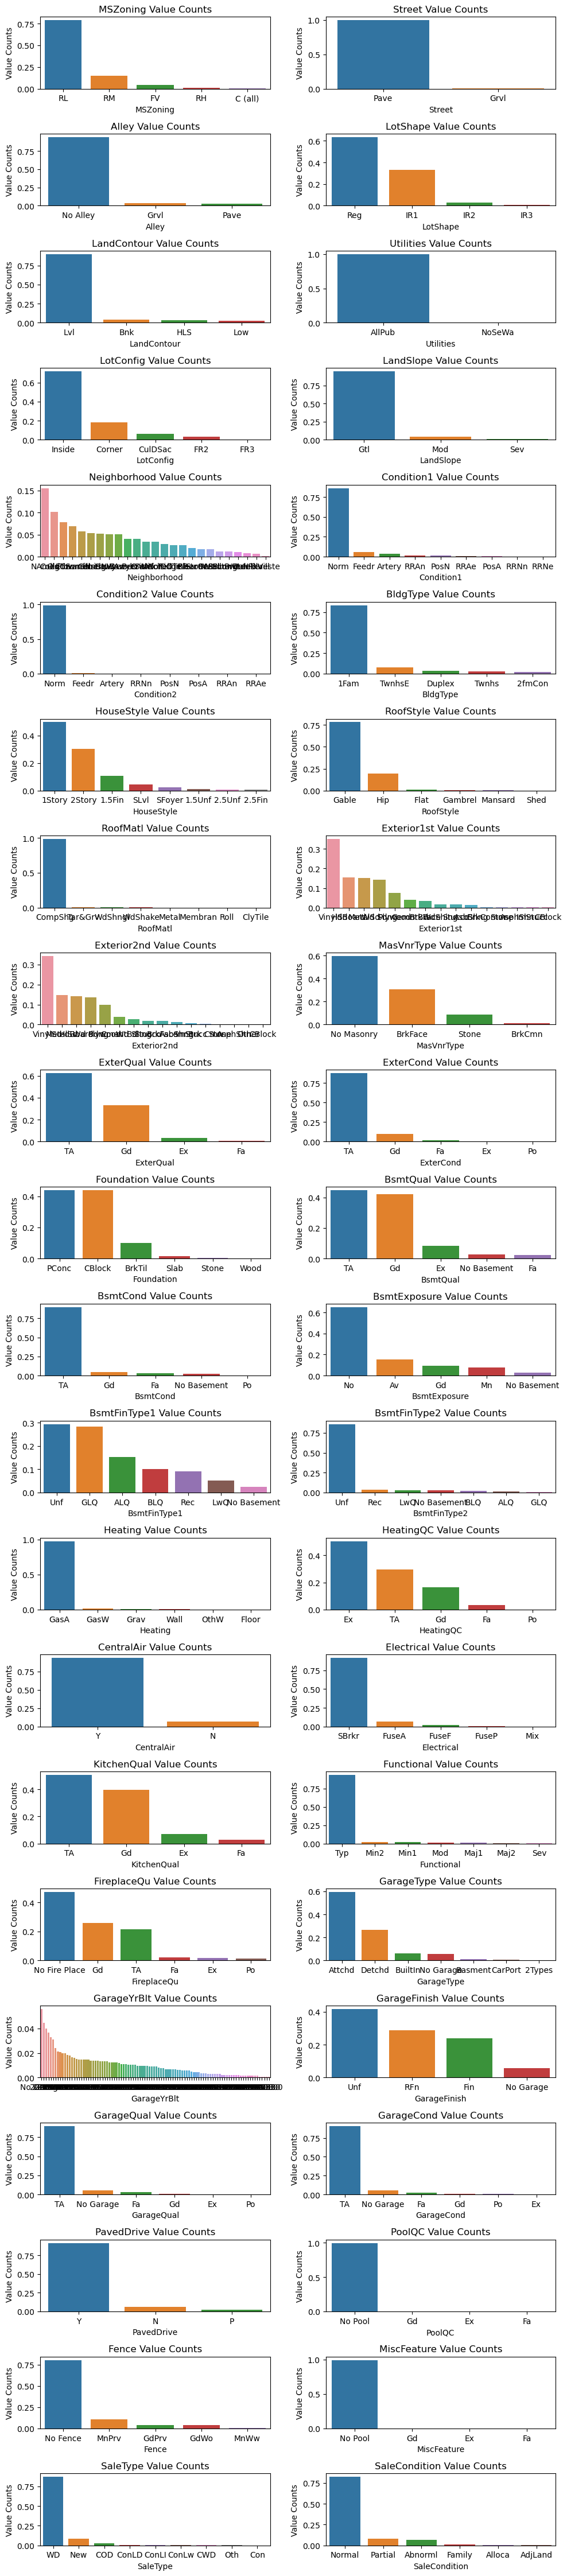

In [38]:
cols = 2
    
rows = np.ceil(len(cat_cols)/cols).astype('int')
fig,ax=plt.subplots(rows,cols,figsize=(10,45))
for idx,i in enumerate(cat_cols) : 
    idx1 = idx // cols
    idx2 = idx % cols
    hdf = df[i].value_counts(dropna=False).reset_index().fillna('None')
    hdf.iloc[:,1] = hdf.iloc[:,1] / hdf.iloc[:,1].sum()
    sns.barplot(data=hdf,x='index',y=i,ax=ax[idx1,idx2])
    ax[idx1,idx2].set_title(f'{i} Value Counts')
    ax[idx1,idx2].set_xlabel(i)
    ax[idx1,idx2].set_ylabel('Value Counts')
#     ax[idx1,idx2].set_yscale('log')
    
[fig.delaxes(i) for i in ax.flat if not i.has_data()]
plt.tight_layout()
plt.show()


## Drop Categorical Features where majority of the categorical variables belong only a to certain class where a certain class has >=75%

In [39]:
# Drop Features where majority of the values belong a single category , as this will lead to unfair comparision
drop_cols = []
for i in cat_cols : 
    hdf = df[i].value_counts(dropna=False)
    hdf = hdf / hdf.sum()
    display(hdf)
    drop_cols.append(i if (hdf >= 0.75).any() else None)
drop_cols = list(filter(None,drop_cols))


RL         0.788820
RM         0.150449
FV         0.042788
RH         0.011042
C (all)    0.006901
Name: MSZoning, dtype: float64

Pave    0.995859
Grvl    0.004141
Name: Street, dtype: float64

No Alley    0.937888
Grvl        0.034507
Pave        0.027605
Name: Alley, dtype: float64

Reg    0.633540
IR1    0.331263
IR2    0.028295
IR3    0.006901
Name: LotShape, dtype: float64

Lvl    0.897170
Bnk    0.043478
HLS    0.034507
Low    0.024845
Name: LandContour, dtype: float64

AllPub    0.99931
NoSeWa    0.00069
Name: Utilities, dtype: float64

Inside     0.719807
Corner     0.180814
CulDSac    0.064182
FR2        0.032436
FR3        0.002761
Name: LotConfig, dtype: float64

Gtl    0.946170
Mod    0.044859
Sev    0.008972
Name: LandSlope, dtype: float64

NAmes      0.155280
CollgCr    0.102139
OldTown    0.077985
Edwards    0.069013
Somerst    0.057281
Gilbert    0.053830
NridgHt    0.051760
Sawyer     0.051070
NWAmes     0.050380
SawyerW    0.040028
BrkSide    0.040028
Crawfor    0.034507
Mitchel    0.033816
NoRidge    0.028295
IDOTRR     0.025535
Timber     0.025535
ClearCr    0.019324
StoneBr    0.017253
SWISU      0.017253
MeadowV    0.011732
Blmngtn    0.011732
BrDale     0.011042
Veenker    0.007591
NPkVill    0.006211
Blueste    0.001380
Name: Neighborhood, dtype: float64

Norm      0.861974
Feedr     0.055901
Artery    0.033126
RRAn      0.017943
PosN      0.013112
RRAe      0.007591
PosA      0.005521
RRNn      0.003451
RRNe      0.001380
Name: Condition1, dtype: float64

Norm      0.989648
Feedr     0.004141
Artery    0.001380
RRNn      0.001380
PosN      0.001380
PosA      0.000690
RRAn      0.000690
RRAe      0.000690
Name: Condition2, dtype: float64

1Fam      0.835059
TwnhsE    0.077985
Duplex    0.035887
Twnhs     0.029676
2fmCon    0.021394
Name: BldgType, dtype: float64

1Story    0.496894
2Story    0.304348
1.5Fin    0.106280
SLvl      0.044168
SFoyer    0.025535
1.5Unf    0.009662
2.5Unf    0.007591
2.5Fin    0.005521
Name: HouseStyle, dtype: float64

Gable      0.780538
Hip        0.196687
Flat       0.008972
Gambrel    0.007591
Mansard    0.004831
Shed       0.001380
Name: RoofStyle, dtype: float64

CompShg    0.982057
Tar&Grv    0.007591
WdShngl    0.004141
WdShake    0.003451
Metal      0.000690
Membran    0.000690
Roll       0.000690
ClyTile    0.000690
Name: RoofMatl, dtype: float64

VinylSd    0.349896
HdBoard    0.153209
MetalSd    0.151829
Wd Sdng    0.141477
Plywood    0.074534
CemntBd    0.040718
BrkFace    0.034507
WdShing    0.017943
Stucco     0.017253
AsbShng    0.013803
BrkComm    0.001380
Stone      0.001380
AsphShn    0.000690
ImStucc    0.000690
CBlock     0.000690
Name: Exterior1st, dtype: float64

VinylSd    0.342305
MetalSd    0.147688
HdBoard    0.142857
Wd Sdng    0.135956
Plywood    0.097999
CmentBd    0.040028
Wd Shng    0.026225
Stucco     0.017943
BrkFace    0.017253
AsbShng    0.013803
ImStucc    0.006901
Brk Cmn    0.004831
Stone      0.002761
AsphShn    0.002070
Other      0.000690
CBlock     0.000690
Name: Exterior2nd, dtype: float64

No Masonry    0.595583
BrkFace       0.305728
Stone         0.088337
BrkCmn        0.010352
Name: MasVnrType, dtype: float64

TA    0.624569
Gd    0.330573
Ex    0.035197
Fa    0.009662
Name: ExterQual, dtype: float64

TA    0.877157
Gd    0.100759
Fa    0.019324
Ex    0.002070
Po    0.000690
Name: ExterCond, dtype: float64

PConc     0.438923
CBlock    0.437543
BrkTil    0.100759
Slab      0.016563
Stone     0.004141
Wood      0.002070
Name: Foundation, dtype: float64

TA             0.447205
Gd             0.420290
Ex             0.082816
No Basement    0.025535
Fa             0.024155
Name: BsmtQual, dtype: float64

TA             0.897861
Gd             0.044168
Fa             0.031056
No Basement    0.025535
Po             0.001380
Name: BsmtCond, dtype: float64

No             0.651484
Av             0.152519
Gd             0.091787
Mn             0.078675
No Basement    0.025535
Name: BsmtExposure, dtype: float64

Unf            0.293996
GLQ            0.284334
ALQ            0.151829
BLQ            0.102139
Rec            0.091097
LwQ            0.051070
No Basement    0.025535
Name: BsmtFinType1, dtype: float64

Unf            0.859903
Rec            0.037267
LwQ            0.031746
No Basement    0.025535
BLQ            0.022774
ALQ            0.013112
GLQ            0.009662
Name: BsmtFinType2, dtype: float64

GasA     0.977916
GasW     0.012422
Grav     0.004831
Wall     0.002761
OthW     0.001380
Floor    0.000690
Name: Heating, dtype: float64

Ex    0.505176
TA    0.294686
Gd    0.165631
Fa    0.033816
Po    0.000690
Name: HeatingQC, dtype: float64

Y    0.934438
N    0.065562
Name: CentralAir, dtype: float64

SBrkr    0.913734
FuseA    0.064872
FuseF    0.018634
FuseP    0.002070
Mix      0.000690
Name: Electrical, dtype: float64

TA    0.506556
Gd    0.398206
Ex    0.068323
Fa    0.026915
Name: KitchenQual, dtype: float64

Typ     0.931677
Min2    0.023464
Min1    0.021394
Mod     0.010352
Maj1    0.008972
Maj2    0.003451
Sev     0.000690
Name: Functional, dtype: float64

No Fire Place    0.472740
Gd               0.260179
TA               0.213941
Fa               0.022774
Ex               0.016563
Po               0.013803
Name: FireplaceQu, dtype: float64

Attchd       0.594203
Detchd       0.267081
BuiltIn      0.059351
No Garage    0.055901
Basment      0.013112
CarPort      0.006211
2Types       0.004141
Name: GarageType, dtype: float64

No Garage    0.055901
2005.0       0.044859
2006.0       0.040028
2004.0       0.036577
2003.0       0.033126
               ...   
1927.0       0.000690
1900.0       0.000690
1906.0       0.000690
1908.0       0.000690
1933.0       0.000690
Name: GarageYrBlt, Length: 98, dtype: float64

Unf          0.417529
RFn          0.287095
Fin          0.239476
No Garage    0.055901
Name: GarageFinish, dtype: float64

TA           0.897170
No Garage    0.055901
Fa           0.033126
Gd           0.009662
Ex           0.002070
Po           0.002070
Name: GarageQual, dtype: float64

TA           0.907522
No Garage    0.055901
Fa           0.024155
Gd           0.006211
Po           0.004831
Ex           0.001380
Name: GarageCond, dtype: float64

Y    0.917184
N    0.062112
P    0.020704
Name: PavedDrive, dtype: float64

No Pool    0.995169
Gd         0.002070
Ex         0.001380
Fa         0.001380
Name: PoolQC, dtype: float64

No Fence    0.806073
MnPrv       0.108351
GdPrv       0.040718
GdWo        0.037267
MnWw        0.007591
Name: Fence, dtype: float64

No Pool    0.995169
Gd         0.002070
Ex         0.001380
Fa         0.001380
Name: MiscFeature, dtype: float64

WD       0.868875
New      0.082126
COD      0.029676
ConLD    0.006211
ConLI    0.003451
ConLw    0.003451
CWD      0.002761
Oth      0.002070
Con      0.001380
Name: SaleType, dtype: float64

Normal     0.821946
Partial    0.084196
Abnorml    0.069703
Family     0.013803
Alloca     0.007591
AdjLand    0.002761
Name: SaleCondition, dtype: float64

In [40]:
drop_cols

['MSZoning',
 'Street',
 'Alley',
 'LandContour',
 'Utilities',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'RoofStyle',
 'RoofMatl',
 'ExterCond',
 'BsmtCond',
 'BsmtFinType2',
 'Heating',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [41]:
df = df.drop(columns =drop_cols)

In [42]:
cat_cols = df.select_dtypes(['string','object']).columns

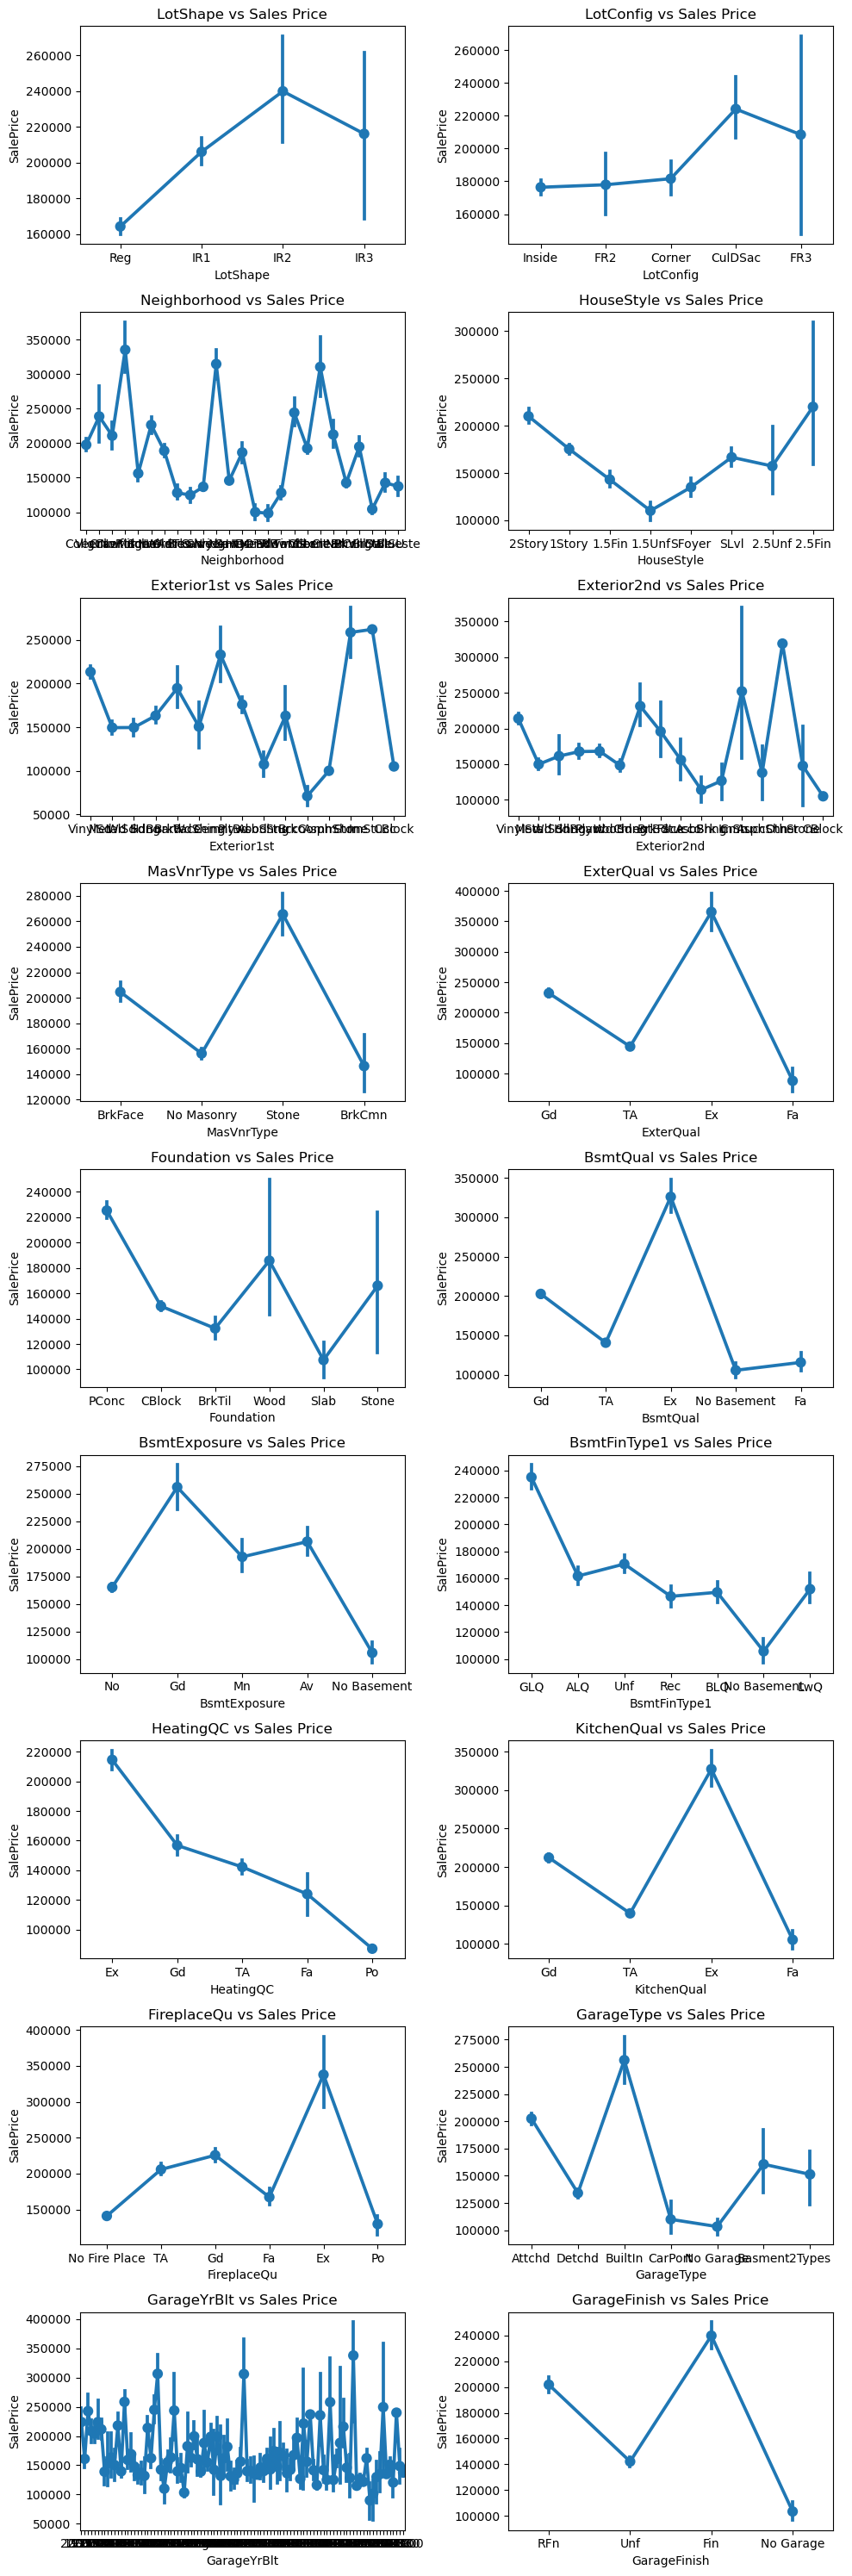

In [43]:
cols = 2
rows = np.ceil(len(cat_cols)/cols).astype('int')
fig,ax=plt.subplots(rows,cols,figsize=(10,30))
for idx,i in enumerate(cat_cols) : 
    idx1 = idx // cols
    idx2 = idx % cols
    sns.pointplot(data=df,x=i,y='SalePrice',ax=ax[idx1,idx2])
    ax[idx1,idx2].set_title(f'{i} vs Sales Price')
#     ax[idx1,idx2].axvline(np.mean(df['SalePrice']))
#     ax[idx1,idx2].set_yscale('log')
[fig.delaxes(i) for i in ax.flat if not i.has_data()]
plt.tight_layout()
plt.show()

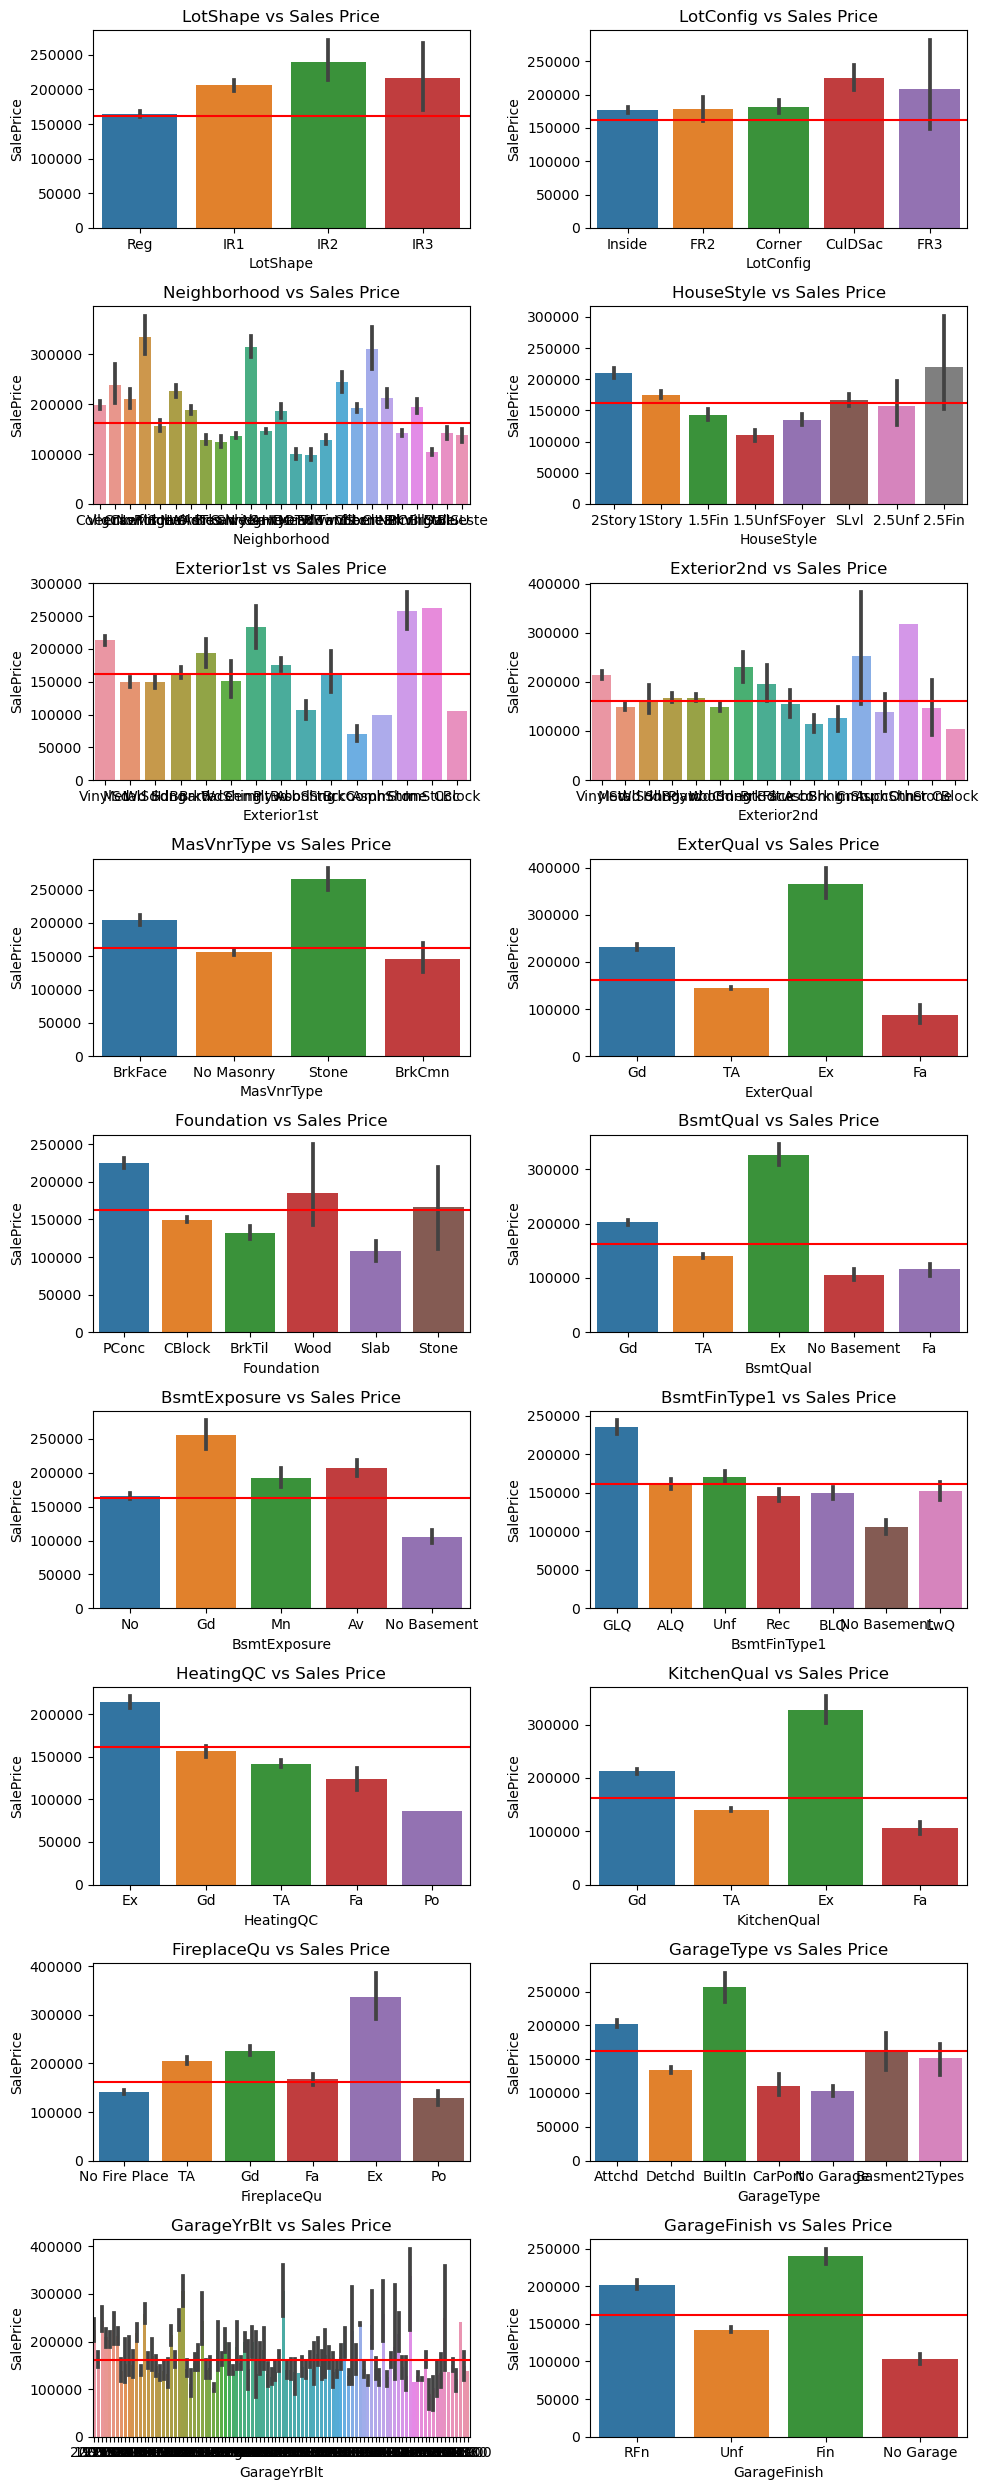

In [44]:
cols = 2
rows = np.ceil(len(cat_cols)/cols).astype('int')
fig,ax=plt.subplots(rows,cols,figsize=(10,25))
for idx,i in enumerate(cat_cols) : 
    idx1 = idx // cols
    idx2 = idx % cols
    sns.barplot(data=df,x=i,y='SalePrice',ax=ax[idx1,idx2])
    ax[idx1,idx2].set_title(f'{i} vs Sales Price')
    ax[idx1,idx2].axhline(np.median(df['SalePrice']),color='r')
#     ax[idx1,idx2].set_yscale('log')
[fig.delaxes(i) for i in ax.flat if not i.has_data()]
plt.tight_layout()
plt.show()

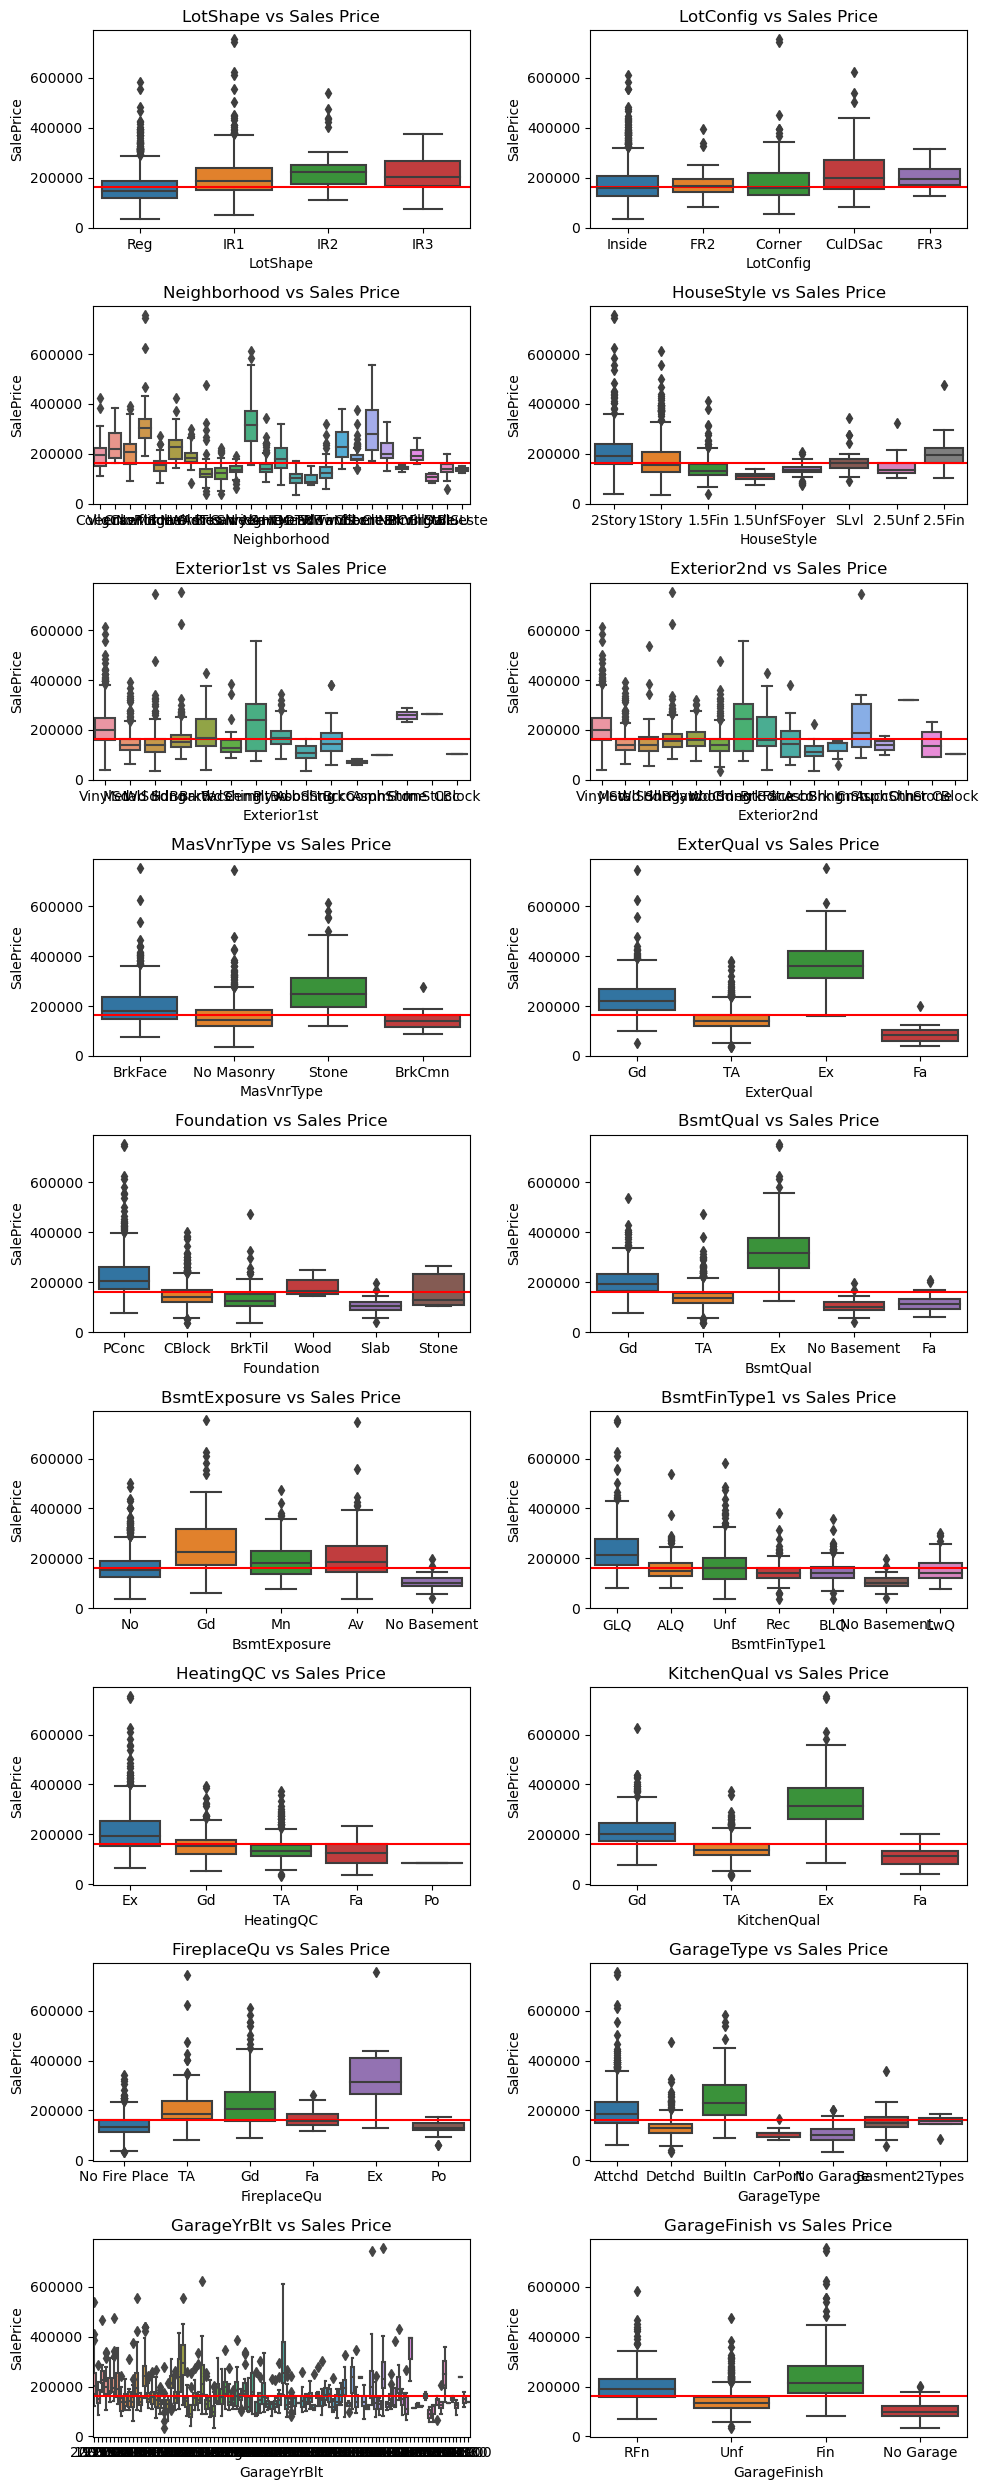

In [45]:
cols = 2
rows = np.ceil(len(cat_cols)/cols).astype('int')
fig,ax=plt.subplots(rows,cols,figsize=(10,25))
for idx,i in enumerate(cat_cols) : 
    idx1 = idx // cols
    idx2 = idx % cols
    sns.boxplot(data=df,x=i,y='SalePrice',ax=ax[idx1,idx2])
    ax[idx1,idx2].set_title(f'{i} vs Sales Price')
    ax[idx1,idx2].axhline(np.median(df['SalePrice']),color='r')
#     ax[idx1,idx2].set_yscale('log')
[fig.delaxes(i) for i in ax.flat if not i.has_data()]
plt.tight_layout()
plt.show()

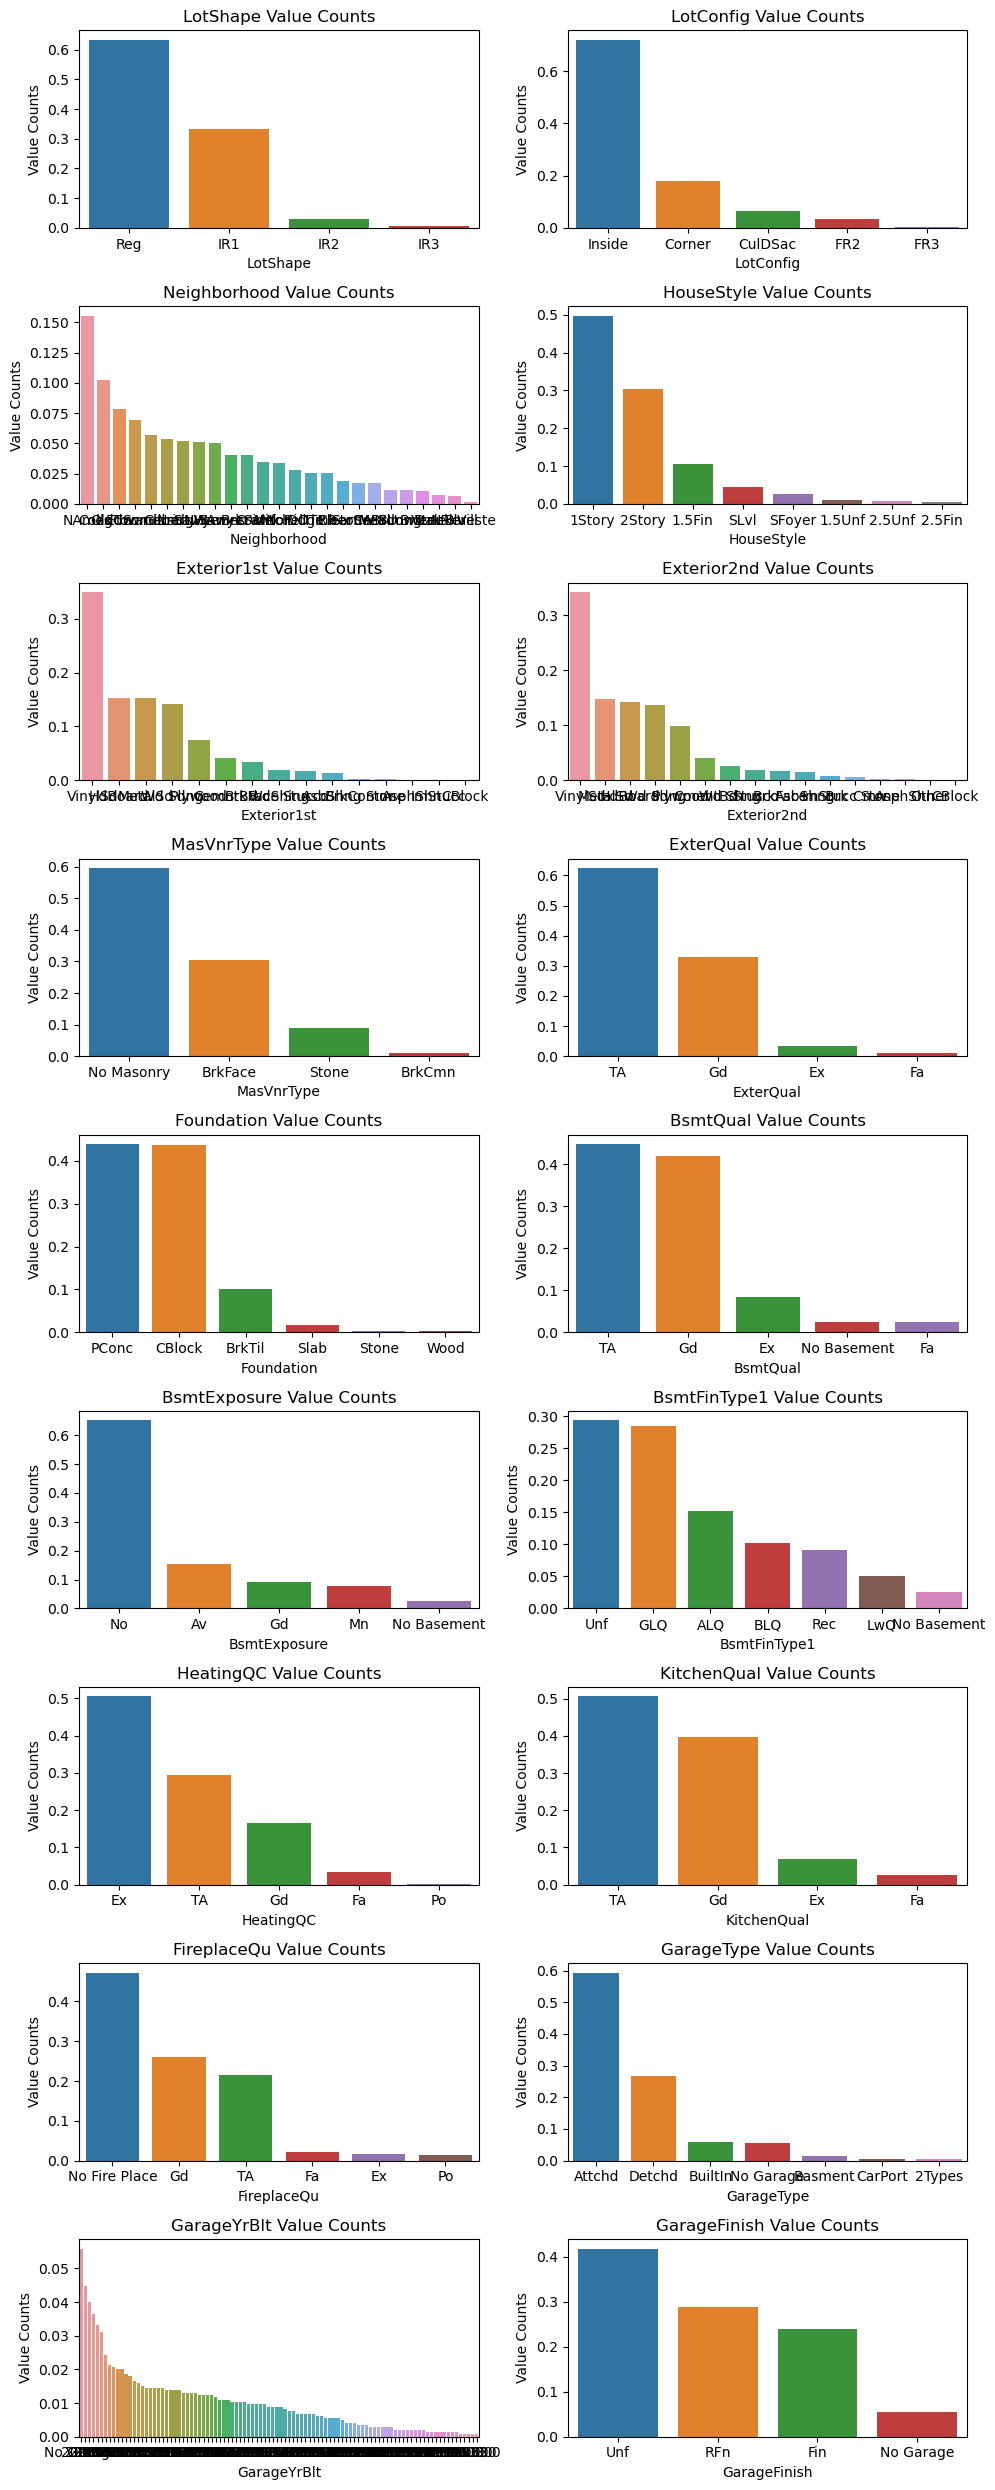

In [46]:
cols = 2
    
rows = np.ceil(len(cat_cols)/cols).astype('int')
fig,ax=plt.subplots(rows,cols,figsize=(10,25))
for idx,i in enumerate(cat_cols) : 
    idx1 = idx // cols
    idx2 = idx % cols
    hdf = df[i].value_counts(dropna=False).reset_index().fillna('None')
    hdf.iloc[:,1] = hdf.iloc[:,1] / hdf.iloc[:,1].sum()
    sns.barplot(data=hdf,x='index',y=i,ax=ax[idx1,idx2])
    ax[idx1,idx2].set_title(f'{i} Value Counts')
    ax[idx1,idx2].set_xlabel(i)
    ax[idx1,idx2].set_ylabel('Value Counts')
#     ax[idx1,idx2].set_yscale('log')
    
[fig.delaxes(i) for i in ax.flat if not i.has_data()]
plt.tight_layout()
plt.show()


## Re-Create Bins for categorical variables

- This is based noof values present in each bin

In [47]:
# Re-Create bins for categorical variables
df['LotShape']  = df['LotShape'].replace({'IR2' : 'other_lot_types','IR3' : 'other_lot_types'})
df['Foundation']  = df['Foundation'].replace({'Slab' : 'other_foundation_types','Stone' : 'other_foundation_types','Wood' : 'other_foundation_types'})


In [48]:
house_df =df['HouseStyle'].value_counts() / df['HouseStyle'].value_counts().sum() < 0.05

In [49]:
col_house = house_df[house_df].index
df['HouseStyle'] = df['HouseStyle'].replace(col_house , 'other_house_styles')

- Drop 2nd Exterior column

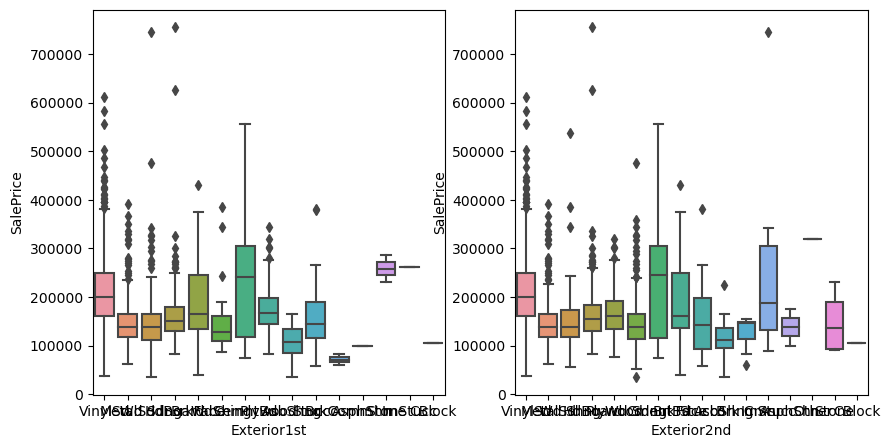

In [50]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
sns.boxplot(data=df,x='Exterior1st',y='SalePrice',ax=ax[0])
sns.boxplot(data=df,x='Exterior2nd',y='SalePrice',ax=ax[1])
plt.show()


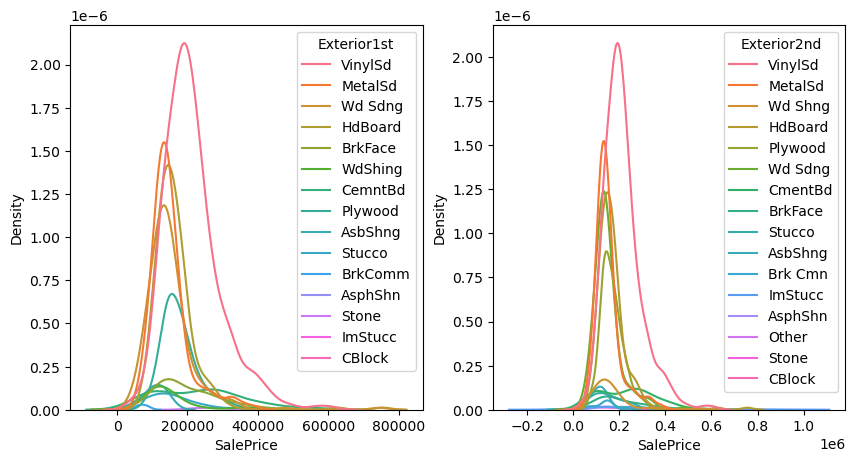

In [51]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
sns.kdeplot(data=df,hue='Exterior1st',x='SalePrice',ax=ax[0])
sns.kdeplot(data=df,hue='Exterior2nd',x='SalePrice',ax=ax[1])
plt.show()


In [52]:
(df['Exterior1st']==df['Exterior2nd']).value_counts() / len(df)

True     0.853692
False    0.146308
dtype: float64

<Axes: xlabel='Exterior1st'>

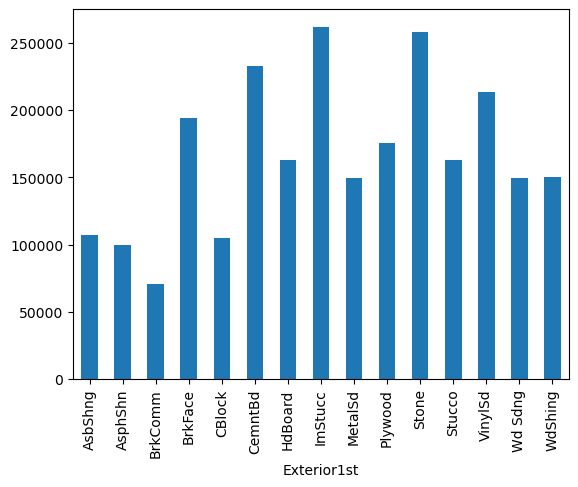

In [53]:
df.groupby(['Exterior1st'])['SalePrice'].mean().plot(kind='bar')

In [54]:
df = df.drop('Exterior2nd',axis=1)

In [55]:
df['Neighborhood'].value_counts() / df['Neighborhood'].value_counts().sum()

NAmes      0.155280
CollgCr    0.102139
OldTown    0.077985
Edwards    0.069013
Somerst    0.057281
Gilbert    0.053830
NridgHt    0.051760
Sawyer     0.051070
NWAmes     0.050380
SawyerW    0.040028
BrkSide    0.040028
Crawfor    0.034507
Mitchel    0.033816
NoRidge    0.028295
IDOTRR     0.025535
Timber     0.025535
ClearCr    0.019324
StoneBr    0.017253
SWISU      0.017253
MeadowV    0.011732
Blmngtn    0.011732
BrDale     0.011042
Veenker    0.007591
NPkVill    0.006211
Blueste    0.001380
Name: Neighborhood, dtype: float64

<Axes: xlabel='Neighborhood'>

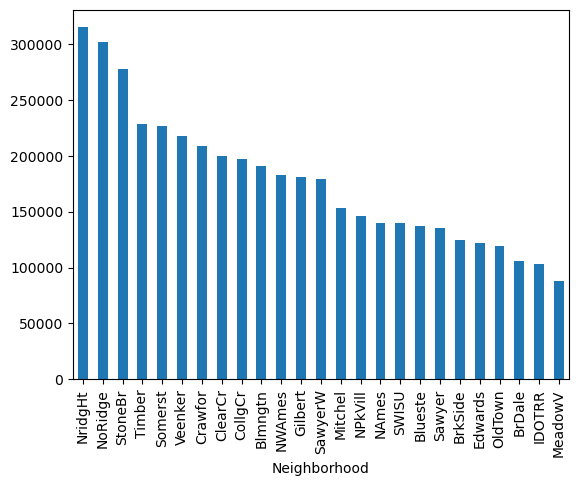

In [56]:
df.groupby(['Neighborhood'])['SalePrice'].median().sort_values(ascending=False).plot(kind='bar')

- The year garage was built doesn't have any patterns

In [57]:

df.groupby(['GarageYrBlt'])['SalePrice'].median().sort_values(ascending=False).head(20)

GarageYrBlt
2010.0    394432.0
2008.0    295493.0
2009.0    252678.0
1934.0    249550.0
2006.0    243289.0
1908.0    240000.0
2007.0    239000.0
1932.0    239000.0
1918.0    237000.0
1994.0    229000.0
2001.0    226500.0
2002.0    214900.0
1995.0    212250.0
2003.0    204250.0
1997.0    200000.0
1998.0    199900.0
1996.0    197000.0
1993.0    193750.0
1988.0    192750.0
2005.0    192500.0
Name: SalePrice, dtype: float64

In [58]:
df = df.drop('GarageYrBlt',axis=1)

## Numeric Cols vs Target (Sale Price)
- 

In [59]:
numeric_cols = df.select_dtypes('number').columns
numeric_cols = list(filter(lambda x : x != 'SalePrice',numeric_cols))
numeric_cols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [60]:
for i in numeric_cols : 
    print(df[i].value_counts())

20     531
60     295
50     144
120     86
30      69
160     63
70      60
80      57
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
0.0      257
60.0     143
70.0      70
80.0      69
50.0      57
        ... 
137.0      1
38.0       1
33.0       1
150.0      1
46.0       1
Name: LotFrontage, Length: 111, dtype: int64
7200     25
9600     24
6000     17
8400     14
9000     14
         ..
10289     1
12243     1
1526      1
9490      1
9717      1
Name: LotArea, Length: 1064, dtype: int64
5     396
6     372
7     314
8     166
4     116
9      43
3      20
10     17
2       3
1       2
Name: OverallQual, dtype: int64
5    812
6    251
7    205
8     72
4     57
3     24
9     22
2      5
1      1
Name: OverallCond, dtype: int64
2006    64
2005    64
2004    54
2007    47
2003    43
        ..
1875     1
1911     1
1917     1
1872     1
1905     1
Name: YearBuilt, Length: 112, dtype: int64
1950    178
2006     96
2005     

## Check Linearity between numeric predictor and target and Correlations 
- OverallQual , YearBuilt , TotalbsmtSF,  1stFlrSF and 2ndFlrSF , GrLivArea and Garage Area are some features with a high linearity and correlation 

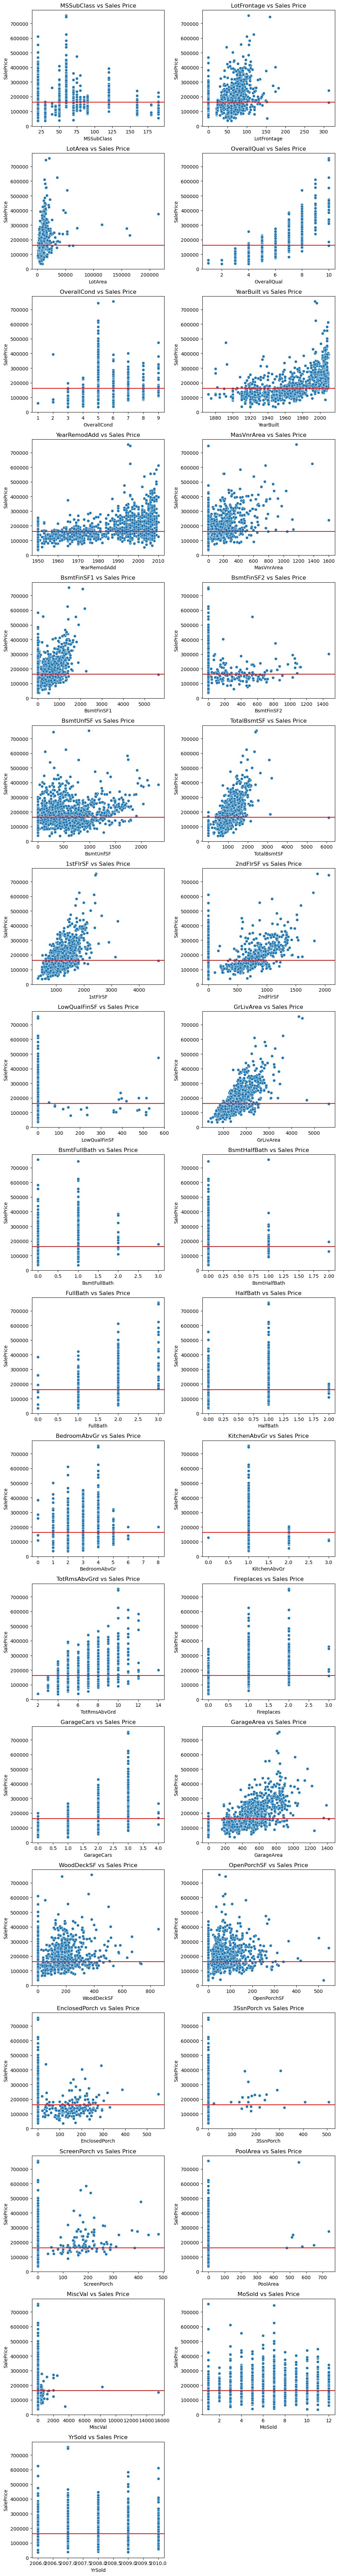

In [61]:
cols = 2
rows = np.ceil(len(numeric_cols)/cols).astype('int')
fig,ax=plt.subplots(rows,cols,figsize=(10,75))
for idx,i in enumerate(numeric_cols) : 
    idx1 = idx // cols
    idx2 = idx % cols
    sns.scatterplot(data=df,x=i,y='SalePrice',ax=ax[idx1,idx2])
    ax[idx1,idx2].set_title(f'{i} vs Sales Price')
    ax[idx1,idx2].axhline(np.median(df['SalePrice']),color='r')
#     ax[idx1,idx2].set_yscale('log')
[fig.delaxes(i) for i in ax.flat if not i.has_data()]
plt.tight_layout()
plt.show()

In [62]:
df['MSSubClass'] = df['MSSubClass'].astype('str')

df['MoSold'] = df['MoSold'].astype('str')

In [63]:
df['MoSold'].value_counts() / df['MoSold'].value_counts().sum()

6     0.174603
7     0.161491
5     0.138716
4     0.097308
8     0.083506
3     0.071774
10    0.060732
11    0.053830
9     0.042788
12    0.040028
1     0.040028
2     0.035197
Name: MoSold, dtype: float64

In [64]:
df['MSSubClass'].value_counts() / df['MSSubClass'].value_counts().sum()

20     0.366460
60     0.203589
50     0.099379
120    0.059351
30     0.047619
160    0.043478
70     0.041408
80     0.039337
90     0.035887
190    0.020704
85     0.013803
75     0.011042
45     0.008282
180    0.006901
40     0.002761
Name: MSSubClass, dtype: float64

In [65]:
cat_cols_num = ['OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','YrSold','YearBuilt','YearRemodAdd']
numeric_cols=[i for i in numeric_cols if i not in cat_cols_num]
# numeric_cols.append('SalePrice')
numeric_cols = [i for i in numeric_cols if i not in ['MSSubClass','MoSold']]

In [66]:

cat_cols = df.select_dtypes(['object','string']).columns

In [67]:
numeric_cols

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

In [68]:
numeric_cols.append('SalePrice')

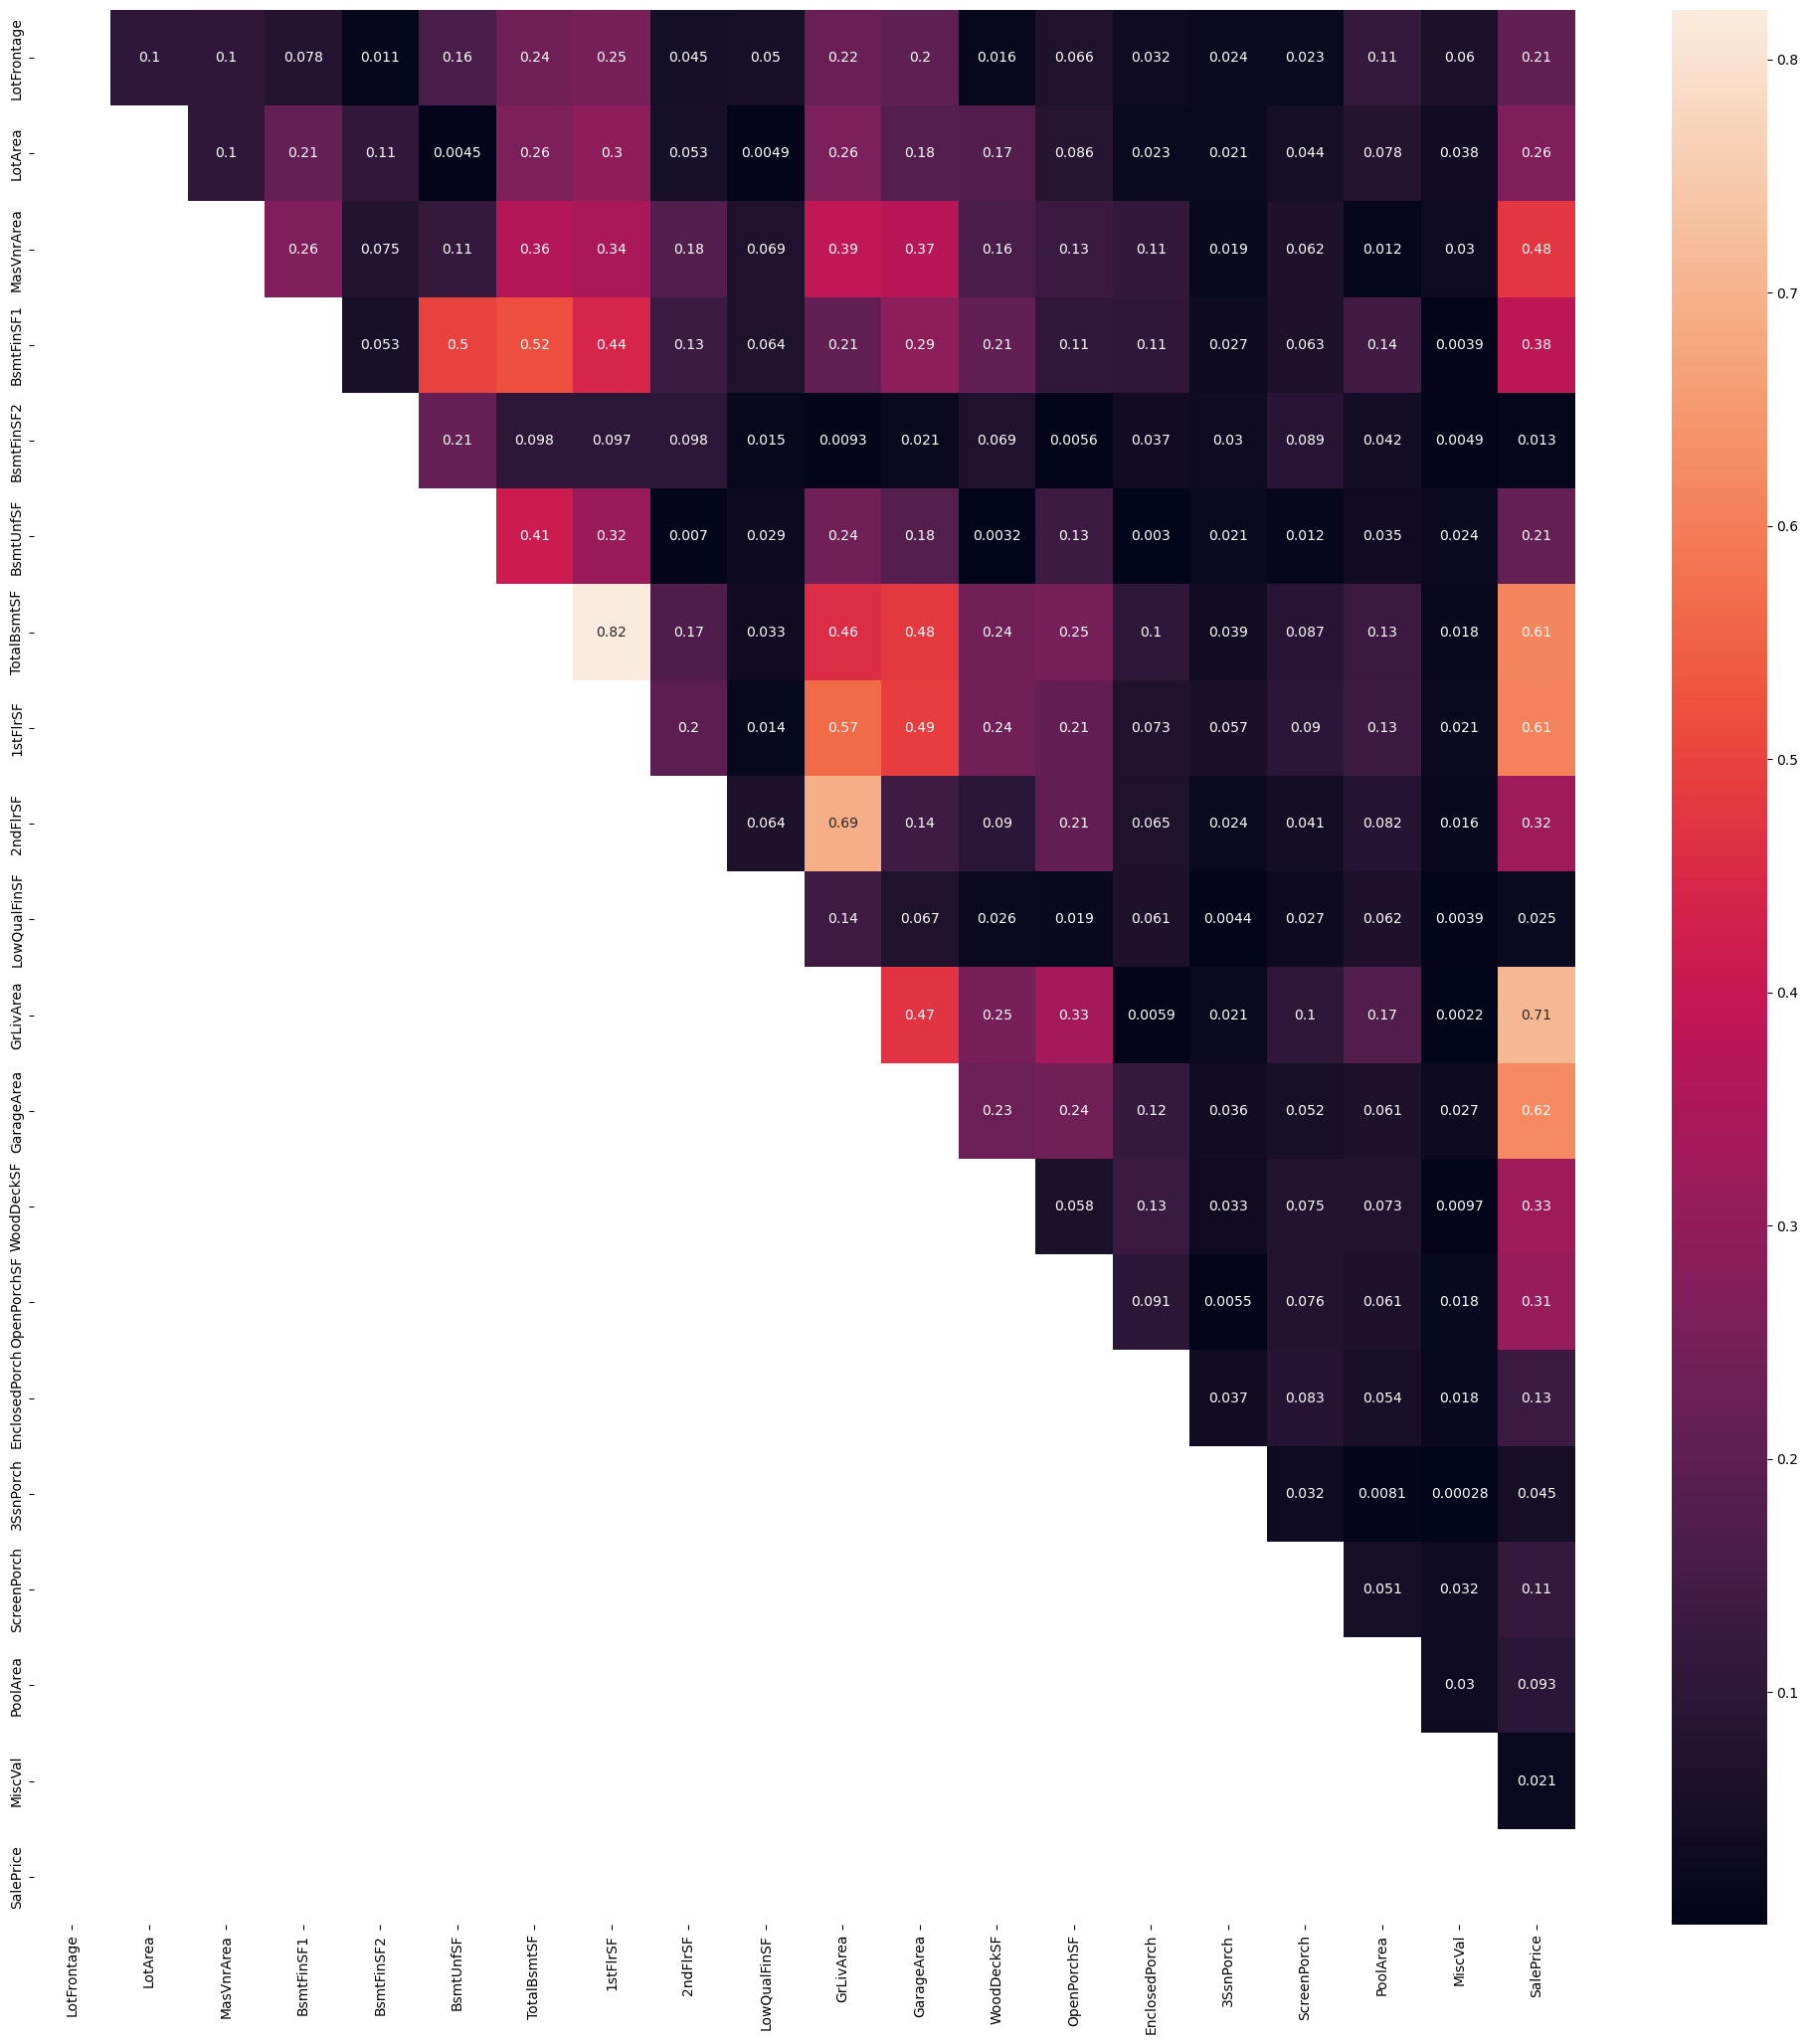

In [69]:
plt.figure(figsize=(25,25))
corr_mat = df[numeric_cols].corr()
heat_mat = corr_mat.where(np.triu(np.ones_like(corr_mat),k=1).astype('bool'))
sns.heatmap(abs(heat_mat),annot=True)
plt.show()

In [70]:
# numeric_cols = list(set(np.concatenate([list((heat_mat[col] >= 0.5)[heat_mat[col] >= 0.5].index) for col in heat_mat.columns])))

In [71]:
corr_sales_price = abs(heat_mat['SalePrice'])

In [72]:
corr_sales_price

LotFrontage      0.207892
LotArea          0.264787
MasVnrArea       0.476985
BsmtFinSF1       0.383398
BsmtFinSF2       0.012762
BsmtUnfSF        0.214098
TotalBsmtSF      0.614420
1stFlrSF         0.606678
2ndFlrSF         0.323842
LowQualFinSF     0.025171
GrLivArea        0.710319
GarageArea       0.621918
WoodDeckSF       0.325569
OpenPorchSF      0.312097
EnclosedPorch    0.128553
3SsnPorch        0.045379
ScreenPorch      0.113362
PoolArea         0.093227
MiscVal          0.020885
SalePrice             NaN
Name: SalePrice, dtype: float64

In [73]:
corr_sales_price.reset_index()

index  SalePrice
0     LotFrontage   0.207892
1         LotArea   0.264787
2      MasVnrArea   0.476985
3      BsmtFinSF1   0.383398
4      BsmtFinSF2   0.012762
5       BsmtUnfSF   0.214098
6     TotalBsmtSF   0.614420
7        1stFlrSF   0.606678
8        2ndFlrSF   0.323842
9    LowQualFinSF   0.025171
10      GrLivArea   0.710319
11     GarageArea   0.621918
12     WoodDeckSF   0.325569
13    OpenPorchSF   0.312097
14  EnclosedPorch   0.128553
15      3SsnPorch   0.045379
16    ScreenPorch   0.113362
17       PoolArea   0.093227
18        MiscVal   0.020885
19      SalePrice        NaN

## check correlation of predictors with target (sales price)

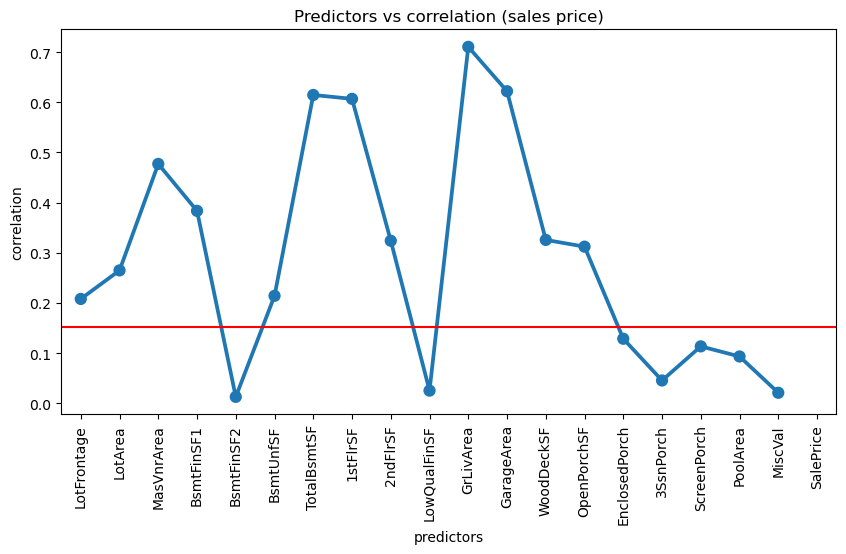

0.1523547794668925


In [74]:
plt.figure(figsize=(10,5))
sns.pointplot(data=corr_sales_price.reset_index(),x='index',y='SalePrice')
plt.axhline(corr_sales_price.quantile(0.35),color='r')
plt.xticks(rotation=90)
plt.xlabel("predictors")
plt.ylabel("correlation")
plt.title("Predictors vs correlation (sales price)")
plt.show()
print(corr_sales_price.quantile(0.35))

- drop features below or on the redline

In [75]:
df = df.drop(['BsmtFinSF2','LowQualFinSF','MiscVal','PoolArea','ScreenPorch','3SsnPorch','EnclosedPorch'],axis=1)


In [76]:
numeric_cols = [i for i in numeric_cols if i not in ['BsmtFinSF2','LowQualFinSF','MiscVal','PoolArea','ScreenPorch','3SsnPorch','EnclosedPorch']]

In [77]:
df.shape

(1449, 45)

In [78]:
numeric_cols

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'SalePrice']

In [79]:
cat_cols

Index(['MSSubClass', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle',
       'Exterior1st', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual',
       'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'MoSold'],
      dtype='object')

In [80]:
for i in cat_cols : 
    df[i]  = df[i].astype('category')

## encode categorical variables

In [81]:
for i in cat_cols :
    print(f"{i} has the following values {df[i].astype('str').unique()}")
        

MSSubClass has the following values ['60' '20' '70' '50' '190' '45' '90' '120' '30' '85' '80' '160' '75' '180'
 '40']
LotShape has the following values ['Reg' 'IR1' 'other_lot_types']
LotConfig has the following values ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
Neighborhood has the following values ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
HouseStyle has the following values ['2Story' '1Story' '1.5Fin' 'other_house_styles']
Exterior1st has the following values ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']
MasVnrType has the following values ['BrkFace' 'No Masonry' 'Stone' 'BrkCmn']
ExterQual has the following values ['Gd' 'TA' 'Ex' 'Fa']
Foundation has the following values ['PConc' 'C

In [82]:
for i in cat_cols_num :
    print(f"{i} has the following values {df[i].unique()}")
        

OverallQual has the following values [ 7  6  8  5  9  4 10  3  1  2]
OverallCond has the following values [5 8 6 7 4 2 3 9 1]
BsmtFullBath has the following values [1 0 2 3]
BsmtHalfBath has the following values [0 1 2]
FullBath has the following values [2 1 3 0]
HalfBath has the following values [1 0 2]
BedroomAbvGr has the following values [3 4 1 2 0 5 6 8]
KitchenAbvGr has the following values [1 2 3 0]
TotRmsAbvGrd has the following values [ 8  6  7  9  5 11  4 10 12  3  2 14]
Fireplaces has the following values [0 1 2 3]
GarageCars has the following values [2 3 1 0 4]
YrSold has the following values [2008 2007 2006 2009 2010]
YearBuilt has the following values [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1

### oridinal encoding

In [83]:
bsmt_cols = df.columns[df.columns.str.lower().str.contains('^bsmt')]

In [84]:
bsmt_cols

Index(['BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF',
       'BsmtFullBath', 'BsmtHalfBath'],
      dtype='object')

In [85]:
cat_cols

Index(['MSSubClass', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle',
       'Exterior1st', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual',
       'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'MoSold'],
      dtype='object')

In [86]:
np.intersect1d(bsmt_cols,cat_cols)

array(['BsmtExposure', 'BsmtFinType1', 'BsmtQual'], dtype=object)

<Axes: xlabel='BsmtQual', ylabel='SalePrice'>

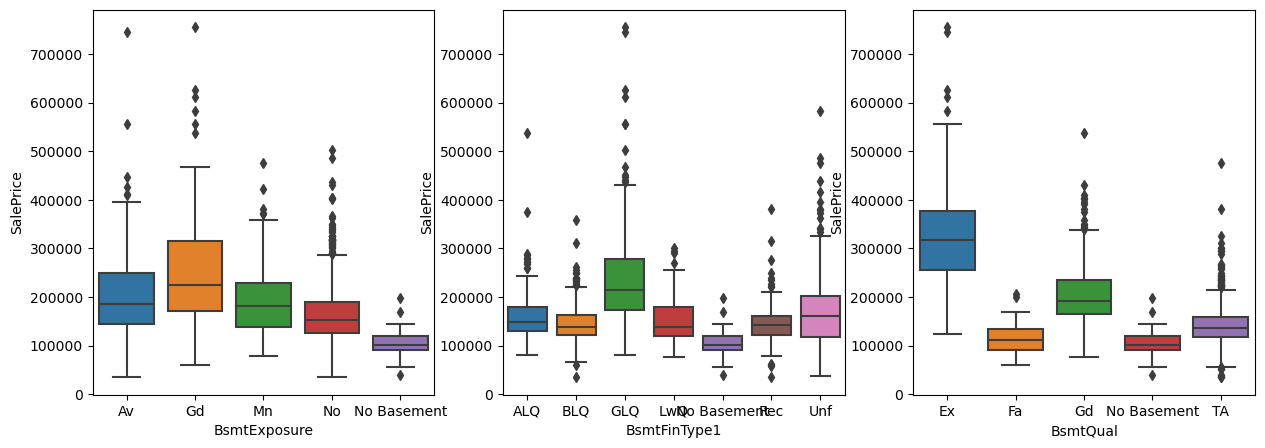

In [87]:
fig,ax = plt.subplots(1,3,figsize=(15,5))
sns.boxplot(data=df,x='BsmtExposure',y='SalePrice',ax=ax[0])
sns.boxplot(data=df,x='BsmtFinType1',y='SalePrice',ax=ax[1])
sns.boxplot(data=df,x='BsmtQual',y='SalePrice',ax=ax[2])

In [88]:
qual_dict  = {'Ex' : 5
,'Gd' : 4 
,'TA' : 3 
,'Fa' : 2 
,'Po' : 1
,'No Basement' : 0
,'No Fire Place' : 0
,'No Garage' : 0
}

In [89]:
qual_cols = list(df.columns[df.columns.str.lower().str.contains('qual$')])
df[qual_cols +  ['FireplaceQu' , 'HeatingQC'] ]= df[qual_cols + ['FireplaceQu' , 'HeatingQC']].replace(qual_dict)


In [90]:
bsmt_cols

Index(['BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF',
       'BsmtFullBath', 'BsmtHalfBath'],
      dtype='object')

In [91]:
bs_exp_dict  = {'No' : 0, 'Gd' : 3, 'Mn' : 1, 'Av' : 2, 'No Basement' : 0}

In [92]:
df['BsmtExposure']= df['BsmtExposure'].replace(bs_exp_dict)

In [93]:
# df[['BsmtQual','BsmtExposure','SalePrice']].astype('float').corr()

In [94]:
 grgfin = {'Fin' : 3,
       'RFn' : 2, 
       'Unf' : 1 ,
       'No Garage' : 0 } 
df['GarageFinish'] = df['GarageFinish'].replace(grgfin)

In [95]:
encoded_cols = qual_cols +  ['FireplaceQu' , 'HeatingQC' ,'BsmtExposure','GarageFinish']
dummy_cols = np.setdiff1d(cat_cols,encoded_cols)

In [96]:
cat_cols

Index(['MSSubClass', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle',
       'Exterior1st', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual',
       'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'MoSold'],
      dtype='object')

### dummy encoding

In [97]:
for i in dummy_cols : 
    df[i] = df[i].astype('str') + '_' + str(i)
    df[i] = df[i].astype('category')
df = pd.concat([df] + [pd.get_dummies(df[i],drop_first=True) for i in dummy_cols],axis=1)
df = df.drop(dummy_cols,axis=1)

In [98]:
df.columns[df.columns.duplicated()]

Index([], dtype='object')

In [99]:
df.shape

(1449, 124)

In [100]:
# df  = df[df.columns[~df.columns.duplicated(keep='first')]]

In [101]:
# numeric_cols = [i for i in numeric_cols if i in df.columns]

In [102]:
numeric_cols

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'SalePrice']

In [103]:

corr_mat = df[numeric_cols].corr()
heat_mat = corr_mat.where(np.triu(np.ones_like(corr_mat),k=1).astype('bool'))

In [104]:
heat_mat = abs(heat_mat)

In [105]:
heat_mat

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtUnfSF  \
LotFrontage          NaN  0.102881    0.104905    0.078483   0.158670   
LotArea              NaN       NaN    0.104123    0.213544   0.004485   
MasVnrArea           NaN       NaN         NaN    0.263918   0.112740   
BsmtFinSF1           NaN       NaN         NaN         NaN   0.500082   
BsmtUnfSF            NaN       NaN         NaN         NaN        NaN   
TotalBsmtSF          NaN       NaN         NaN         NaN        NaN   
1stFlrSF             NaN       NaN         NaN         NaN        NaN   
2ndFlrSF             NaN       NaN         NaN         NaN        NaN   
GrLivArea            NaN       NaN         NaN         NaN        NaN   
GarageArea           NaN       NaN         NaN         NaN        NaN   
WoodDeckSF           NaN       NaN         NaN         NaN        NaN   
OpenPorchSF          NaN       NaN         NaN         NaN        NaN   
SalePrice            NaN       NaN         NaN         NaN        NaN   

             TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  GarageArea  \
LotFrontage     0.239432  0.248259  0.044555   0.223309    0.199818   
LotArea         0.260748  0.296304  0.052751   0.261067    0.180980   
MasVnrArea      0.363302  0.343810  0.175469   0.390780    0.372211   
BsmtFinSF1      0.519764  0.441955  0.133988   0.206300    0.294104   
BsmtUnfSF       0.412449  0.317304  0.006994   0.240668    0.181398   
TotalBsmtSF          NaN  0.821273  0.169687   0.457204    0.484513   
1stFlrSF             NaN       NaN  0.197944   0.566326    0.490168   
2ndFlrSF             NaN       NaN       NaN   0.690660    0.141352   
GrLivArea            NaN       NaN       NaN        NaN    0.469742   
GarageArea           NaN       NaN       NaN        NaN         NaN   
WoodDeckSF           NaN       NaN       NaN        NaN         NaN   
OpenPorchSF          NaN       NaN       NaN        NaN         NaN   
SalePrice            NaN       NaN       NaN        NaN         NaN   

             WoodDeckSF  OpenPorchSF  SalePrice  
LotFrontage    0.015858     0.066198   0.207892  
LotArea        0.173133     0.086139   0.264787  
MasVnrArea     0.160350     0.125957   0.476985  
BsmtFinSF1     0.206768     0.108666   0.383398  
BsmtUnfSF      0.003198     0.131077   0.214098  
TotalBsmtSF    0.239105     0.249108   0.614420  
1stFlrSF       0.239824     0.211330   0.606678  
2ndFlrSF       0.090317     0.210151   0.323842  
GrLivArea      0.248057     0.330749   0.710319  
GarageArea     0.226764     0.240087   0.621918  
WoodDeckSF          NaN     0.058410   0.325569  
OpenPorchSF         NaN          NaN   0.312097  
SalePrice           NaN          NaN        NaN

In [106]:
heat_mat=  heat_mat.sort_values(['SalePrice'],ascending=False)

In [107]:
heat_mat

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtUnfSF  \
GrLivArea            NaN       NaN         NaN         NaN        NaN   
GarageArea           NaN       NaN         NaN         NaN        NaN   
TotalBsmtSF          NaN       NaN         NaN         NaN        NaN   
1stFlrSF             NaN       NaN         NaN         NaN        NaN   
MasVnrArea           NaN       NaN         NaN    0.263918   0.112740   
BsmtFinSF1           NaN       NaN         NaN         NaN   0.500082   
WoodDeckSF           NaN       NaN         NaN         NaN        NaN   
2ndFlrSF             NaN       NaN         NaN         NaN        NaN   
OpenPorchSF          NaN       NaN         NaN         NaN        NaN   
LotArea              NaN       NaN    0.104123    0.213544   0.004485   
BsmtUnfSF            NaN       NaN         NaN         NaN        NaN   
LotFrontage          NaN  0.102881    0.104905    0.078483   0.158670   
SalePrice            NaN       NaN         NaN         NaN        NaN   

             TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  GarageArea  \
GrLivArea            NaN       NaN       NaN        NaN    0.469742   
GarageArea           NaN       NaN       NaN        NaN         NaN   
TotalBsmtSF          NaN  0.821273  0.169687   0.457204    0.484513   
1stFlrSF             NaN       NaN  0.197944   0.566326    0.490168   
MasVnrArea      0.363302  0.343810  0.175469   0.390780    0.372211   
BsmtFinSF1      0.519764  0.441955  0.133988   0.206300    0.294104   
WoodDeckSF           NaN       NaN       NaN        NaN         NaN   
2ndFlrSF             NaN       NaN       NaN   0.690660    0.141352   
OpenPorchSF          NaN       NaN       NaN        NaN         NaN   
LotArea         0.260748  0.296304  0.052751   0.261067    0.180980   
BsmtUnfSF       0.412449  0.317304  0.006994   0.240668    0.181398   
LotFrontage     0.239432  0.248259  0.044555   0.223309    0.199818   
SalePrice            NaN       NaN       NaN        NaN         NaN   

             WoodDeckSF  OpenPorchSF  SalePrice  
GrLivArea      0.248057     0.330749   0.710319  
GarageArea     0.226764     0.240087   0.621918  
TotalBsmtSF    0.239105     0.249108   0.614420  
1stFlrSF       0.239824     0.211330   0.606678  
MasVnrArea     0.160350     0.125957   0.476985  
BsmtFinSF1     0.206768     0.108666   0.383398  
WoodDeckSF          NaN     0.058410   0.325569  
2ndFlrSF       0.090317     0.210151   0.323842  
OpenPorchSF         NaN          NaN   0.312097  
LotArea        0.173133     0.086139   0.264787  
BsmtUnfSF      0.003198     0.131077   0.214098  
LotFrontage    0.015858     0.066198   0.207892  
SalePrice           NaN          NaN        NaN

In [108]:
df.loc[:,cat_cols_num[:11]] = df.loc[:,cat_cols_num[:11]].astype('int')

In [109]:
numeric_cols = numeric_cols + cat_cols_num[:11] 

In [110]:
numeric_cols.remove('SalePrice')
numeric_cols.append('SalePrice')

In [111]:
corr_mat = df[numeric_cols].corr()
heat_mat = corr_mat.where(np.triu(np.ones_like(corr_mat),k=1).astype('bool'))
heat_mat = abs(heat_mat)

<Axes: >

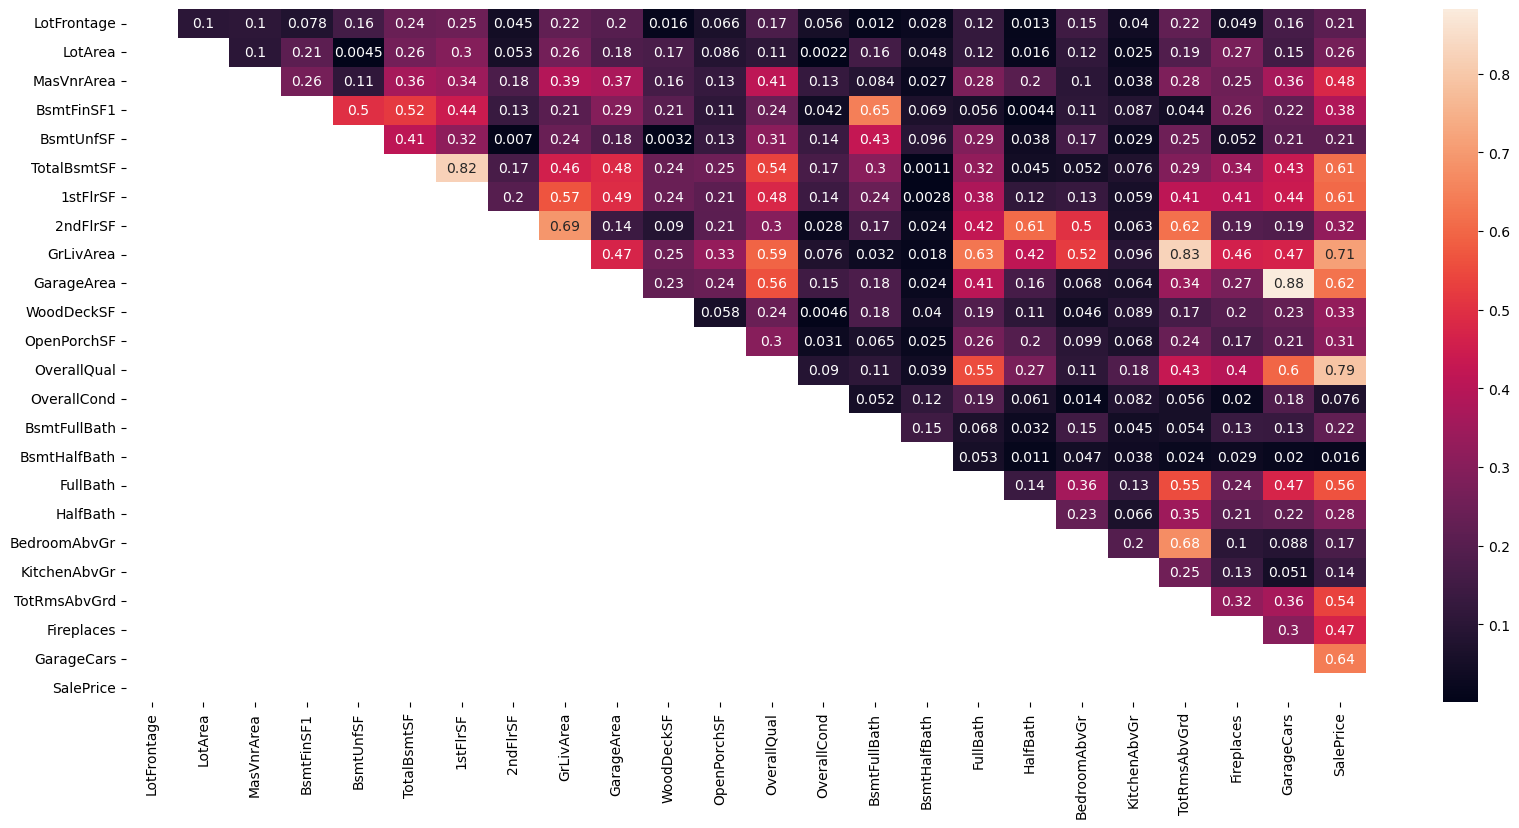

In [112]:
plt.figure(figsize=(20,9))
sns.heatmap(heat_mat,annot=True)

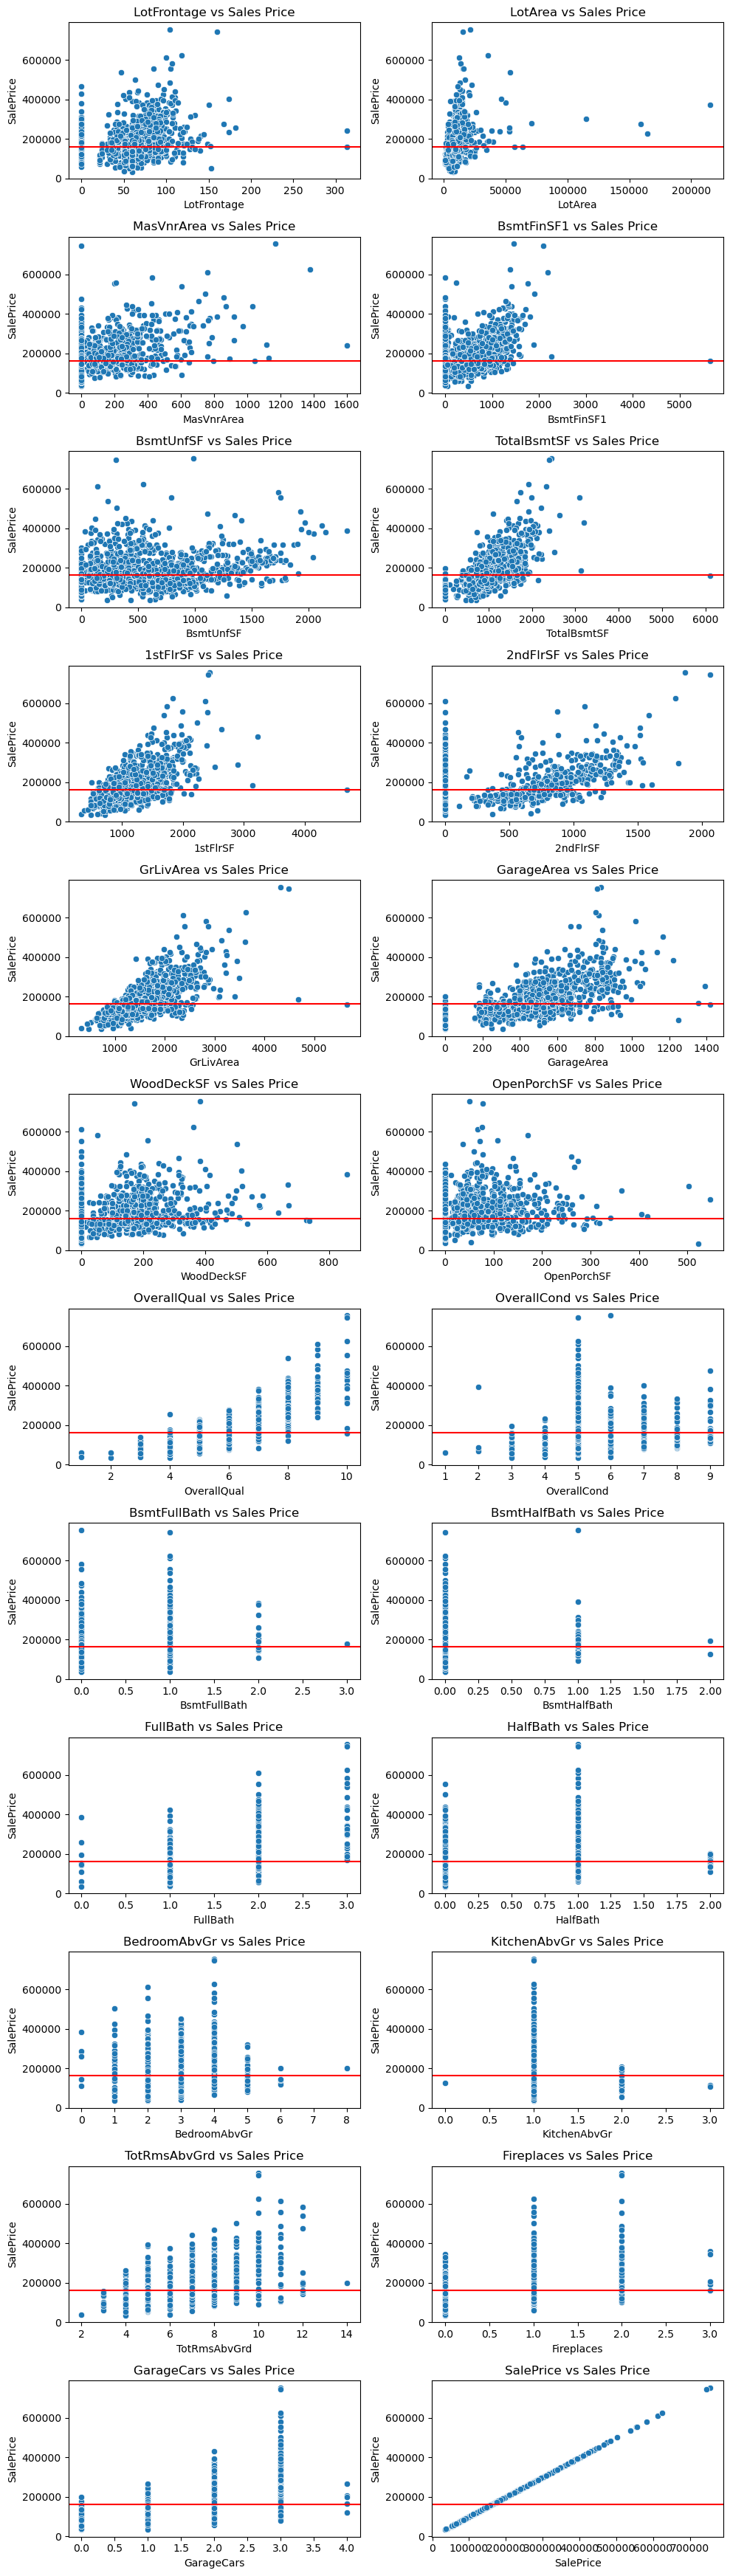

In [113]:
cols = 2
rows = np.ceil(len(numeric_cols)/cols).astype('int')
fig,ax=plt.subplots(rows,cols,figsize=(10,35))
for idx,i in enumerate(numeric_cols) : 
    idx1 = idx // cols
    idx2 = idx % cols
    sns.scatterplot(data=df,x=i,y='SalePrice',ax=ax[idx1,idx2])
    ax[idx1,idx2].set_title(f'{i} vs Sales Price')
    ax[idx1,idx2].axhline(np.median(df['SalePrice']),color='r')
#     ax[idx1,idx2].set_xscale('log')
[fig.delaxes(i) for i in ax.flat if not i.has_data()]
plt.tight_layout()
plt.show()

In [114]:
heat_mat.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'OverallQual', 'OverallCond',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'SalePrice'],
      dtype='object')

- Drop predictor columns that have multi collinearity with threshold of 0.81

In [115]:
drop_num_cols = [col for col in heat_mat.columns[:-1] if (heat_mat[col] > 0.81)[heat_mat[col] > 0.81].sum()]

In [116]:
drop_num_cols.remove('1stFlrSF')
drop_num_cols.append("TotalBsmtSF")

In [117]:
df = df.drop(drop_num_cols,axis=1)

In [118]:
drop_num_cols

['TotRmsAbvGrd', 'GarageCars', 'TotalBsmtSF']

In [119]:
numeric_cols = [i for i in numeric_cols if i not in drop_num_cols]

In [120]:
numeric_cols.remove('HalfBath')
numeric_cols.remove('BsmtFullBath')
numeric_cols.remove('BsmtHalfBath')
df = df.drop(columns=['HalfBath','BsmtFullBath','BsmtHalfBath'])

<Axes: >

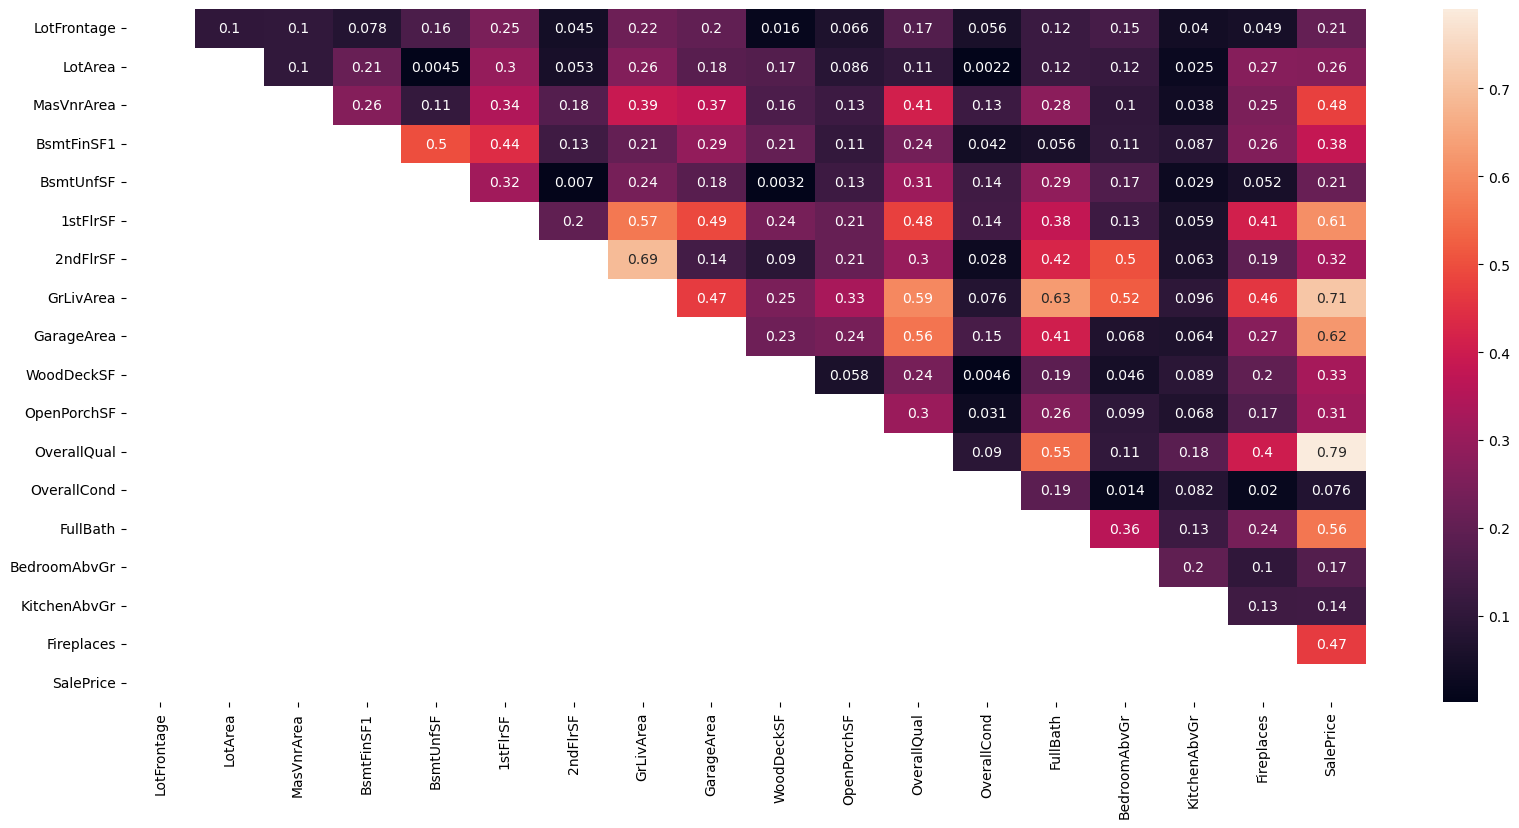

In [121]:
corr_mat = df[numeric_cols].corr()
heat_mat = corr_mat.where(np.triu(np.ones_like(corr_mat),k=1).astype('bool'))
heat_mat = abs(heat_mat)
plt.figure(figsize=(20,9))
sns.heatmap(heat_mat,annot=True)

In [122]:
df[['GrLivArea','GarageArea']].describe()

GrLivArea   GarageArea
count  1449.000000  1449.000000
mean   1513.914424   472.242926
std     526.108808   214.051742
min     334.000000     0.000000
25%    1128.000000   327.000000
50%    1459.000000   478.000000
75%    1776.000000   576.000000
max    5642.000000  1418.000000

<Axes: ylabel='Frequency'>

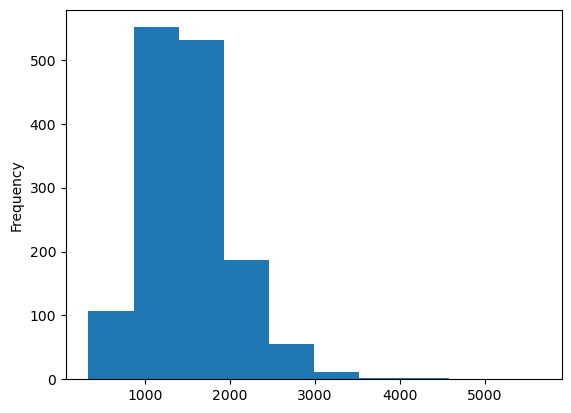

In [123]:
df['GrLivArea'].plot(kind='hist')

<Axes: ylabel='Frequency'>

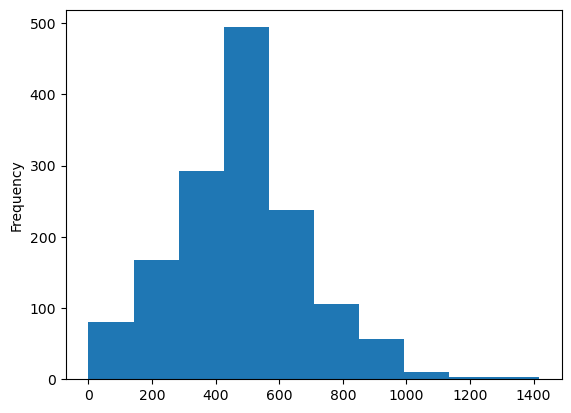

In [124]:
df['GarageArea'].plot(kind='hist')

In [125]:
numeric_cols.remove('GrLivArea')
df = df.drop(['GrLivArea'],axis=1)

In [126]:
len(numeric_cols)

17

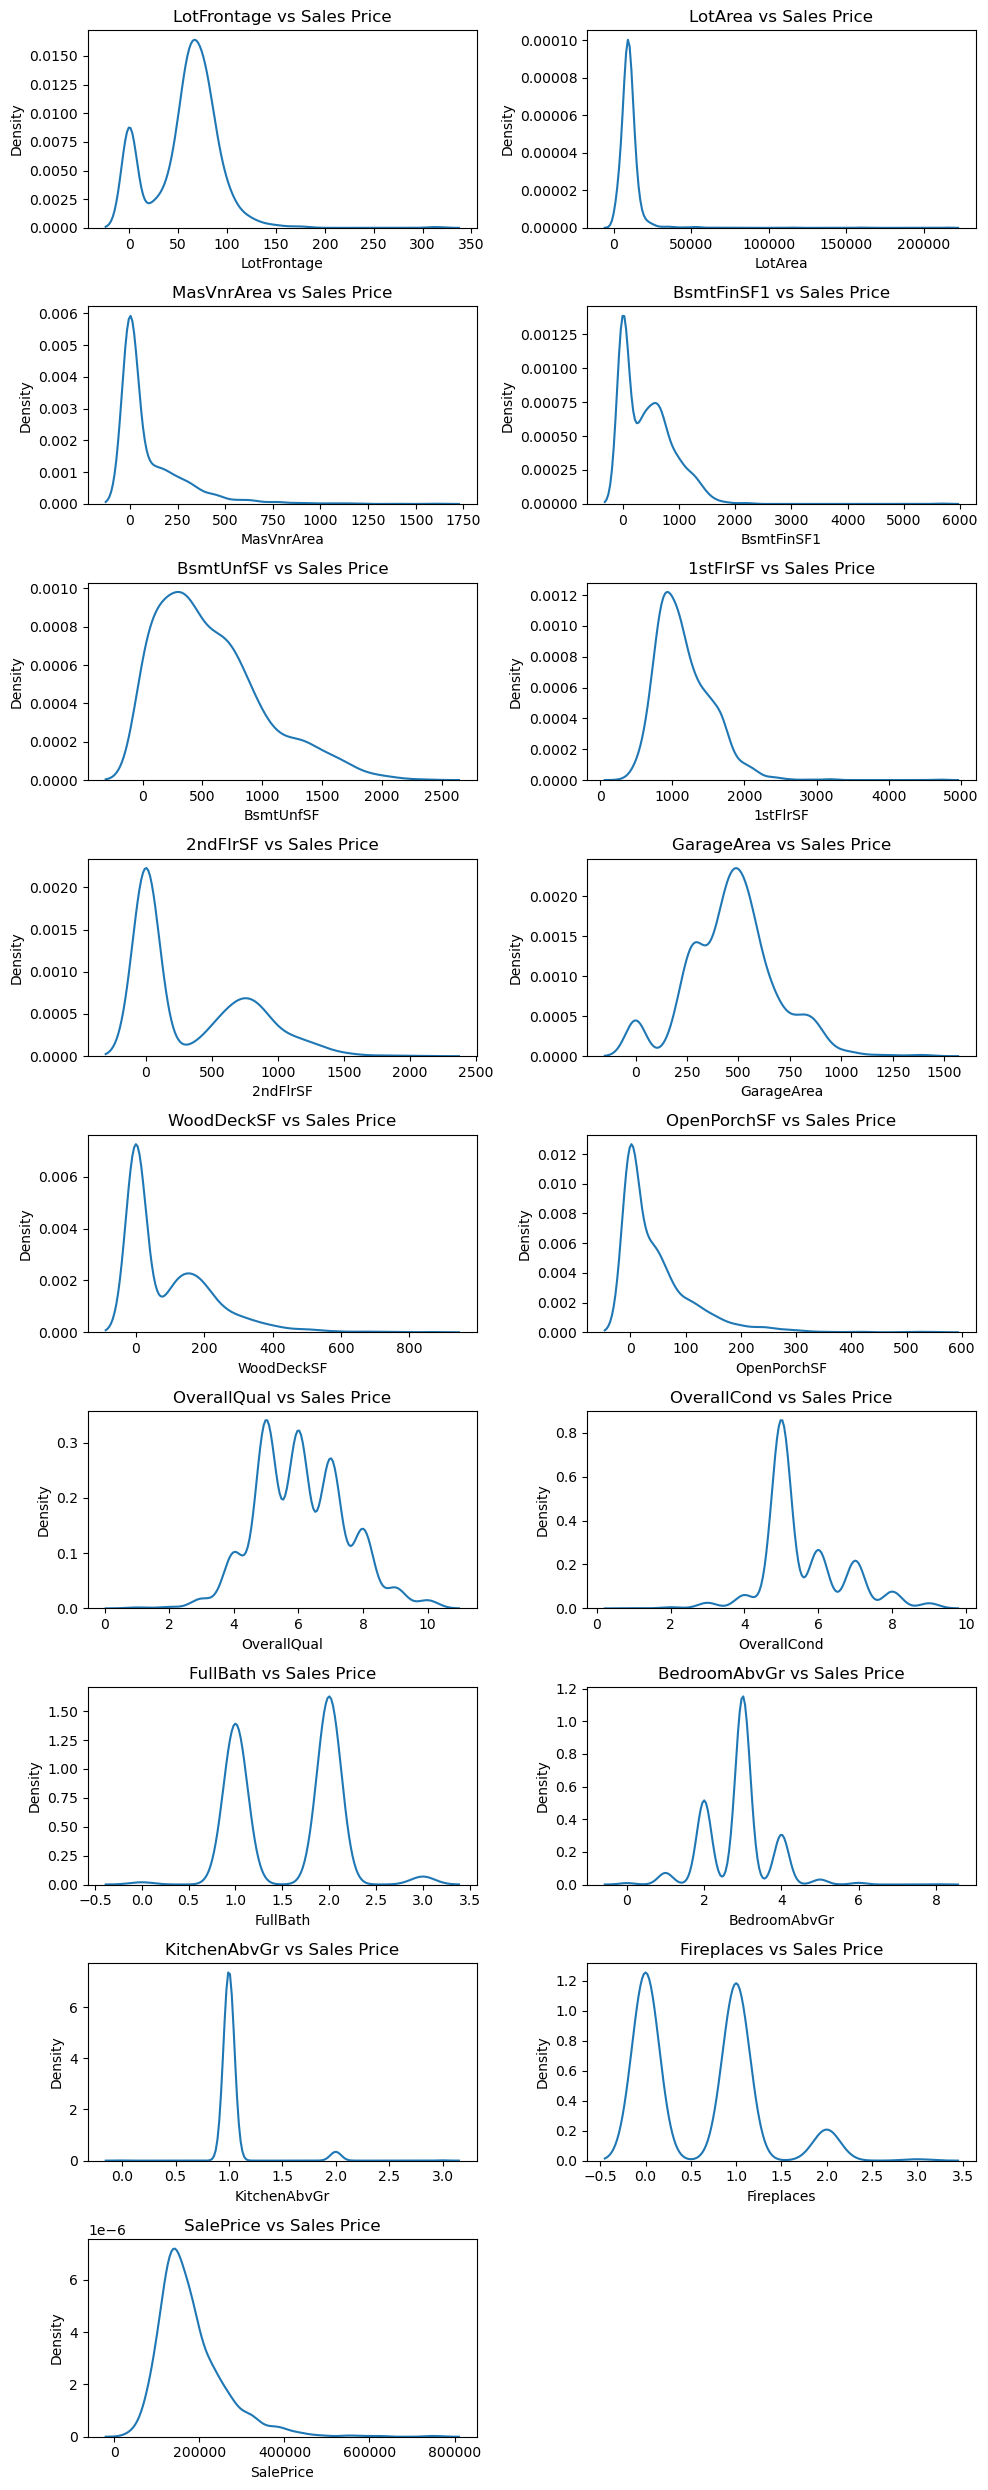

In [127]:
cols = 2
rows = np.ceil(len(numeric_cols)/cols).astype('int')
fig,ax=plt.subplots(rows,cols,figsize=(10,25))
for idx,i in enumerate(numeric_cols) : 
    idx1 = idx // cols
    idx2 = idx % cols
    sns.kdeplot(data=df,x=i,ax=ax[idx1,idx2])
    ax[idx1,idx2].set_title(f'{i} vs Sales Price')
#     ax[idx1,idx2].axhline(np.median(df['SalePrice']),color='r')
#     ax[idx1,idx2].set_yscale('log')
[fig.delaxes(i) for i in ax.flat if not i.has_data()]
plt.tight_layout()
plt.show()

In [128]:
df[numeric_cols].describe()

LotFrontage        LotArea   MasVnrArea   BsmtFinSF1    BsmtUnfSF  \
count  1449.000000    1449.000000  1449.000000  1449.000000  1449.000000   
mean     57.600414   10505.292616   103.596273   442.109731   566.227743   
std      34.671721    9999.462295   181.159595   455.182945   441.569073   
min       0.000000    1300.000000     0.000000     0.000000     0.000000   
25%      42.000000    7535.000000     0.000000     0.000000   221.000000   
50%      63.000000    9464.000000     0.000000   381.000000   476.000000   
75%      79.000000   11600.000000   166.000000   706.000000   806.000000   
max     313.000000  215245.000000  1600.000000  5644.000000  2336.000000   

          1stFlrSF     2ndFlrSF   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1449.000000  1449.000000  1449.000000  1449.000000  1449.000000   
mean   1161.384403   346.641132   472.242926    94.443754    46.420290   
std     385.026776   436.467071   214.051742   125.492157    66.081656   
min     334.000000     0.000000     0.000000     0.000000     0.000000   
25%     882.000000     0.000000   327.000000     0.000000     0.000000   
50%    1086.000000     0.000000   478.000000     0.000000    24.000000   
75%    1391.000000   728.000000   576.000000   168.000000    68.000000   
max    4692.000000  2065.000000  1418.000000   857.000000   547.000000   

       OverallQual  OverallCond     FullBath  BedroomAbvGr  KitchenAbvGr  \
count  1449.000000  1449.000000  1449.000000   1449.000000   1449.000000   
mean      6.091787     5.580400     1.561767      2.866805      1.046239   
std       1.381306     1.113976     0.550440      0.815633      0.219715   
min       1.000000     1.000000     0.000000      0.000000      0.000000   
25%       5.000000     5.000000     1.000000      2.000000      1.000000   
50%       6.000000     5.000000     2.000000      3.000000      1.000000   
75%       7.000000     6.000000     2.000000      3.000000      1.000000   
max      10.000000     9.000000     3.000000      8.000000      3.000000   

        Fireplaces      SalePrice  
count  1449.000000    1449.000000  
mean      0.612146  180544.563147  
std       0.643726   79319.721026  
min       0.000000   34900.000000  
25%       0.000000  129900.000000  
50%       1.000000  162000.000000  
75%       1.000000  214000.000000  
max       3.000000  755000.000000

## All numeric cols have a sharp increase between the 0.99 and 1.00 percentiles
- Filter out values above the 99th percentile in each feature 

In [129]:
quantile_df =df[numeric_cols].quantile(list(np.arange(0.75,1.0,0.01)) + [1.0]).reset_index().rename(columns = {'index' : 'quantile'})

## Point plots represent the data between [75,100] percentiles

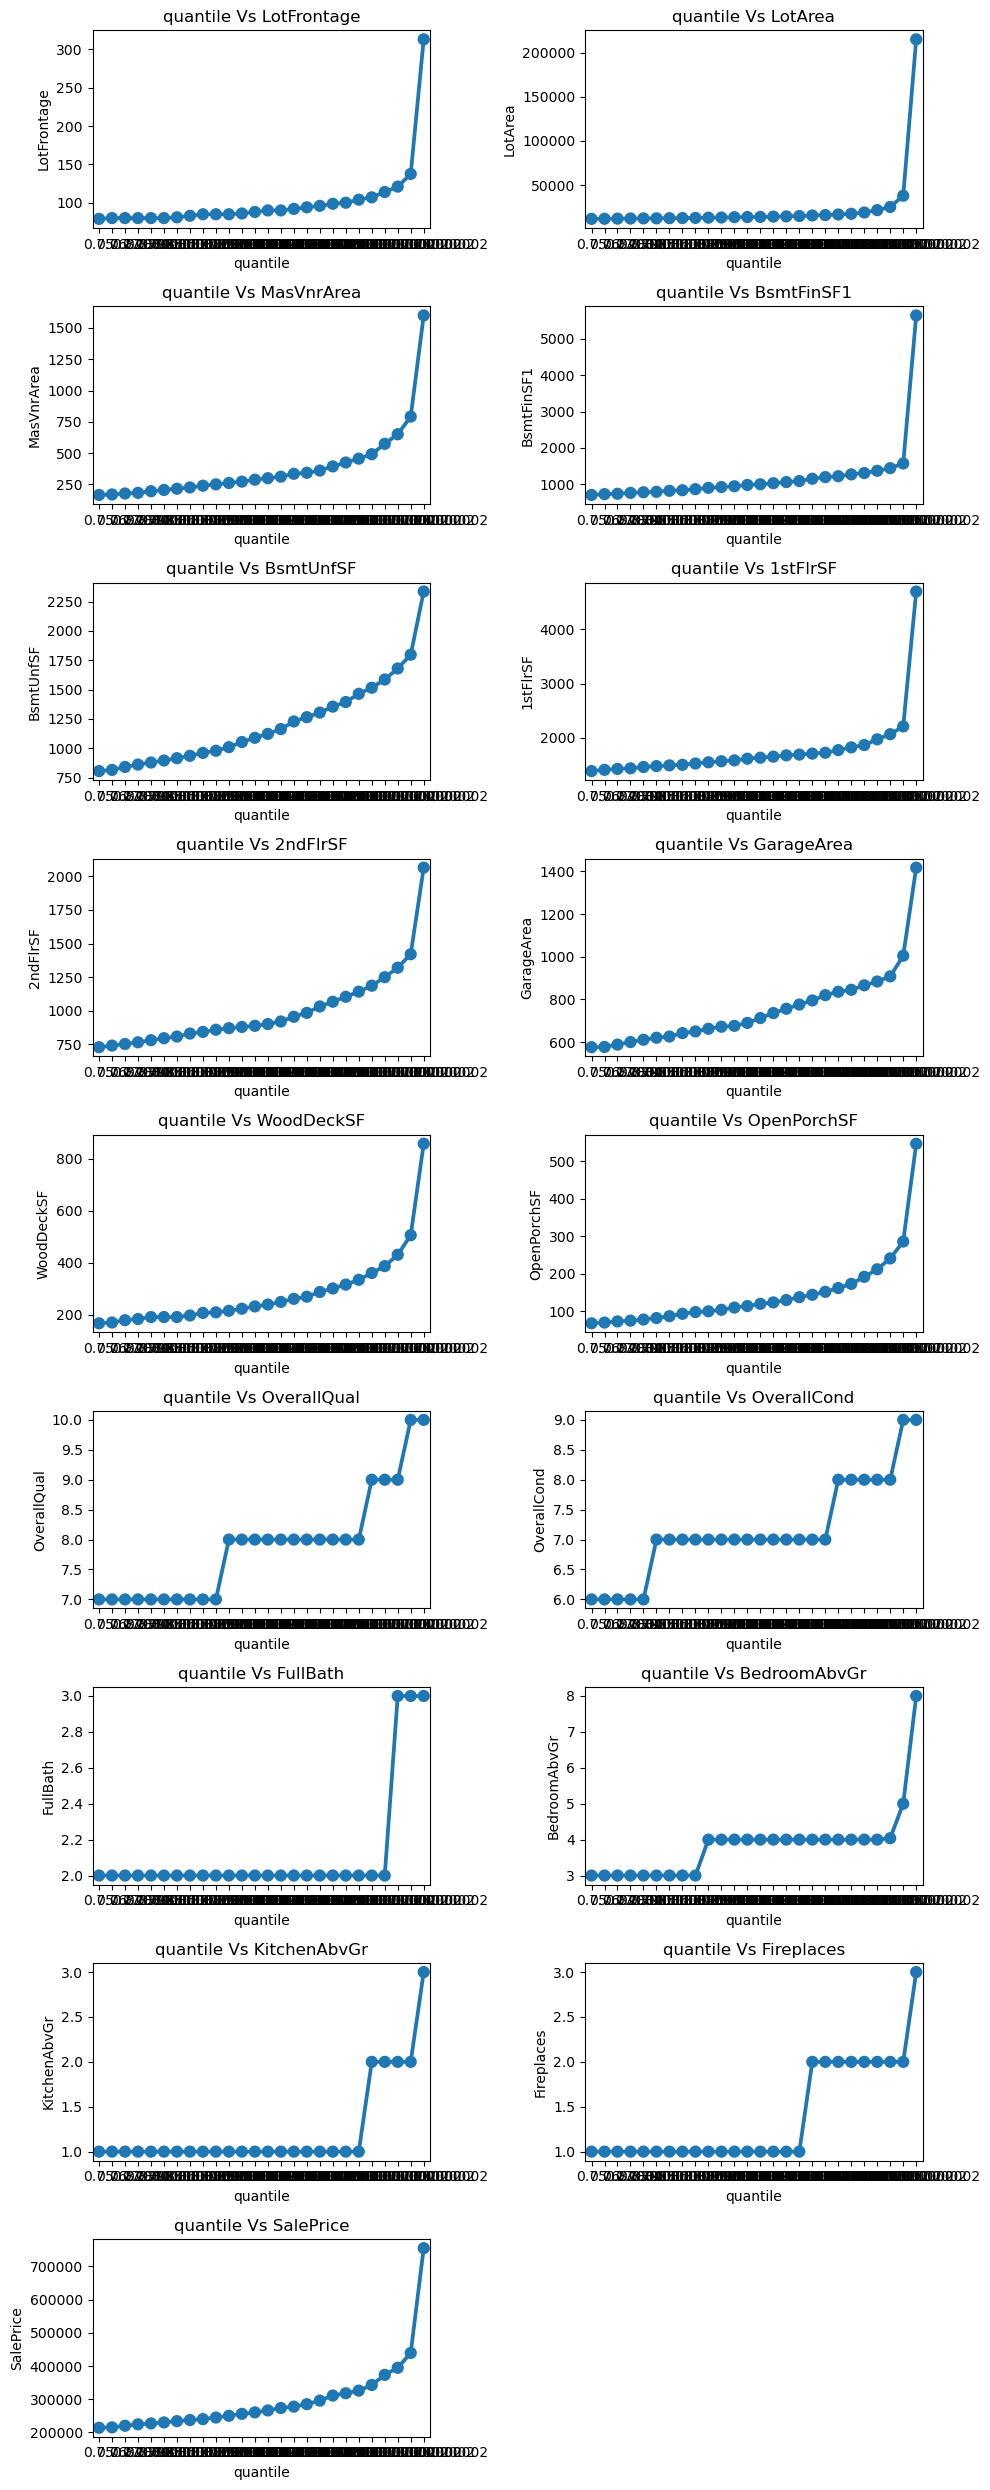

In [130]:
cols = 2
rows = np.ceil(len(numeric_cols)/cols).astype('int')
fig,ax=plt.subplots(rows,cols,figsize=(10,25))
for idx,i in enumerate(numeric_cols) : 
    idx1 = idx // cols
    idx2 = idx % cols
    sns.pointplot(data=quantile_df,x='quantile',y=i,ax=ax[idx1,idx2])
    ax[idx1,idx2].set_title(f'quantile Vs {i}')
#     ax[idx1,idx2].axhline(np.median(df['SalePrice']),color='r')
#     ax[idx1,idx2].set_yscale('log')
[fig.delaxes(i) for i in ax.flat if not i.has_data()]
plt.tight_layout()
plt.show()

In [131]:
df2 =df.copy()
# for i in numeric_cols  : 
#     df2 = df2.loc[df2[i] <= df2[i].quantile(0.99),[i]]
df2

LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0            65.0     8450            7            5       2003          2003   
1            80.0     9600            6            8       1976          1976   
2            68.0    11250            7            5       2001          2002   
3            60.0     9550            7            5       1915          1970   
4            84.0    14260            8            5       2000          2000   
...           ...      ...          ...          ...        ...           ...   
1455         62.0     7917            6            5       1999          2000   
1456         85.0    13175            6            6       1978          1988   
1457         66.0     9042            7            9       1941          2006   
1458         68.0     9717            5            6       1950          1996   
1459         75.0     9937            5            6       1965          1965   

      MasVnrArea ExterQual BsmtQual BsmtExposure  ...  NoRidge_Neighborhood  \
0          196.0         4        4            0  ...                     0   
1            0.0         3        4            3  ...                     0   
2          162.0         4        4            1  ...                     0   
3            0.0         3        3            0  ...                     0   
4          350.0         4        4            2  ...                     1   
...          ...       ...      ...          ...  ...                   ...   
1455         0.0         3        4            0  ...                     0   
1456       119.0         3        4            0  ...                     0   
1457         0.0         5        3            0  ...                     0   
1458         0.0         3        3            1  ...                     0   
1459         0.0         4        3            0  ...                     0   

      NridgHt_Neighborhood OldTown_Neighborhood  SWISU_Neighborhood  \
0                        0                    0                   0   
1                        0                    0                   0   
2                        0                    0                   0   
3                        0                    0                   0   
4                        0                    0                   0   
...                    ...                  ...                 ...   
1455                     0                    0                   0   
1456                     0                    0                   0   
1457                     0                    0                   0   
1458                     0                    0                   0   
1459                     0                    0                   0   

      SawyerW_Neighborhood  Sawyer_Neighborhood  Somerst_Neighborhood  \
0                        0                    0                     0   
1                        0                    0                     0   
2                        0                    0                     0   
3                        0                    0                     0   
4                        0                    0                     0   
...                    ...                  ...                   ...   
1455                     0                    0                     0   
1456                     0                    0                     0   
1457                     0                    0                     0   
1458                     0                    0                     0   
1459                     0                    0                     0   

      StoneBr_Neighborhood Timber_Neighborhood  Veenker_Neighborhood  
0                        0                   0                     0  
1                        0                   0                     1  
2                        0                   0                     0  
3                        0                   0                     0  

In [132]:
for i in numeric_cols  : 
    df2 = df2.loc[df2[i] <= df2[i].quantile(0.99)]

In [133]:
df2.shape

(1266, 117)

In [134]:
df = df2

## Plots data between the 0th to 25th percentiles 
- Here there is an irregular sudden increase in data between percentiles in select few features
- This behavior can be ignored as inherent fluctuations in data

In [135]:
quantile_df =df[numeric_cols].quantile(list(np.arange(0.0,0.25,0.01)) + [0.25]).reset_index().rename(columns = {'index' : 'quantile'})

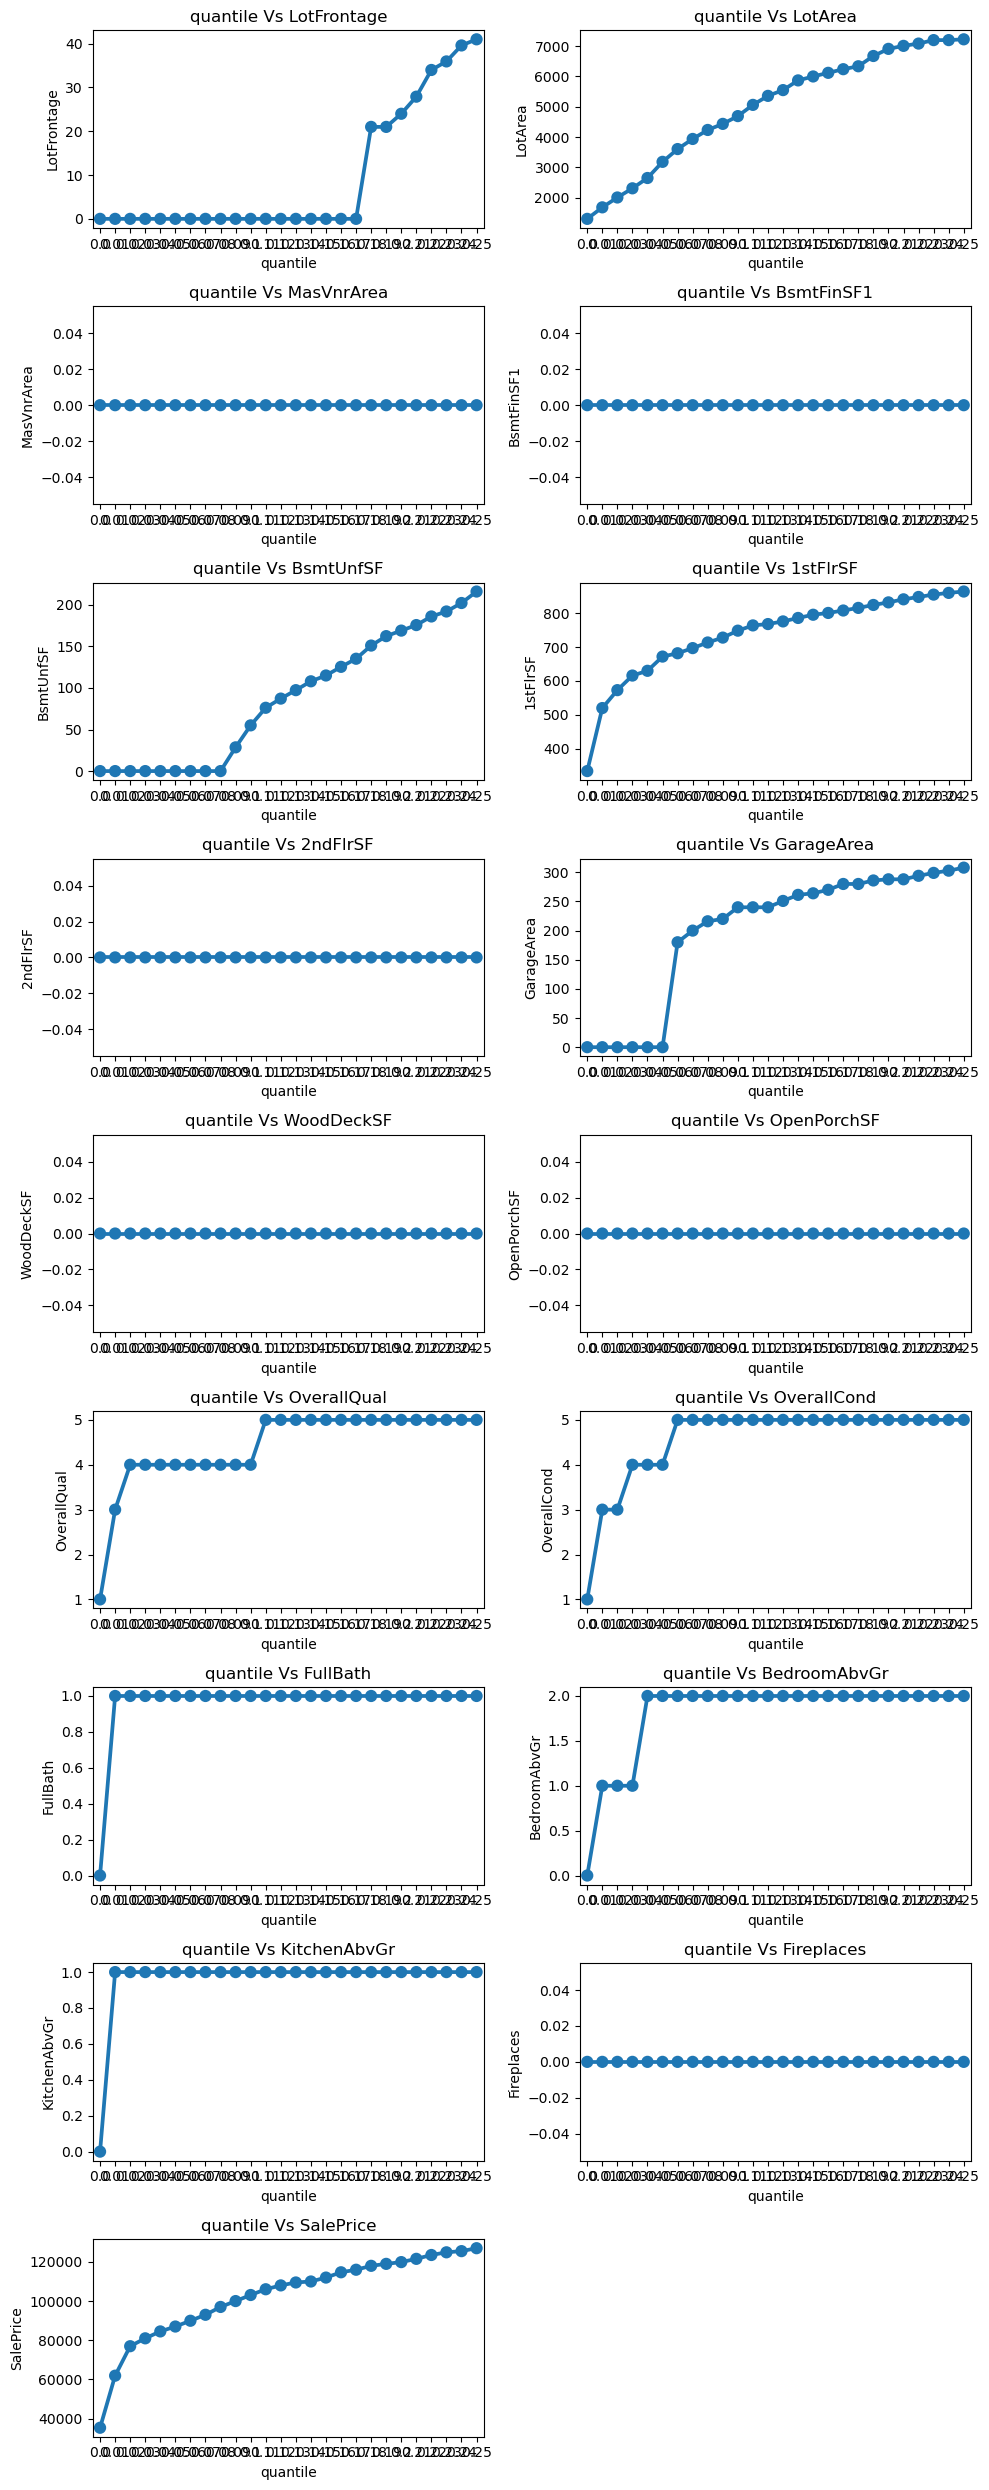

In [136]:
cols = 2
rows = np.ceil(len(numeric_cols)/cols).astype('int')
fig,ax=plt.subplots(rows,cols,figsize=(10,25))
for idx,i in enumerate(numeric_cols) : 
    idx1 = idx // cols
    idx2 = idx % cols
    sns.pointplot(data=quantile_df,x='quantile',y=i,ax=ax[idx1,idx2])
    ax[idx1,idx2].set_title(f'quantile Vs {i}')
#     ax[idx1,idx2].axhline(np.median(df['SalePrice']),color='r')
#     ax[idx1,idx2].set_yscale('log')
[fig.delaxes(i) for i in ax.flat if not i.has_data()]
plt.tight_layout()
plt.show()

In [137]:
diff_qdf = quantile_df[numeric_cols] - quantile_df[numeric_cols].shift(1)

In [138]:
diff_qdf[numeric_cols] / diff_qdf[numeric_cols].sum()

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtUnfSF  1stFlrSF  \
0           NaN       NaN         NaN         NaN        NaN       NaN   
1      0.000000  0.064121         NaN         NaN   0.000000  0.350943   
2      0.000000  0.054925         NaN         NaN   0.000000  0.099811   
3      0.000000  0.051044         NaN         NaN   0.000000  0.081321   
4      0.000000  0.057473         NaN         NaN   0.000000  0.026415   
5      0.000000  0.090006         NaN         NaN   0.000000  0.079245   
6      0.000000  0.071141         NaN         NaN   0.000000  0.018491   
7      0.000000  0.056326         NaN         NaN   0.000000  0.028679   
8      0.000000  0.050082         NaN         NaN   0.000000  0.031321   
9      0.000000  0.033883         NaN         NaN   0.132176  0.027170   
10     0.000000  0.043282         NaN         NaN   0.122454  0.038679   
11     0.000000  0.062544         NaN         NaN   0.097917  0.029245   
12     0.000000  0.050192         NaN         NaN   0.051157  0.007547   
13     0.000000  0.032078         NaN         NaN   0.046991  0.014717   
14     0.000000  0.054081         NaN         NaN   0.049306  0.019245   
15     0.000000  0.021903         NaN         NaN   0.032407  0.017925   
16     0.000000  0.020249         NaN         NaN   0.048148  0.010000   
17     0.000000  0.020249         NaN         NaN   0.045139  0.013585   
18     0.512195  0.016300         NaN         NaN   0.073380  0.014528   
19     0.000000  0.057195         NaN         NaN   0.052546  0.016321   
20     0.073171  0.039730         NaN         NaN   0.030787  0.014434   
21     0.095122  0.016663         NaN         NaN   0.030787  0.016981   
22     0.148780  0.012799         NaN         NaN   0.047917  0.013208   
23     0.047561  0.019304         NaN         NaN   0.027778  0.013113   
24     0.089024  0.000000         NaN         NaN   0.047222  0.009528   
25     0.034146  0.004429         NaN         NaN   0.063889  0.007547   

    2ndFlrSF  GarageArea  WoodDeckSF  OpenPorchSF  OverallQual  OverallCond  \
0        NaN         NaN         NaN          NaN          NaN          NaN   
1        NaN    0.000000         NaN          NaN         0.50         0.50   
2        NaN    0.000000         NaN          NaN         0.25         0.00   
3        NaN    0.000000         NaN          NaN         0.00         0.25   
4        NaN    0.000000         NaN          NaN         0.00         0.00   
5        NaN    0.000000         NaN          NaN         0.00         0.00   
6        NaN    0.584416         NaN          NaN         0.00         0.25   
7        NaN    0.064935         NaN          NaN         0.00         0.00   
8        NaN    0.051948         NaN          NaN         0.00         0.00   
9        NaN    0.012987         NaN          NaN         0.00         0.00   
10       NaN    0.064935         NaN          NaN         0.00         0.00   
11       NaN    0.000000         NaN          NaN         0.25         0.00   
12       NaN    0.000000         NaN          NaN         0.00         0.00   
13       NaN    0.035390         NaN          NaN         0.00         0.00   
14       NaN    0.033766         NaN          NaN         0.00         0.00   
15       NaN    0.008766         NaN          NaN         0.00         0.00   
16       NaN    0.019481         NaN          NaN         0.00         0.00   
17       NaN    0.032468         NaN          NaN         0.00         0.00   
18       NaN    0.000000         NaN          NaN         0.00         0.00   
19       NaN    0.019481         NaN          NaN         0.00         0.00   
20       NaN    0.006494         NaN          NaN         0.00         0.00   
21       NaN    0.000000         NaN          NaN         0.00         0.00   
22       NaN    0.019481         NaN          NaN         0.00         0.00   
23       NaN    0.016234         NaN          NaN         0.00         0.00   
24       NaN    0.012338      

In [139]:
df2 = df.copy()

In [140]:
df

LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0            65.0     8450            7            5       2003          2003   
1            80.0     9600            6            8       1976          1976   
2            68.0    11250            7            5       2001          2002   
3            60.0     9550            7            5       1915          1970   
4            84.0    14260            8            5       2000          2000   
...           ...      ...          ...          ...        ...           ...   
1453         90.0    17217            5            5       2006          2006   
1454         62.0     7500            7            5       2004          2005   
1455         62.0     7917            6            5       1999          2000   
1457         66.0     9042            7            9       1941          2006   
1458         68.0     9717            5            6       1950          1996   

      MasVnrArea ExterQual BsmtQual BsmtExposure  ...  NoRidge_Neighborhood  \
0          196.0         4        4            0  ...                     0   
1            0.0         3        4            3  ...                     0   
2          162.0         4        4            1  ...                     0   
3            0.0         3        3            0  ...                     0   
4          350.0         4        4            2  ...                     1   
...          ...       ...      ...          ...  ...                   ...   
1453         0.0         3        4            0  ...                     0   
1454         0.0         4        4            0  ...                     0   
1455         0.0         3        4            0  ...                     0   
1457         0.0         5        3            0  ...                     0   
1458         0.0         3        3            1  ...                     0   

      NridgHt_Neighborhood OldTown_Neighborhood  SWISU_Neighborhood  \
0                        0                    0                   0   
1                        0                    0                   0   
2                        0                    0                   0   
3                        0                    0                   0   
4                        0                    0                   0   
...                    ...                  ...                 ...   
1453                     0                    0                   0   
1454                     0                    0                   0   
1455                     0                    0                   0   
1457                     0                    0                   0   
1458                     0                    0                   0   

      SawyerW_Neighborhood  Sawyer_Neighborhood  Somerst_Neighborhood  \
0                        0                    0                     0   
1                        0                    0                     0   
2                        0                    0                     0   
3                        0                    0                     0   
4                        0                    0                     0   
...                    ...                  ...                   ...   
1453                     0                    0                     0   
1454                     0                    0                     1   
1455                     0                    0                     0   
1457                     0                    0                     0   
1458                     0                    0                     0   

      StoneBr_Neighborhood Timber_Neighborhood  Veenker_Neighborhood  
0                        0                   0                     0  
1                        0                   0                     1  
2                        0                   0                     0  
3                        0                   0                     0  

In [141]:
df2 = df2.T.drop_duplicates().T

In [142]:
np.setdiff1d(df.columns,df2.columns)

array([], dtype=object)

In [143]:
df.T.duplicated(keep=False)[df.T.duplicated(keep=False)]

Series([], dtype: bool)

In [144]:
yr_cols = ['YrSold','YearBuilt','YearRemodAdd']

In [145]:
df[yr_cols[1:]].corr()

YearBuilt  YearRemodAdd
YearBuilt      1.000000      0.586302
YearRemodAdd   0.586302      1.000000

In [146]:
df['rennovation'] = np.where(df['YearBuilt'] == df['YearRemodAdd'],df['YearBuilt'],df['YearRemodAdd'])
df['rennovated?'] = np.where(df['YearBuilt'] == df['YearRemodAdd'],0,1)
df['age'] = df['YrSold'] - df['rennovation']

<Axes: xlabel='age'>

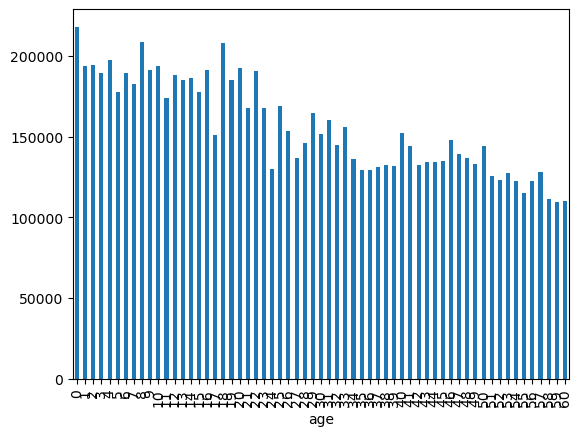

In [147]:
df.groupby(['age'])['SalePrice'].mean().plot(kind='bar')

In [148]:
age_price = df.groupby(['age','rennovated?'])['SalePrice'].mean().reset_index()
age_price


age  rennovated?      SalePrice
0      0            0  229299.790698
1      0            1  205050.763158
2      1            0  208940.435897
3      1            1  171885.285714
4      2            0  194205.000000
..   ...          ...            ...
102   58            0  112858.600000
103   58            1  111140.000000
104   59            0   94966.666667
105   59            1  110685.294118
106   60            1  110387.555556

[107 rows x 3 columns]

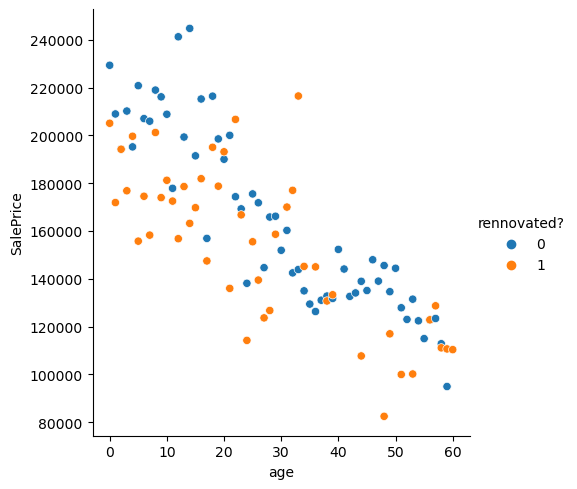

In [149]:
sns.relplot(data=age_price,x='age',y='SalePrice',hue='rennovated?',kind='scatter')

In [150]:
df = df.drop(columns= yr_cols + ['rennovation'])


In [151]:
df2 = df.copy()

## Model Training 

In [152]:
y = df2.pop('SalePrice')
X = df2.copy()

In [153]:
numeric_cols.remove('SalePrice')

In [154]:
numeric_cols = numeric_cols +['age','rennovated?']

In [155]:
df[numeric_cols]

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtUnfSF  1stFlrSF  \
0            65.0     8450       196.0         706        150       856   
1            80.0     9600         0.0         978        284      1262   
2            68.0    11250       162.0         486        434       920   
3            60.0     9550         0.0         216        540       961   
4            84.0    14260       350.0         655        490      1145   
...           ...      ...         ...         ...        ...       ...   
1453         90.0    17217         0.0           0       1140      1140   
1454         62.0     7500         0.0         410        811      1221   
1455         62.0     7917         0.0           0        953       953   
1457         66.0     9042         0.0         275        877      1188   
1458         68.0     9717         0.0          49          0      1078   

      2ndFlrSF  GarageArea  WoodDeckSF  OpenPorchSF  OverallQual  OverallCond  \
0          854         548           0           61            7            5   
1            0         460         298            0            6            8   
2          866         608           0           42            7            5   
3          756         642           0           35            7            5   
4         1053         836         192           84            8            5   
...        ...         ...         ...          ...          ...          ...   
1453         0           0          36           56            5            5   
1454         0         400           0          113            7            5   
1455       694         460           0           40            6            5   
1457      1152         252           0           60            7            9   
1458         0         240         366            0            5            6   

      FullBath  BedroomAbvGr  KitchenAbvGr  Fireplaces  age  rennovated?  
0            2             3             1           0    5            0  
1            2             3             1           1   31            0  
2            2             3             1           1    6            1  
3            1             3             1           1   36            1  
4            2             4             1           1    8            0  
...        ...           ...           ...         ...  ...          ...  
1453         1             3             1           0    0            0  
1454         2             2             1           0    4            1  
1455         2             3             1           1    7            1  
1457         2             4             1           2    4            1  
1458         1             2             1           0   14            1  

[1266 rows x 18 columns]

In [156]:
X_train,X_test,y_train,y_test  = train_test_split(X,y,train_size=0.7, random_state=100)

In [157]:

scaler = MinMaxScaler()
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
X_train2 = scaler.fit_transform(X_train[numeric_cols])
X_test2 = scaler.transform(X_test[numeric_cols])
X_train2 = pd.DataFrame(X_train2,columns=numeric_cols)
X_test2 = pd.DataFrame(X_test2,columns=numeric_cols)
X_train = X_train.drop(columns = numeric_cols)
X_test = X_test.drop(columns = numeric_cols)
X_train = pd.concat([X_train,X_train2],axis=1)
X_test = pd.concat([X_test,X_test2],axis=1)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)


In [158]:
# df2[numeric_cols]

In [159]:
def train_model(X_train,y_train,X_test,y_test) : 
    estimator  = linear_model.LinearRegression()
    estimator.fit(X_train,y_train)
    y_pred = estimator.predict(X_test)
    r2  =  r2_score(y_pred,y_test)
    return 1 - ((1-r2) * (X_train.shape[0]-1) / (X_train.shape[0] - 1 - X_train.shape[1]))
def backward_method(X_train,y_train,X_test,y_test,n) : 
    while(len(X_train.columns) > n) : 
        r2_scores  = []
        cols = X_train.columns
        for i in cols : 
            X_trainc = X_train.copy()
            X_testc = X_test.copy()
            X_trainc = X_train[X_trainc.columns[~X_trainc.columns.str.contains(i)]]
            X_testc = X_testc[X_testc.columns[~X_testc.columns.str.contains(i)]]
            r2_scores.append(train_model(X_trainc,y_train,X_testc,y_test))
        idx = r2_scores.index(max(r2_scores))
        X_train = X_train.drop(columns =cols[idx])
        X_test = X_test.drop(columns =cols[idx])
    return X_train,X_test

In [160]:
X_train,X_test = backward_method(X_train.copy(),y_train.copy(),X_test.copy(),y_test.copy(),50)

In [161]:
X_train.shape

(886, 50)

# Linear Regression

In [162]:
lr = linear_model.LinearRegression()


In [163]:
lr.fit(X_train,y_train)

LinearRegression()

In [164]:
y_pred = lr.predict(X_train)
print(f"R2 Score of MLR Training - {round(r2_score(y_train,y_pred),4)}")

R2 Score of MLR Training - 0.9053


In [165]:
y_pred = lr.predict(X_test)
print(f"R2 Score of MLR Testing - {round(r2_score(y_test,y_pred),4)}")

R2 Score of MLR Testing - 0.9019


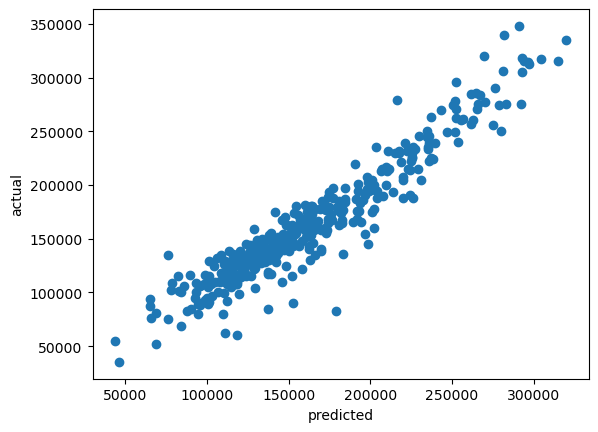

In [166]:
plt.scatter(y_pred,y_test)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [167]:
lr.intercept_

-62656.73963880839

In [168]:
lr.coef_

array([  8097.10207492,   2833.50524693,    888.71944279,   6918.32114931,
         2619.0478665 ,  20929.45670071,  -1910.21136887,  15328.42738431,
        -3366.95805817,   4125.56892683,   8031.66633977,   7674.60074249,
        -6571.96272379,  13590.10400993,   4384.54779576,   6822.11809895,
        22706.84678619,  10156.61131738,  10765.57102217,   6397.75056656,
         6651.29682823,   7376.95315334,  -8810.06165776,  -8253.16528049,
       -13872.78006953,  17163.24184724, -13627.41921628, -14923.88563444,
       -14133.08571012, -14197.17841787, -15185.72429251, -19297.82527039,
        12069.27573204, -15911.06083847, -14270.63451563, -13866.122598  ,
        15571.56888289,  35118.92900973,  13681.80829862,  25040.37776504,
         9250.18508165,  86138.04263012,  59760.86271979,  23725.93587385,
         8562.58557218,   7408.46033462,  86447.12372844,  26358.17274544,
         4690.22107355,  -6613.08628286])

# Lasso Regression

In [169]:
la = linear_model.Lasso()

In [170]:
from sklearn.metrics import get_scorer_names
get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [171]:
folds = KFold(n_splits=5,shuffle=True,random_state=100)
parameters  = {'alpha' : [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}
crval_la = GridSearchCV(estimator=la,scoring='neg_mean_squared_error',
             cv=folds,param_grid = parameters,return_train_score=True)

In [172]:
crval_la.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [173]:
crval_la.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_squared_error')>

In [174]:
crval_la.best_params_

{'alpha': 20}

In [175]:
cr_val_res = pd.DataFrame(crval_la.cv_results_)

In [176]:
crval_gr = cr_val_res[['param_alpha','mean_test_score','mean_train_score']]

In [177]:
round(crval_gr,2)

param_alpha  mean_test_score  mean_train_score
0       0.0001    -3.617231e+08     -3.021054e+08
1        0.001    -3.617229e+08     -3.021054e+08
2         0.01    -3.617214e+08     -3.021054e+08
3          0.1    -3.617058e+08     -3.021055e+08
4          0.2    -3.616887e+08     -3.021056e+08
5          0.3    -3.616717e+08     -3.021058e+08
6          0.4    -3.616549e+08     -3.021062e+08
7          0.5    -3.616383e+08     -3.021066e+08
8          0.6    -3.616219e+08     -3.021071e+08
9          0.7    -3.616057e+08     -3.021077e+08
10         0.8    -3.615896e+08     -3.021084e+08
11         0.9    -3.615737e+08     -3.021091e+08
12         1.0    -3.615580e+08     -3.021100e+08
13         2.0    -3.614822e+08     -3.021218e+08
14         3.0    -3.614230e+08     -3.021412e+08
15         4.0    -3.613735e+08     -3.021683e+08
16         5.0    -3.613333e+08     -3.022031e+08
17         6.0    -3.613027e+08     -3.022456e+08
18         7.0    -3.612815e+08     -3.022957e+08
19         8.0    -3.612697e+08     -3.023536e+08
20         9.0    -3.612634e+08     -3.024184e+08
21        10.0    -3.612551e+08     -3.024870e+08
22          20    -3.611337e+08     -3.033625e+08
23          50    -3.624861e+08     -3.083296e+08
24         100    -3.721791e+08     -3.209525e+08
25         500    -4.509204e+08     -4.123847e+08
26        1000    -5.543570e+08     -5.152077e+08

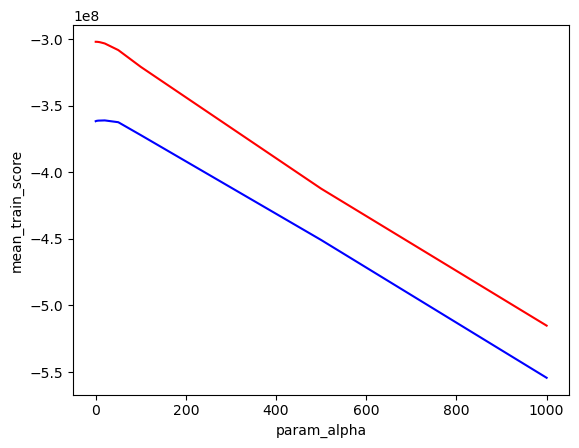

In [178]:
sns.lineplot(data=crval_gr,x='param_alpha',y='mean_train_score',color='r')
sns.lineplot(data=crval_gr,x='param_alpha',y='mean_test_score',color='b')
plt.show()

In [179]:
la= linear_model.Lasso(alpha=20)
la.fit(X_train,y_train)
y_pred_train = la.predict(X_train)
r2_score(y_train,y_pred_train)
print(f"R2 Score of Lasso Training - {round(r2_score(y_train,y_pred_train),4)}")

R2 Score of Lasso Training - 0.9049


In [180]:
y_pred = la.predict(X_test)
r2_score(y_test,y_pred)
print(f"R2 Score of Lasso Testing - {round(r2_score(y_test,y_pred),4)}")

R2 Score of Lasso Testing - 0.8994


In [181]:
la.coef_

array([  8014.73081625,   2796.99809595,   1012.83363068,   7433.98551299,
         2556.205528  ,  17848.69118822,  -1693.39676983,  14580.54381682,
        -3261.95414166,   3039.62539888,   7373.19202416,   6508.13110341,
        -5532.08153596,  12928.11119469,   3121.94845889,   5690.67323875,
        22098.85054191,   7585.68637502,   7476.98775107,      0.        ,
            0.        ,    902.86408856,  -5595.54330223,  -4576.6107573 ,
       -12466.1820365 ,  17758.37690301, -11925.14806572, -13281.97709278,
       -12099.58683674, -11861.09753264, -13354.43668366, -17120.20926437,
        12094.44822259, -14708.53261661, -12578.3409808 , -12222.67513803,
        14278.28098939,  32783.91525109,  12389.67343253,  23394.24313454,
         6754.9163881 ,  88077.39525997,  57657.20759851,  24068.5716395 ,
         8324.2355605 ,   7297.36045309,  86650.25680999,  24882.07616069,
         5111.97337633,  -6122.83866731])

In [182]:
lasso_coef = dict(zip(X_train.columns,la.coef_))
abs(pd.Series(lasso_coef)).sort_values(ascending=False)

1stFlrSF                    88077.395260
OverallQual                 86650.256810
2ndFlrSF                    57657.207599
LotArea                     32783.915251
OverallCond                 24882.076161
GarageArea                  24068.571639
BsmtFinSF1                  23394.243135
60_MSSubClass               22098.850542
No Basement_BsmtFinType1    17848.691188
Crawfor_Neighborhood        17758.376903
NWAmes_Neighborhood         17120.209264
OldTown_Neighborhood        14708.532617
BrkFace_Exterior1st         14580.543817
StoneBr_Neighborhood        14278.280989
NAmes_Neighborhood          13354.436684
Gilbert_Neighborhood        13281.977093
20_MSSubClass               12928.111195
SawyerW_Neighborhood        12578.340981
CollgCr_Neighborhood        12466.182036
MasVnrArea                  12389.673433
Sawyer_Neighborhood         12222.675138
IDOTRR_Neighborhood         12099.586837
NridgHt_Neighborhood        12094.448223
Edwards_Neighborhood        11925.148066
Mitchel_Neighbor

In [183]:
residuals = y_train - y_pred_train

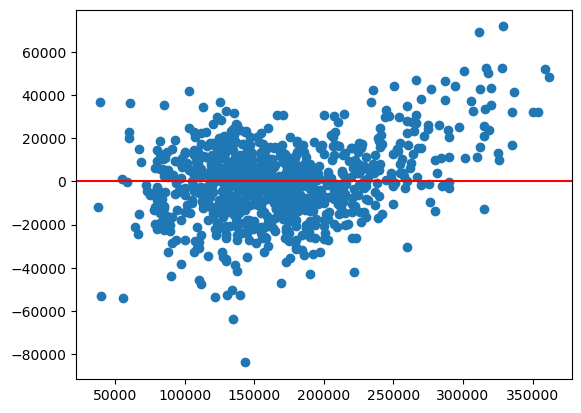

In [184]:
plt.scatter(y_train,residuals)
plt.axhline(np.mean(residuals),color='r')
plt.show()

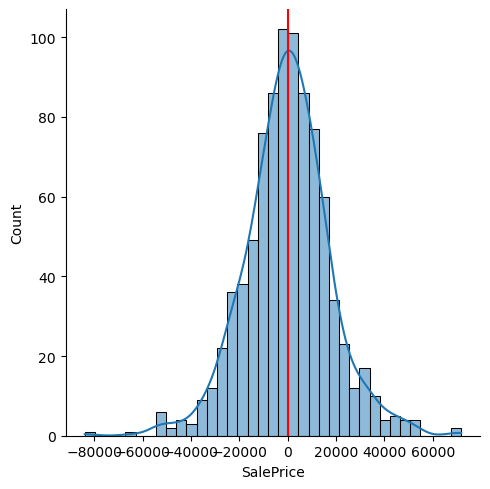

In [185]:
sns.displot(data=residuals,kde=True)
plt.axvline(residuals.mean(),color='r')
plt.show()

In [186]:
# infestimally close to zero
round(residuals.mean(),10)

0.0

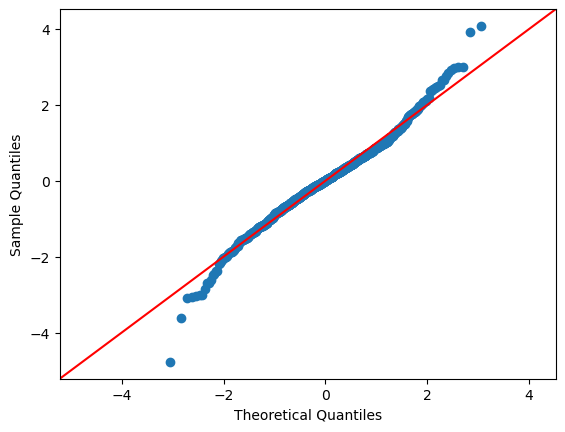

In [187]:
def plot_qq(res) : 
    qqplot(res,line='45',fit=True,dist=stats.norm)
    plt.show()
plot_qq(residuals)

#### testing residuals lasso

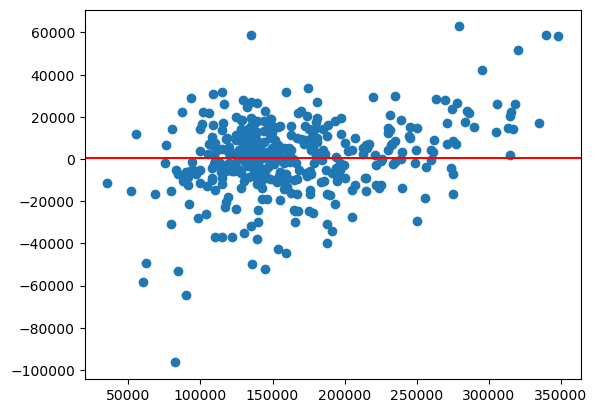

In [188]:
residuals = y_test - y_pred
plt.scatter(y_test,residuals)
plt.axhline(np.mean(residuals),color='r')
plt.show()

# Ridge Regression

In [189]:
rg = linear_model.Ridge()

folds = KFold(n_splits=5,shuffle=True,random_state=100)
parameters  = {'alpha' : [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}
crval_la = GridSearchCV(estimator=rg,scoring='neg_mean_squared_error',
             cv=folds,param_grid = parameters,return_train_score=True)

crval_la.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [190]:
crval_la.best_params_

{'alpha': 0.3}

In [191]:
cr_val_res = pd.DataFrame(crval_la.cv_results_)

crval_gr = cr_val_res[['param_alpha','mean_test_score','mean_train_score']]

round(crval_gr,2)

param_alpha  mean_test_score  mean_train_score
0       0.0001    -3.617228e+08     -3.021054e+08
1        0.001    -3.617201e+08     -3.021054e+08
2         0.01    -3.616936e+08     -3.021058e+08
3          0.1    -3.614788e+08     -3.021389e+08
4          0.2    -3.613355e+08     -3.022349e+08
5          0.3    -3.612801e+08     -3.023876e+08
6          0.4    -3.613025e+08     -3.025921e+08
7          0.5    -3.613946e+08     -3.028440e+08
8          0.6    -3.615497e+08     -3.031394e+08
9          0.7    -3.617619e+08     -3.034749e+08
10         0.8    -3.620262e+08     -3.038474e+08
11         0.9    -3.623382e+08     -3.042541e+08
12         1.0    -3.626941e+08     -3.046924e+08
13         2.0    -3.680322e+08     -3.103902e+08
14         3.0    -3.753378e+08     -3.175801e+08
15         4.0    -3.835942e+08     -3.255158e+08
16         5.0    -3.922965e+08     -3.338130e+08
17         6.0    -4.011743e+08     -3.422601e+08
18         7.0    -4.100761e+08     -3.507350e+08
19         8.0    -4.189144e+08     -3.591653e+08
20         9.0    -4.276385e+08     -3.675074e+08
21        10.0    -4.362191e+08     -3.757348e+08
22          20    -5.130082e+08     -4.503902e+08
23          50    -6.752395e+08     -6.126184e+08
24         100    -8.443894e+08     -7.854192e+08
25         500    -1.377826e+09     -1.337275e+09
26        1000    -1.702959e+09     -1.670805e+09

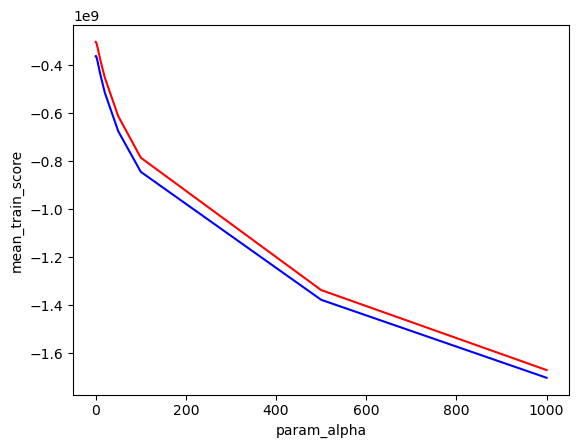

In [192]:
sns.lineplot(data=crval_gr,x='param_alpha',y='mean_train_score',color='r')
sns.lineplot(data=crval_gr,x='param_alpha',y='mean_test_score',color='b')
plt.show()

In [193]:
la= linear_model.Ridge(alpha=0.3)
la.fit(X_train,y_train)
y_pred_train = la.predict(X_train)
r2_score(y_train,y_pred_train)
print(f"R2 Score of Ridge Training - {round(r2_score(y_train,y_pred_train),2)}")

R2 Score of Ridge Training - 0.91


In [194]:
y_pred = la.predict(X_test)
r2_score(y_test,y_pred)
print(f"R2 Score of Ridge Testing - {round(r2_score(y_test,y_pred),2)}")

R2 Score of Ridge Testing - 0.9


In [195]:
lasso_coef = dict(zip(X_train.columns,la.coef_))
abs(pd.Series(lasso_coef)).sort_values(ascending=False)

1stFlrSF                    84566.153377
OverallQual                 83832.213125
2ndFlrSF                    58654.231171
LotArea                     34500.214408
OverallCond                 25685.434476
BsmtFinSF1                  25334.953133
GarageArea                  24253.592286
60_MSSubClass               22654.744455
No Basement_BsmtFinType1    20577.967067
NWAmes_Neighborhood         18597.088906
Crawfor_Neighborhood        17528.540229
StoneBr_Neighborhood        15724.119942
OldTown_Neighborhood        15677.462324
BrkFace_Exterior1st         15385.498457
NAmes_Neighborhood          14788.207478
Gilbert_Neighborhood        14723.669060
IDOTRR_Neighborhood         13794.774109
SawyerW_Neighborhood        13791.195546
Mitchel_Neighborhood        13736.957104
MasVnrArea                  13722.067692
CollgCr_Neighborhood        13636.314678
Sawyer_Neighborhood         13484.522723
20_MSSubClass               13427.289041
Edwards_Neighborhood        13346.585475
NridgHt_Neighbor

In [196]:
residuals = y_train - y_pred_train

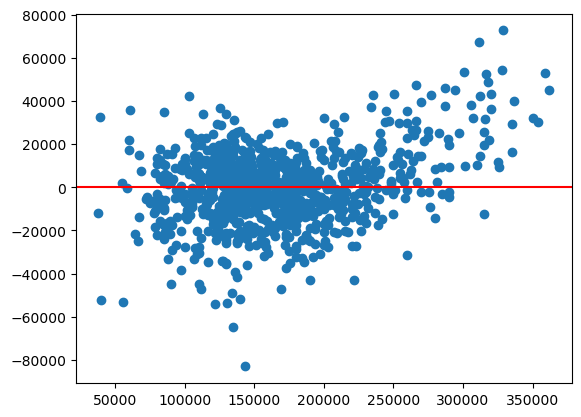

In [197]:
plt.scatter(y_train,residuals)
plt.axhline(np.mean(residuals),color='r')
plt.show()

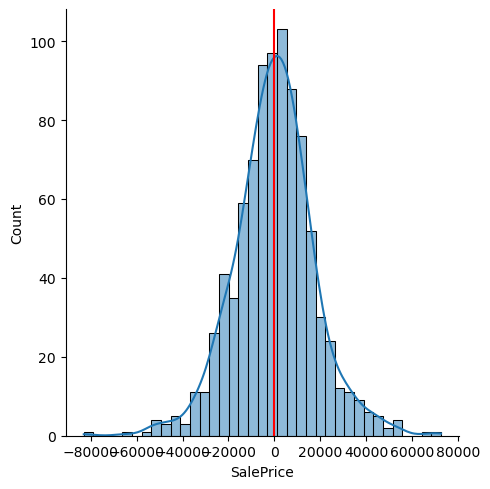

In [198]:
sns.displot(data=residuals,kde=True)
plt.axvline(residuals.mean(),color='r')
plt.show()

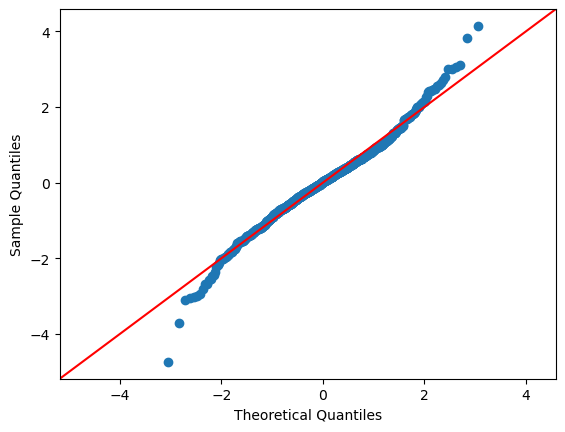

In [199]:
def plot_qq(res) : 
    qqplot(res,line='45',fit=True,dist=stats.norm)
    plt.show()
plot_qq(residuals)

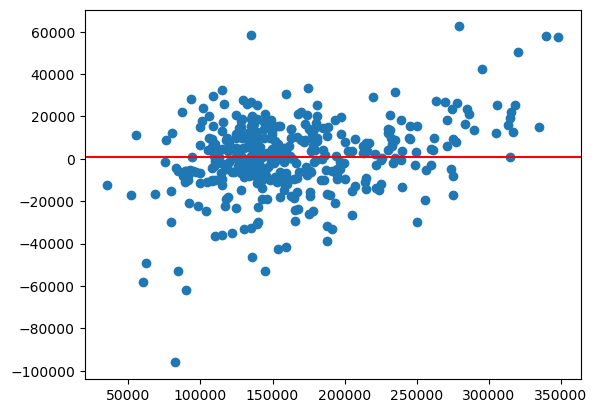

In [200]:
residuals = y_test - y_pred
plt.scatter(y_test,residuals)
plt.axhline(np.mean(residuals),color='r')
plt.show()

# Conclusions
## It can seen that '1stFlrSF', 'OverallQual', '2ndFlrSF', 'LotArea', 'OverallCond' are the 5 most import features in predicting sales price , this is true for both ridge and lasso regressions making them all the more trustworthy

# Question-1
## Lasso : 20
## Ridge : 0.3


In [201]:
la= linear_model.Lasso(alpha=20)
la.fit(X_train,y_train)
y_pred_train = la.predict(X_train)
r2_score(y_train,y_pred_train)
print(f"R2 Score of Lasso Training - {round(r2_score(y_train,y_pred_train),4)}")
y_pred = la.predict(X_test)
r2_score(y_test,y_pred)
print(f"R2 Score of Lasso Testing - {round(r2_score(y_test,y_pred),2)}")
lasso_coef = dict(zip(X_train.columns,la.coef_))
print(abs(pd.Series(lasso_coef)).sort_values(ascending=False).head(10).index)
abs(pd.Series(lasso_coef)).sort_values(ascending=False).head(10)

R2 Score of Lasso Training - 0.9049
R2 Score of Lasso Testing - 0.9
Index(['1stFlrSF', 'OverallQual', '2ndFlrSF', 'LotArea', 'OverallCond',
       'GarageArea', 'BsmtFinSF1', '60_MSSubClass', 'No Basement_BsmtFinType1',
       'Crawfor_Neighborhood'],
      dtype='object')


1stFlrSF                    88077.395260
OverallQual                 86650.256810
2ndFlrSF                    57657.207599
LotArea                     32783.915251
OverallCond                 24882.076161
GarageArea                  24068.571639
BsmtFinSF1                  23394.243135
60_MSSubClass               22098.850542
No Basement_BsmtFinType1    17848.691188
Crawfor_Neighborhood        17758.376903
dtype: float64

In [202]:
la= linear_model.Lasso(alpha=40)
la.fit(X_train,y_train)
y_pred_train = la.predict(X_train)
r2_score(y_train,y_pred_train)
print(f"R2 Score of Lasso Training - {round(r2_score(y_train,y_pred_train),4)}")
y_pred = la.predict(X_test)
r2_score(y_test,y_pred)
print(f"R2 Score of Lasso Testing - {round(r2_score(y_test,y_pred),2)}")
lasso_coef = dict(zip(X_train.columns,la.coef_))
print(abs(pd.Series(lasso_coef)).sort_values(ascending=False).head(10).index)
abs(pd.Series(lasso_coef)).sort_values(ascending=False).head(10)

R2 Score of Lasso Training - 0.9039
R2 Score of Lasso Testing - 0.9
Index(['1stFlrSF', 'OverallQual', '2ndFlrSF', 'LotArea', 'GarageArea',
       'OverallCond', '60_MSSubClass', 'BsmtFinSF1', 'Crawfor_Neighborhood',
       'NWAmes_Neighborhood'],
      dtype='object')


1stFlrSF                90230.994607
OverallQual             86778.341950
2ndFlrSF                55414.518474
LotArea                 30445.577510
GarageArea              24423.517292
OverallCond             23153.409791
60_MSSubClass           21534.445627
BsmtFinSF1              21467.585436
Crawfor_Neighborhood    18353.049865
NWAmes_Neighborhood     14958.341562
dtype: float64

In [203]:
la= linear_model.Ridge(alpha=0.3)
la.fit(X_train,y_train)
y_pred_train = la.predict(X_train)
r2_score(y_train,y_pred_train)
print(f"R2 Score of Ridge Training - {round(r2_score(y_train,y_pred_train),2)}")
y_pred = la.predict(X_test)
r2_score(y_test,y_pred)
print(f"R2 Score of Ridge Testing - {round(r2_score(y_test,y_pred),2)}")
lasso_coef = dict(zip(X_train.columns,la.coef_))
print(abs(pd.Series(lasso_coef)).sort_values(ascending=False).head(10).index)
abs(pd.Series(lasso_coef)).sort_values(ascending=False).head(10)

R2 Score of Ridge Training - 0.91
R2 Score of Ridge Testing - 0.9
Index(['1stFlrSF', 'OverallQual', '2ndFlrSF', 'LotArea', 'OverallCond',
       'BsmtFinSF1', 'GarageArea', '60_MSSubClass', 'No Basement_BsmtFinType1',
       'NWAmes_Neighborhood'],
      dtype='object')


1stFlrSF                    84566.153377
OverallQual                 83832.213125
2ndFlrSF                    58654.231171
LotArea                     34500.214408
OverallCond                 25685.434476
BsmtFinSF1                  25334.953133
GarageArea                  24253.592286
60_MSSubClass               22654.744455
No Basement_BsmtFinType1    20577.967067
NWAmes_Neighborhood         18597.088906
dtype: float64

In [204]:
la= linear_model.Ridge(alpha=0.6)
la.fit(X_train,y_train)
y_pred_train = la.predict(X_train)
r2_score(y_train,y_pred_train)
print(f"R2 Score of Ridge Training - {round(r2_score(y_train,y_pred_train),2)}")
y_pred = la.predict(X_test)
r2_score(y_test,y_pred)
print(f"R2 Score of Ridge Testing - {round(r2_score(y_test,y_pred),2)}")
lasso_coef = dict(zip(X_train.columns,la.coef_))
print(abs(pd.Series(lasso_coef)).sort_values(ascending=False).head(10).index)
abs(pd.Series(lasso_coef)).sort_values(ascending=False).head(10)

R2 Score of Ridge Training - 0.91
R2 Score of Ridge Testing - 0.9
Index(['1stFlrSF', 'OverallQual', '2ndFlrSF', 'LotArea', 'BsmtFinSF1',
       'OverallCond', 'GarageArea', '60_MSSubClass',
       'No Basement_BsmtFinType1', 'NWAmes_Neighborhood'],
      dtype='object')


1stFlrSF                    83102.032463
OverallQual                 81417.002249
2ndFlrSF                    57612.030653
LotArea                     33924.073525
BsmtFinSF1                  25547.451168
OverallCond                 25030.103629
GarageArea                  24728.576938
60_MSSubClass               22606.041182
No Basement_BsmtFinType1    20187.751263
NWAmes_Neighborhood         17943.833023
dtype: float64

# Question-3

In [205]:
X2  = X.copy()
X2= X2.drop(columns=['1stFlrSF', 'OverallQual', '2ndFlrSF', 'LotArea', 'OverallCond'])
numeric_cols = np.setdiff1d(numeric_cols,['1stFlrSF', 'OverallQual', '2ndFlrSF', 'LotArea', 'OverallCond'])
y2 = y 
X_train,X_test,y_train,y_test  = train_test_split(X2,y,train_size=0.7, random_state=100)

In [206]:

scaler = MinMaxScaler()
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
X_train2 = scaler.fit_transform(X_train[numeric_cols])
X_test2 = scaler.transform(X_test[numeric_cols])
X_train2 = pd.DataFrame(X_train2,columns=numeric_cols)
X_test2 = pd.DataFrame(X_test2,columns=numeric_cols)
X_train = X_train.drop(columns = numeric_cols)
X_test = X_test.drop(columns = numeric_cols)
X_train = pd.concat([X_train,X_train2],axis=1)
X_test = pd.concat([X_test,X_test2],axis=1)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
def train_model(X_train,y_train,X_test,y_test) : 
    estimator  = linear_model.LinearRegression()
    estimator.fit(X_train,y_train)
    y_pred = estimator.predict(X_test)
    r2  =  r2_score(y_pred,y_test)
    return 1 - ((1-r2) * (X_train.shape[0]-1) / (X_train.shape[0] - 1 - X_train.shape[1]))
def backward_method(X_train,y_train,X_test,y_test,n) : 
    while(len(X_train.columns) > n) : 
        r2_scores  = []
        cols = X_train.columns
        for i in cols : 
            X_trainc = X_train.copy()
            X_testc = X_test.copy()
            X_trainc = X_train[X_trainc.columns[~X_trainc.columns.str.contains(i)]]
            X_testc = X_testc[X_testc.columns[~X_testc.columns.str.contains(i)]]
            r2_scores.append(train_model(X_trainc,y_train,X_testc,y_test))
        idx = r2_scores.index(max(r2_scores))
        X_train = X_train.drop(columns =cols[idx])
        X_test = X_test.drop(columns =cols[idx])
    return X_train,X_test
X_train,X_test = backward_method(X_train.copy(),y_train.copy(),X_test.copy(),y_test.copy(),50)
la = linear_model.Lasso()
folds = KFold(n_splits=5,shuffle=True,random_state=100)
parameters  = {'alpha' : [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}
crval_la = GridSearchCV(estimator=la,scoring='neg_mean_squared_error',
             cv=folds,param_grid = parameters,return_train_score=True)
crval_la.fit(X_train,y_train)
print(crval_la.best_params_)


{'alpha': 20}


In [207]:
la= linear_model.Lasso(alpha=20)
la.fit(X_train,y_train)
y_pred_train = la.predict(X_train)
print(f"R2 Score of Lasso Training - {round(r2_score(y_train,y_pred_train),4)}")
y_pred = la.predict(X_test)
print(f"R2 Score of Lasso Testing - {round(r2_score(y_test,y_pred),2)}")
lasso_coef = dict(zip(X_train.columns,la.coef_))
print(abs(pd.Series(lasso_coef)).sort_values(ascending=False).head(5).index)
abs(pd.Series(lasso_coef)).sort_values(ascending=False).head(5)

R2 Score of Lasso Training - 0.8414
R2 Score of Lasso Testing - 0.88
Index(['GarageArea', 'BsmtFinSF1', 'BsmtUnfSF', 'No Basement_BsmtFinType1',
       'StoneBr_Neighborhood'],
      dtype='object')


GarageArea                  51040.427852
BsmtFinSF1                  50685.485774
BsmtUnfSF                   44426.127861
No Basement_BsmtFinType1    43278.467027
StoneBr_Neighborhood        38614.199810
dtype: float64